# Two forest meathod for WW selection ( selection cuts inspired by the CMS Higg &rarr; WW method)

Oct. 21 

We select WW using a convolution of two random forest. We preform a preselection on the data removing the Z peak, b jets and extra leptons. We performed this analysis on sub-leading lepton pt greater than 10 GeV selection. We find that we an easily recreate and exceed the yield quoted by CMS. 

Future:

Validate RF results in data. 

# MC Set-up

In [4]:
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier

In [77]:
run ../prep_ana.py

8 or 13 TeV:13TeV
Load MC and Data?False


In [6]:
data_path = '../data_13TeV/out_Z'

In [7]:
%matplotlib inline

In [8]:
columns = [ 'process', 'process_decay',
        'weight', 'lep1_Charge', 'lep2_Charge', 'lep_Type', 'numbExtraLep',
        'mll', 'numb_jets', 'metMod',
        'dPhiLL', 'lep1_pt', 'lep2_pt',
        'jet1_pt', 'jet2_pt', 'HT', 'numb_BJet', 'jet1_csv',
        'METProj_sin', 'met_over_sET','METProj', 'met_phi',
        'dPhiLLMET',  'mllMET', 'qT', 'recoil', 'dPhiLLJet', 'dPhiMETJet', 'gen_weight']

df_dy0 = rp.read_root(data_path+"/dyjetstoll_m-50_complete.root", columns=columns)
df_dy_m_10 = rp.read_root(data_path+"/dyjetstoll_m-10to50_complete.root", columns=columns)
df_ww = rp.read_root(data_path+"/ww_complete.root", columns=columns)
df_tt_l = rp.read_root(data_path+"/ttbar_leptonic_complete.root", columns=columns)
df_tt_sl = rp.read_root(data_path+"/ttbar_semileptonic_complete.root", columns=columns)
df_t_s = rp.read_root(data_path+"/t_s-_complete.root", columns=columns)
df_t_t = rp.read_root(data_path+"/t_t-_complete.root", columns=columns)
df_t_tw = rp.read_root(data_path+"/t_tw-_complete.root", columns=columns)
#df_tbar_s = rp.read_root(data_path+"/tbar_s-_complete.root", columns=columns)
df_tbar_t = rp.read_root(data_path+"/tbar_t-_complete.root", columns=columns)
df_tbar_tw = rp.read_root(data_path+"/tbar_tw-_complete.root", columns=columns)
df_zz_ln = rp.read_root(data_path+"/zzjetsto2l2nu_complete.root", columns=columns)
df_zz_lq = rp.read_root(data_path+"/zzjetsto2l2q_complete.root", columns=columns)
df_wz_lq = rp.read_root(data_path+"/wzjetsto2l2q_complete.root", columns=columns)
df_wz_ln = rp.read_root(data_path+"/wzjetsto3lnu_complete.root", columns=columns)
df_w1j = rp.read_root(data_path+"/w1jetstolnu_complete.root", columns=columns)
df_w2j = rp.read_root(data_path+"/w2jetstolnu_complete.root", columns=columns)
df_w3j = rp.read_root(data_path+"/w3jetstolnu_complete.root", columns=columns)
df_w4j = rp.read_root(data_path+"/w4jetstolnu_complete.root", columns=columns)

df = pd.concat([df_dy0, df_dy_m_10, df_tt_l, df_tt_sl, df_zz_ln, df_zz_lq, df_wz_lq, df_wz_ln, df_w1j, df_w2j, df_w3j, df_w4j, df_ww,
               df_tbar_tw, df_tbar_t,df_t_tw,  df_t_t, df_t_s])

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file ../data_13TeV/out_Z/dyjetstoll_m-50_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ; //


In [10]:
df.gen_weight.values[df.process_decay.values != 'DYJetsToLL_M-50'] = 1
df.gen_weight = df.gen_weight.values / np.abs(df.gen_weight.values)
df.weight = df.weight * df.gen_weight

In [12]:
# Concate processes and preform preselection
df_train_test = pre_cuts(df, diff_charge=False)
df_train_test = df_train_test.reset_index()

In [13]:
process_yields( df_train_test )

In [14]:
#Select a subset of events that will be used for training and testing

#train_DY = df_train_test[df_train_test.process=="DY"].sample( frac=0.4 )
train_WW = df_train_test[df_train_test.process=="WW"].sample( frac=0.4)#n=train_DY.shape[0]*2 )
train_DY = df_train_test[df_train_test.process=="DY"].sample( n=train_WW.shape[0]*2  )#.45
train_TT = df_train_test[df_train_test.process=="Top"].sample( n=train_WW.shape[0]*2 )

train_fTT = pd.concat( [train_WW, train_TT, ] )
train_fDY = pd.concat( [train_WW, train_DY])

print train_DY.shape
print train_WW.shape
print train_TT.shape

In [15]:
test = df_train_test.drop( train_fTT.index )
test = test.drop(train_DY.index )
print train_fDY.shape, test.shape

print test[test.process == "WW"].shape
print test[test.process == "DY"].shape
print test[test.process == "Top"].shape

# Data Set-up 

In [16]:
df_da_b = rp.read_root(data_path+"/muon_2016B_complete.root", columns=columns)
df_da_c = rp.read_root(data_path+"/muon_2016C_complete.root", columns=columns)
df_da_d = rp.read_root(data_path+"/muon_2016D_complete.root", columns=columns)
df_da_e = rp.read_root(data_path+"/muon_2016E_complete.root", columns=columns)
df_da_f = rp.read_root(data_path+"/muon_2016F_complete.root", columns=columns)
df_da_g = rp.read_root(data_path+"/muon_2016G_complete.root", columns=columns)
df_da_h = rp.read_root(data_path+"/muon_2016H_complete.root", columns=columns)

df_da = pd.concat([df_da_b, df_da_c, df_da_d, df_da_e, df_da_f, df_da_g, df_da_h])

In [17]:
df_da_pre = pre_cuts(df_da, diff_charge=False)

# pre-cut yield check

(<matplotlib.figure.Figure at 0x7f7549b12450>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75547d8450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f74fa9defd0>], dtype=object))

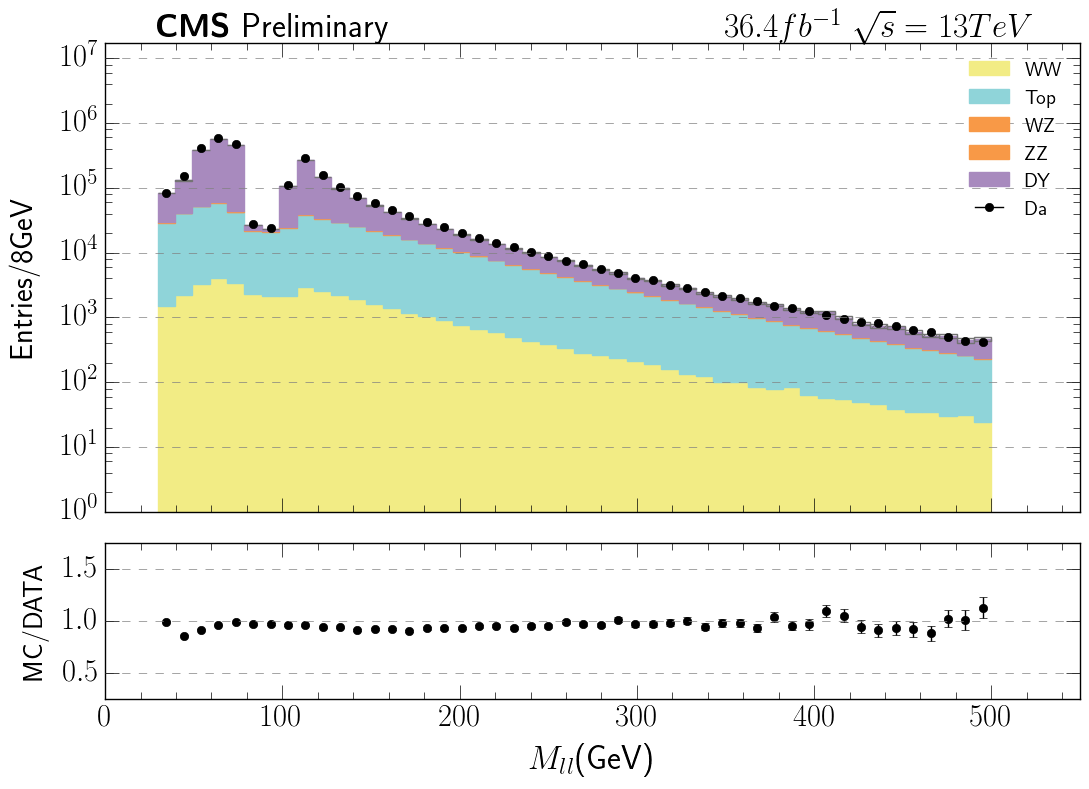

In [78]:
bins_mc = bin_df( df[(df.lep2_pt > 20) & (df.mll > 30)], "mll", range=(10,500), scales=scales, bins=50)
bins_da = bin_df( df_da[(df_da.lep2_pt > 20) & (df_da.mll > 30)], "mll", range=(10,500), bins=50 )

full_plot( bins_mc, bins_da, color='color_1', x_range=(0, 550))

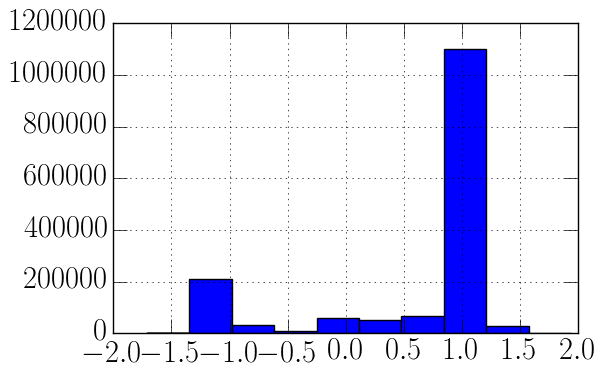

In [19]:
df[df.process_decay == "DYJetsToLL_M-50"].weight.hist()

In [49]:
gen_weight = df.gen_weight.values[:]

In [50]:
gen_weight = gen_weight / np.abs(gen_weight)
gen_weight.min()

-1.0

In [56]:
#weight = df.weight.values
weight[df.process_decay == 'DYJetsToLL_M-50'] = weight[df.process_decay == 'DYJetsToLL_M-50'] * gen_weight[df.process_decay == 'DYJetsToLL_M-50']  
weight[df.process_decay == 'DYJetsToLL_M-50'] 

array([-1.04084837, -1.04084837, -1.04084837, ...,  1.07999289,
        1.07999289,  1.07999289], dtype=float32)

In [68]:
np.nonzero(df.weight == weight)[0].shape[0] == weight.shape[0]


True

(<matplotlib.figure.Figure at 0x7f75796201d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7579822350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7577fddc50>], dtype=object))

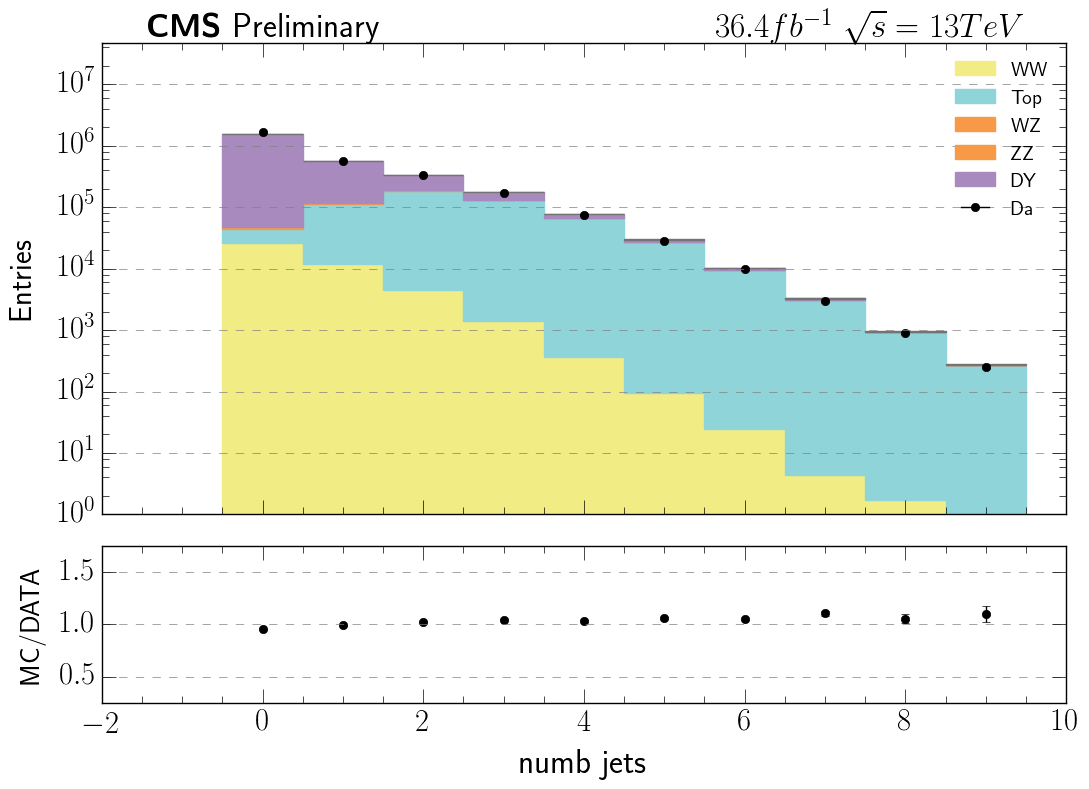

In [20]:
bins_mc = bin_df( df[(df.lep2_pt > 20) & (df.mll > 30)], "numb_jets",)
bins_da = bin_df( df_da[(df_da.lep2_pt > 20) & (df_da.mll > 30)], "numb_jets",)

full_plot( bins_mc, bins_da, color='color_1',)

(<matplotlib.figure.Figure at 0x7f7577ca9810>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7577f252d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f756168a710>], dtype=object))

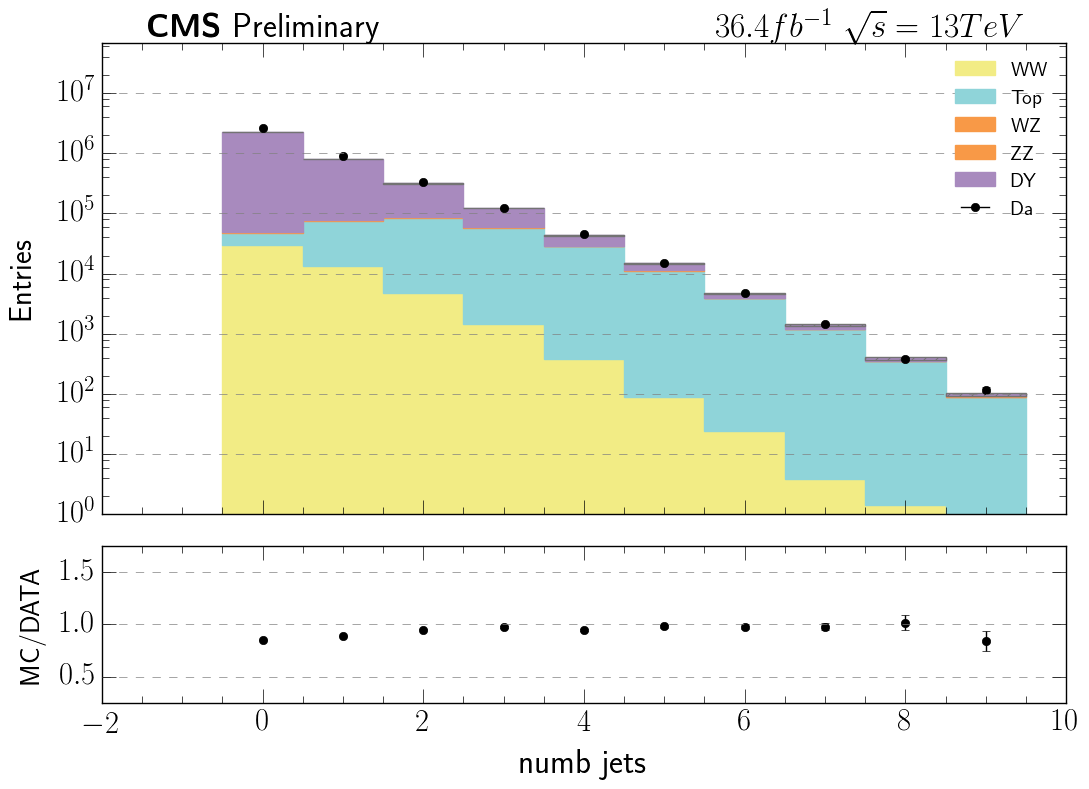

In [21]:

bins_mc = bin_df( df_train_test, "numb_jets", scales=scales)
bins_da = bin_df( df_da_pre, "numb_jets",  )

full_plot( bins_mc, bins_da, color="color_1")

# Features, Weights, and Labels

In [22]:
#features_fDY = ['numb_jets', 'metMod', 'qT', 'jet1_pt', 'dPhiLLJet', 'dPhiLLMET', 'dPhiMETJet', 'lep_Type']
#features_fDY = ['metMod', 'qT', 'jet1_pt', 'dPhiLLMET', 'dPhiMETJet',\
#                'lep_Type', 'METProj_sin_', 'mllMET']
features_fDY =['mll', 'lep_Type', 'METProj_sin', 'jet1_pt', 'dPhiLL', 'qT', 'HT', 'dPhiLLMET']#['METProj', 'lep1_pt']
#features_fDY = ['numb_jets', 'met_corrected', 'qT', 'jet1_pt', 'dPhiLLJet', 'dPhiLLMET', 'dPhiMETJet', 'lep_Type']
#features_fDY = ['numb_jets', 'met_corrected_', 'qT', 'jet1_pt', 'dPhiLLJet', 'dPhiLLMET', 'dPhiMETJet', 'lep_Type']
#['numb_jets', 'METProj_sin', 'met_over_sET','METProj_trk_sin', 'qT', 'mllMET', 'recoil', 'jet1_pt', 'dPhiLLJet', 'dPhiLLMET', 'dPhiMETJet', 'lep_Type']
features_fTT = ['numb_jets',  'METProj_sin', 'qT', 'mll', 'mllMET', 'metMod', 'dPhiLLMET', 'dPhiLLJet', 'dPhiMETJet', 'dPhiLL', 'HT', 'recoil'] +\
           [ 'lep_Type'] #['METProj' 'jet1_csv', 'lep2_pt']

In [23]:
#Create labels 
#labels TT
labels_fTT = np.empty( train_fTT.shape[0] )
weights_fTT = np.empty( train_fTT.shape[0])

labels_fTT[(train_fTT.process == "WW").as_matrix()] = 1
labels_fTT[(train_fTT.process == "Top").as_matrix()] = 2

weights_fTT[(train_fTT.process == "WW").as_matrix()] = 1
weights_fTT[(train_fTT.process == "Top").as_matrix()] = 1

#labels DY
labels_fDY = np.empty( train_fDY.shape[0] )
weights_fDY = np.empty( train_fDY.shape[0])

labels_fDY[(train_fDY.process == "WW").as_matrix()] = 1
labels_fDY[(train_fDY.process == "DY").as_matrix()] = 2

weights_fDY[(train_fDY.process == "WW").as_matrix()] = 1
weights_fDY[(train_fDY.process == "DY").as_matrix()] = 1

In [24]:
#Set up random forest for Drell Yan and TTBar selections

clf_fTT = RandomForestClassifier(n_estimators=50, n_jobs=-1, min_samples_split=10, max_depth=15, max_features='sqrt')
clf_fTT = clf_fTT.fit( np.float32(train_fTT[features_fTT].values) , np.float32(labels_fTT), )#sample_weight=weights_fTT)

clf_fDY = RandomForestClassifier(n_estimators=50, n_jobs=-1, min_samples_split=10, max_depth=15, max_features='sqrt')
clf_fDY = clf_fDY.fit( np.float32(train_fDY[features_fDY].values) , np.float32(labels_fDY), )#sample_weight=weights_fDY)

#Print scores
print "TTbar training score", clf_fTT.score(np.float32(train_fTT[features_fTT].values), np.float32(labels_fTT), weights_fTT)
print "Drell Yan training score", clf_fDY.score(np.float32(train_fDY[features_fDY].values), np.float32(labels_fDY), weights_fDY)

In [25]:
#test = df_train_test.drop( train_fTT.index )
#test = test.drop(train_DY.index )

In [26]:
#Predict test set Drell Yan and TTbar samples
pred_fTT = clf_fTT.predict_proba(np.float32(test[features_fTT].values))
test["pred_fTT_WW"] = pred_fTT[:,0]

pred_fDY = clf_fDY.predict_proba(np.float32(test[features_fDY].values))
test["pred_fDY_WW"] = pred_fDY[:,0]

# Results

In [27]:
scales_test = {key: scales[key] * ( float(df_train_test[ df_train_test.process_decay == key].shape[0])/ float(test[ test.process_decay == key].shape[0]) ) for key in scales.keys() if key in df_train_test.process_decay.unique() } 

In [28]:
for key in scales.keys():
    if key not in scales_test.keys():
        scales_test[key] = scales[key]
scales_test

{'DY1JetsToLL_M-10to50': 0.9381774927395132,
 'DY1JetsToLL_M-50': 0.7874544990747977,
 'DY2JetsToLL_M-10to50': 0.367304160060718,
 'DY2JetsToLL_M-50': 0.3014988543922165,
 'DY3JetsToLL_M-10to50': 1.0877080556201004,
 'DY3JetsToLL_M-50': 0.1688574542381175,
 'DY4JetsToLL_M-10to50': 1.0641560463324038,
 'DY4JetsToLL_M-50': 0.13098214273164027,
 'DYJetsToLL_M-10to50': 5.453336809847404,
 'DYJetsToLL_M-50': 3.0902559462192323,
 'Da': 1,
 'T_s-channel': 0.1212808980884296,
 'T_t-channel': 0.3577685988992116,
 'T_tW-channel': 0.1080472325149733,
 'Tbar_s-channel': 0.64064,
 'Tbar_t-channel': 0.6007924573900625,
 'Tbar_tW-channel': 0.4289835023310115,
 'WW': 0.37816992964175533,
 'WZJetsTo2L2Q': 0.007721331724801543,
 'WZJetsTo3LNu': 0.09660869155117968,
 'ZZJetsTo2L2Nu': 0.0023242849372985598,
 'ZZJetsTo2L2Q': 0.007638108693555493,
 'ttbar_leptonic': 0.04190798465305839,
 'ttbar_semileptonic': 0.1511320154611399}

In [29]:
#Predict on data set
features_fDY_da = ['metMod', 'qT', 'jet1_pt', 'dPhiLLMET', 'dPhiMETJet', 'lep_Type', 'METProj_sin', 'mllMET']

pred_fTT = clf_fTT.predict_proba(np.float32(df_da_pre[features_fTT].values))
df_da_pre["pred_fTT_WW"] = pred_fTT[:,0]

pred_fDY = clf_fDY.predict_proba(np.float32(df_da_pre[features_fDY].values))
df_da_pre["pred_fDY_WW"] = pred_fDY[:,0]

In [ ]:
#plot the two results in a set of plots
df_da_pre.pred_fDY_WW.hist(bins=50)

df_da_pre.pred_fTT_WW.hist(bins=50)

(<matplotlib.figure.Figure at 0x7f754a4af550>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f748d935850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7500125a10>], dtype=object))

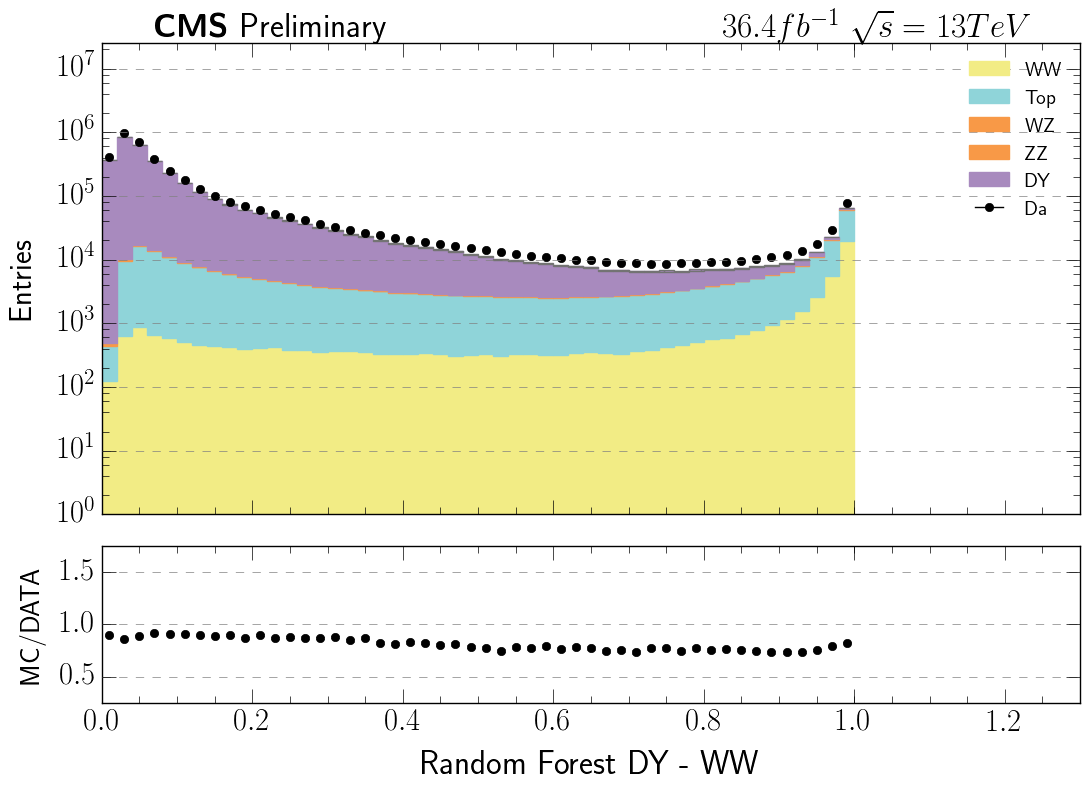

In [43]:
#df_da_pre = df_da_pre[ df_da_pre.mll >= 50 ]
bins_mc = bin_df( test[ test.mll > 30], "pred_fDY_WW", range=(0,1), bins=50, scales=scales_test)
bins_da = bin_df( df_da_pre[ df_da_pre.mll > 30], "pred_fDY_WW", range=(0,1), bins=50)

full_plot( bins_mc, bins_da, color="color_1", title="Random Forest DY - WW", x_range=(0,1.3))

(<matplotlib.figure.Figure at 0x7f746ac774d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f754a45d810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f75478d80d0>], dtype=object))

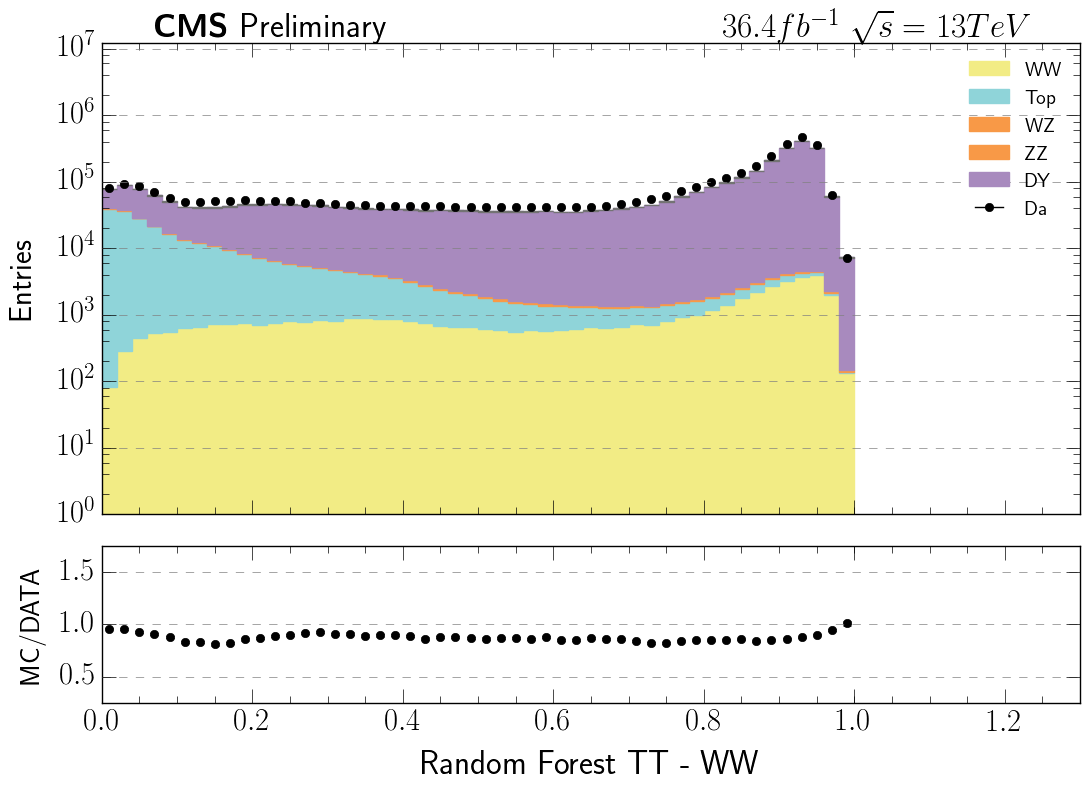

In [42]:
bins_mc = bin_df( test[ test.mll > 30], "pred_fTT_WW", range=(0,1), bins=50, scales=scales_test)
bins_da = bin_df( df_da_pre[ df_da_pre.mll > 30], "pred_fTT_WW", range=(0,1), bins=50)

full_plot( bins_mc, bins_da, color="color_1", title="Random Forest TT - WW", x_range=(0,1.3))

In [ ]:
rf_cut = 0.65

bins_mc = bin_df( test[ (test.mll > 30) & (test.pred_fTT_WW > rf_cut )], "pred_fDY_WW", range=(0,1), bins=50, scales=scales_test)
bins_da = bin_df( df_da_pre[ (df_da_pre.mll > 30) & (df_da_pre.pred_fTT_WW > rf_cut)], "pred_fDY_WW", range=(0,1), bins=50)

full_plot( bins_mc, bins_da, color="color_1", title="fTT", x_range=(0,1.3))

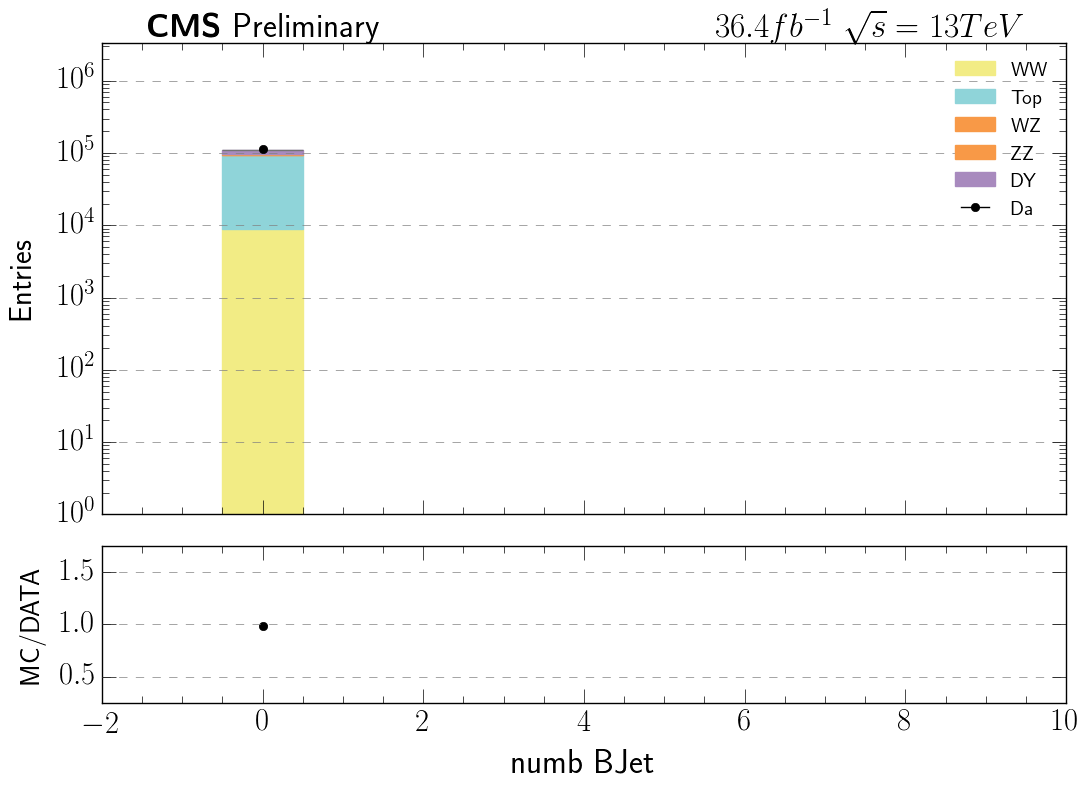

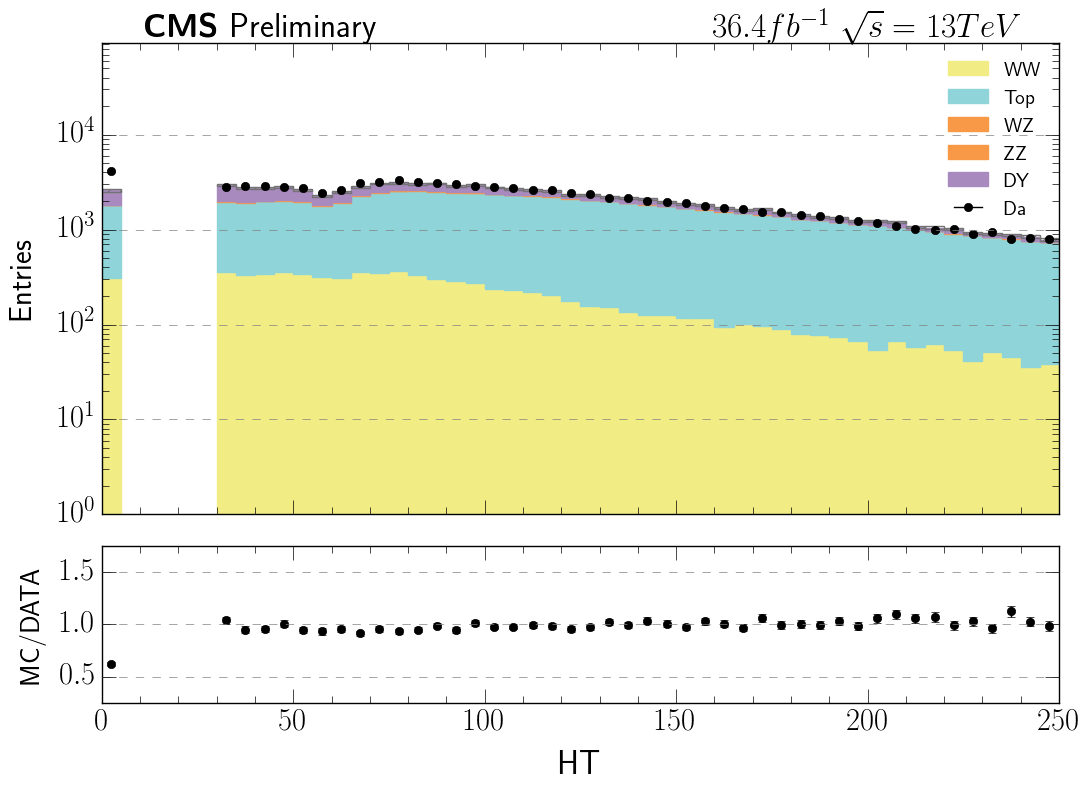

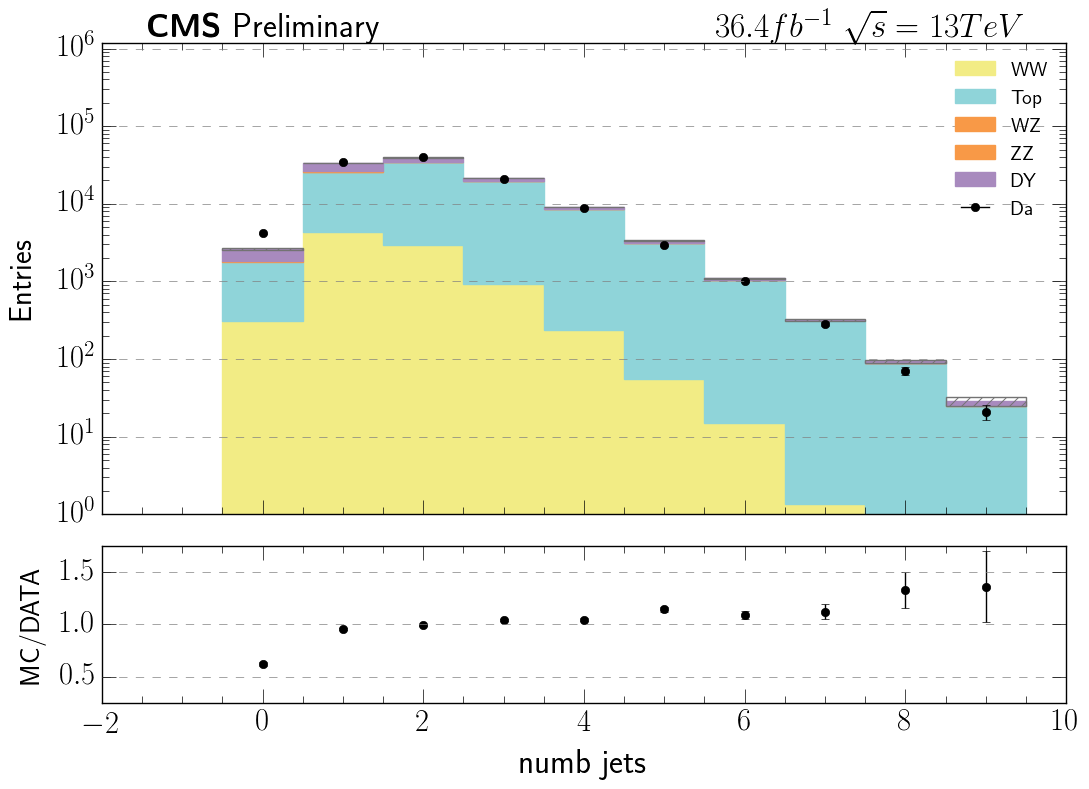

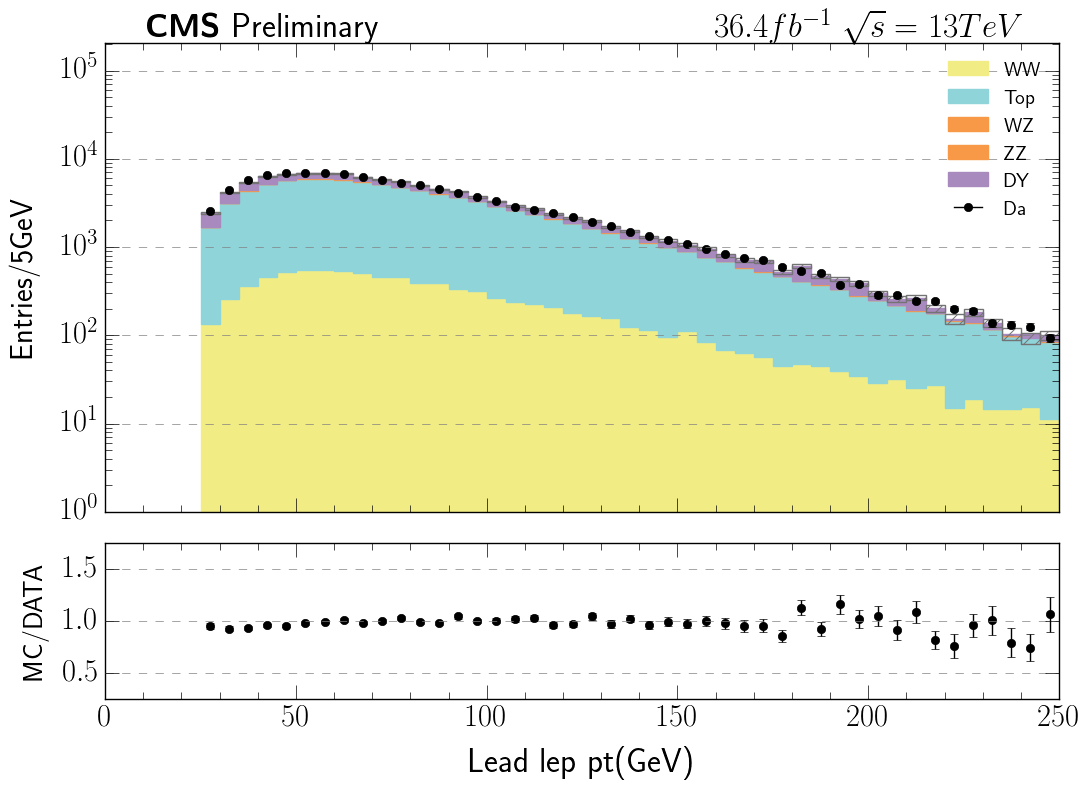

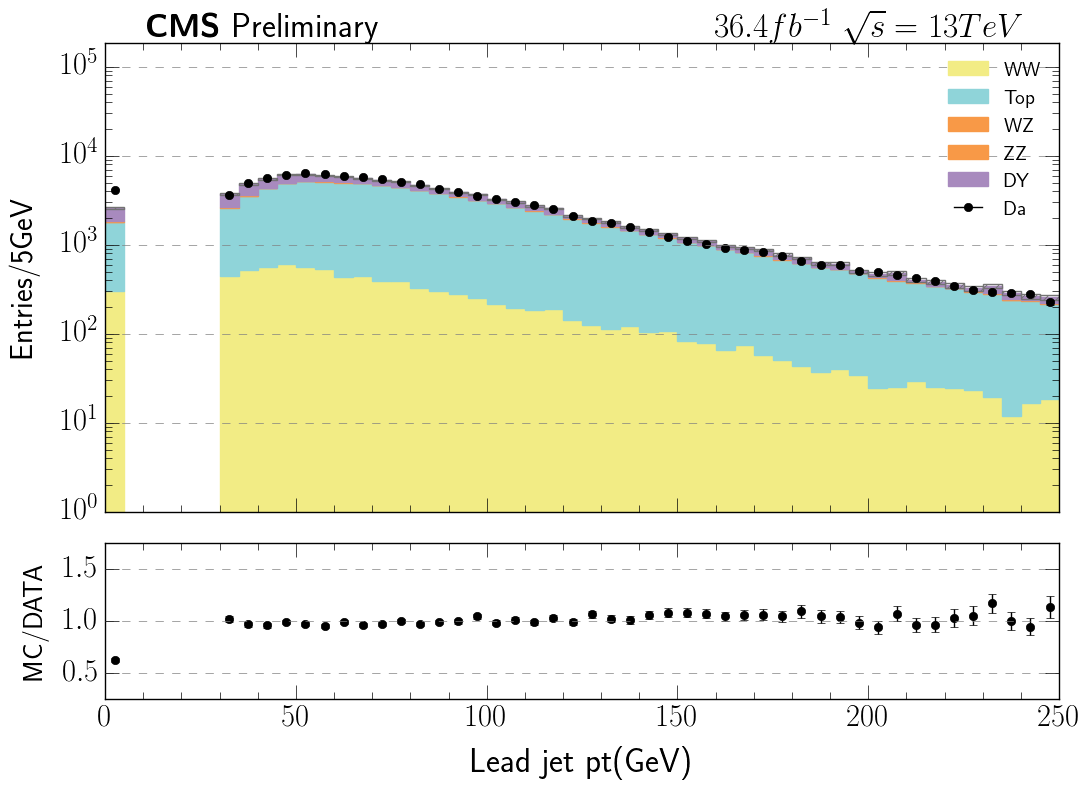

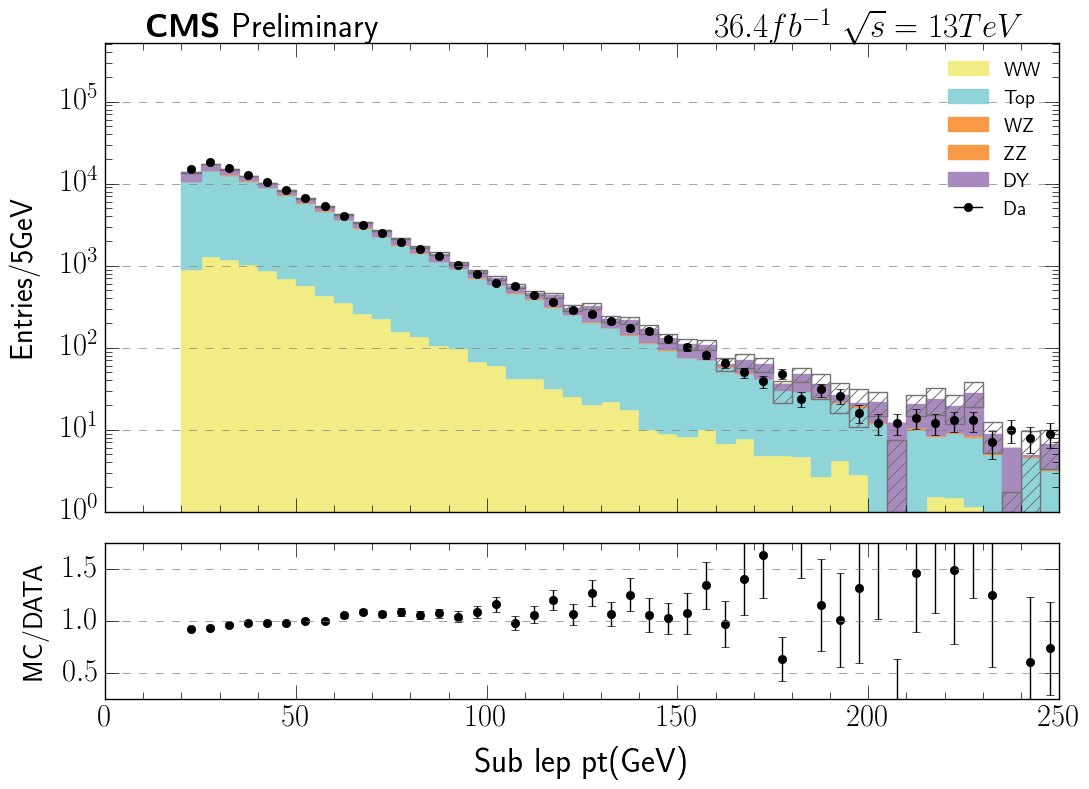

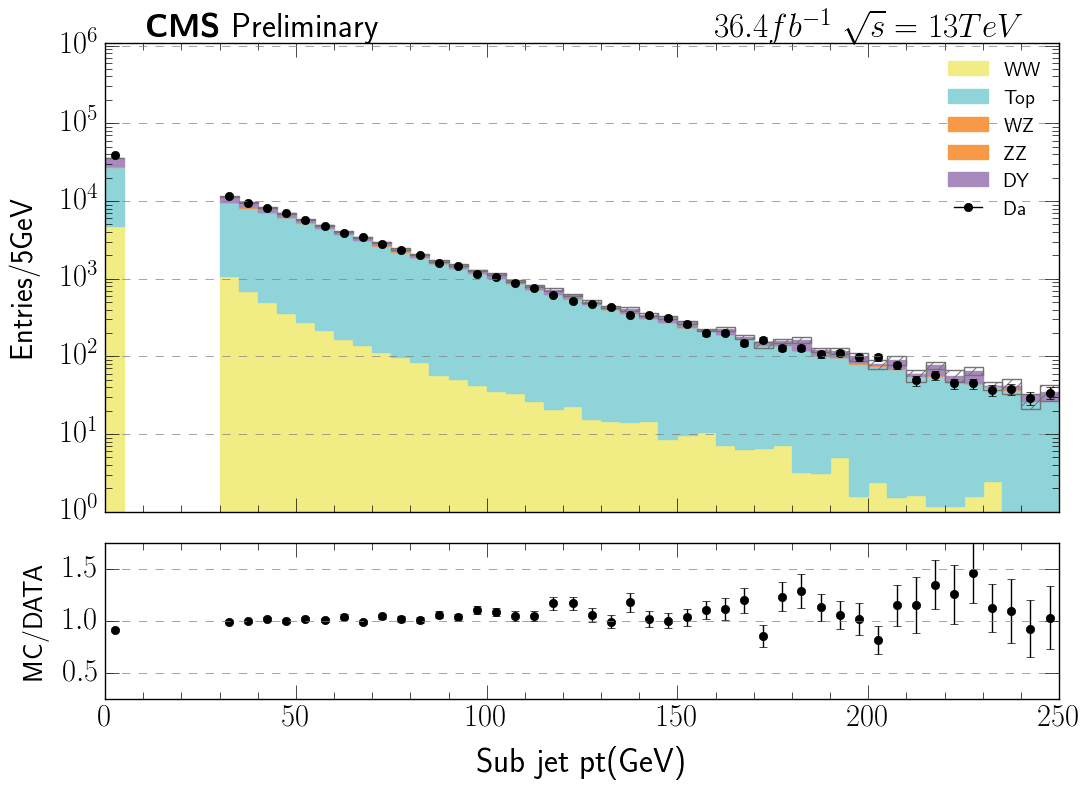

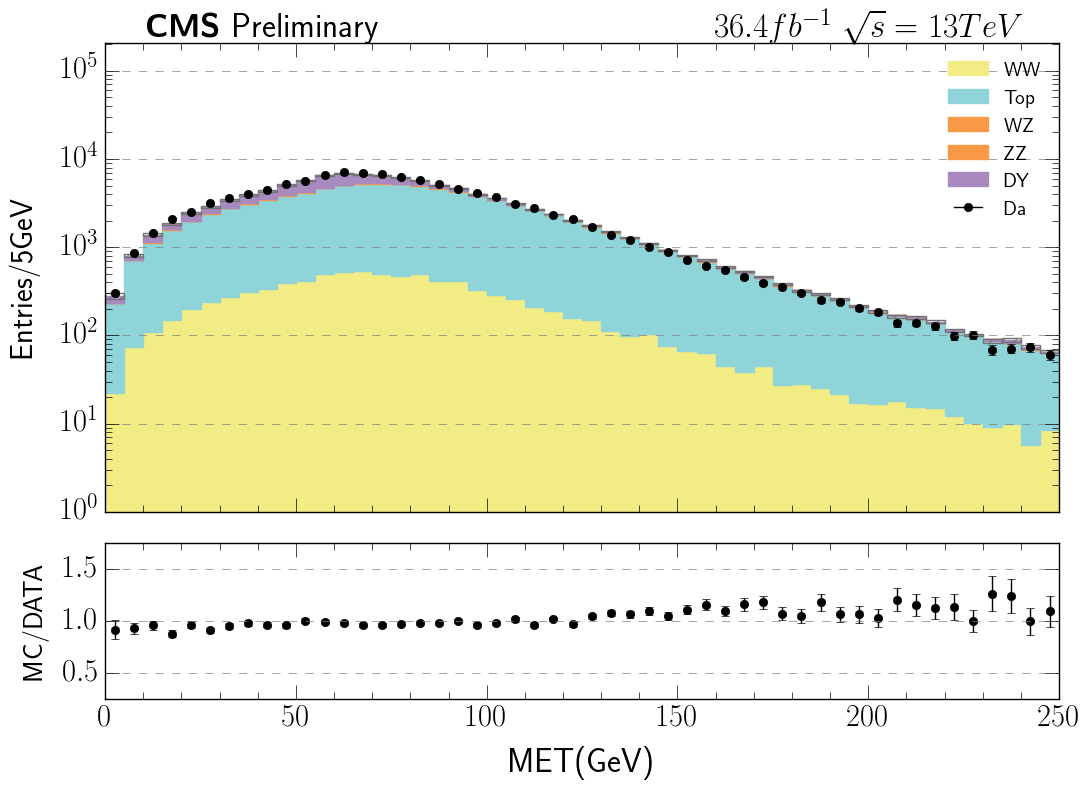

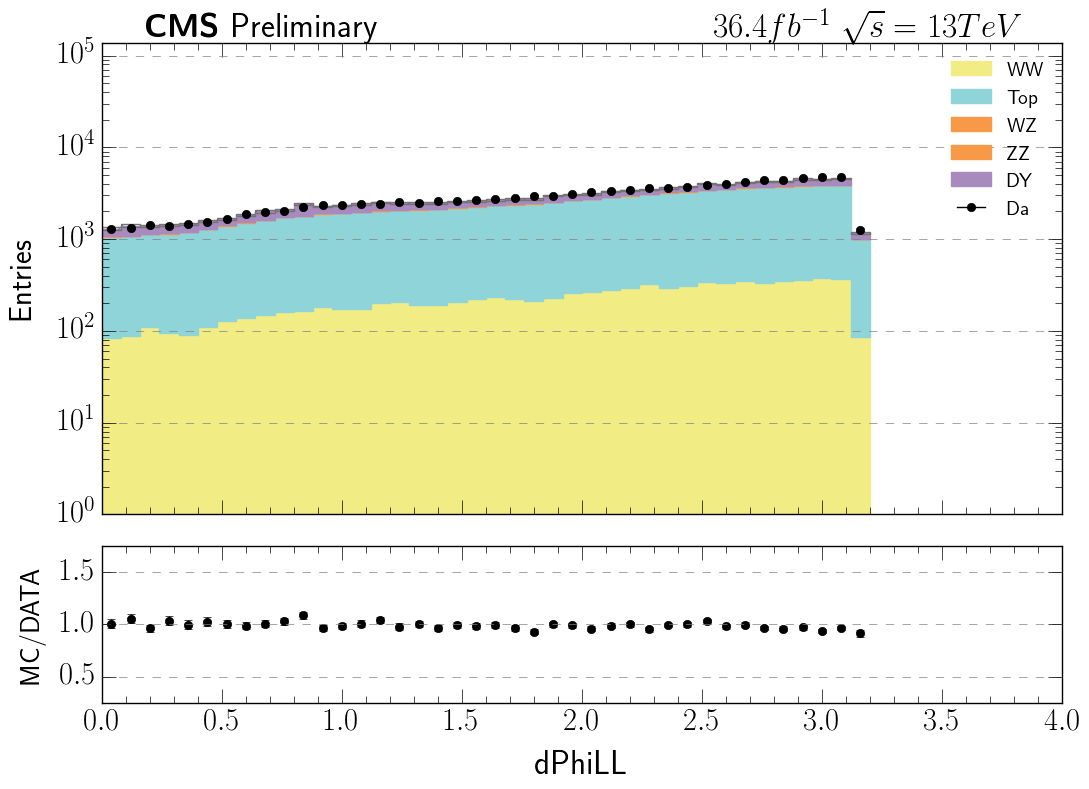

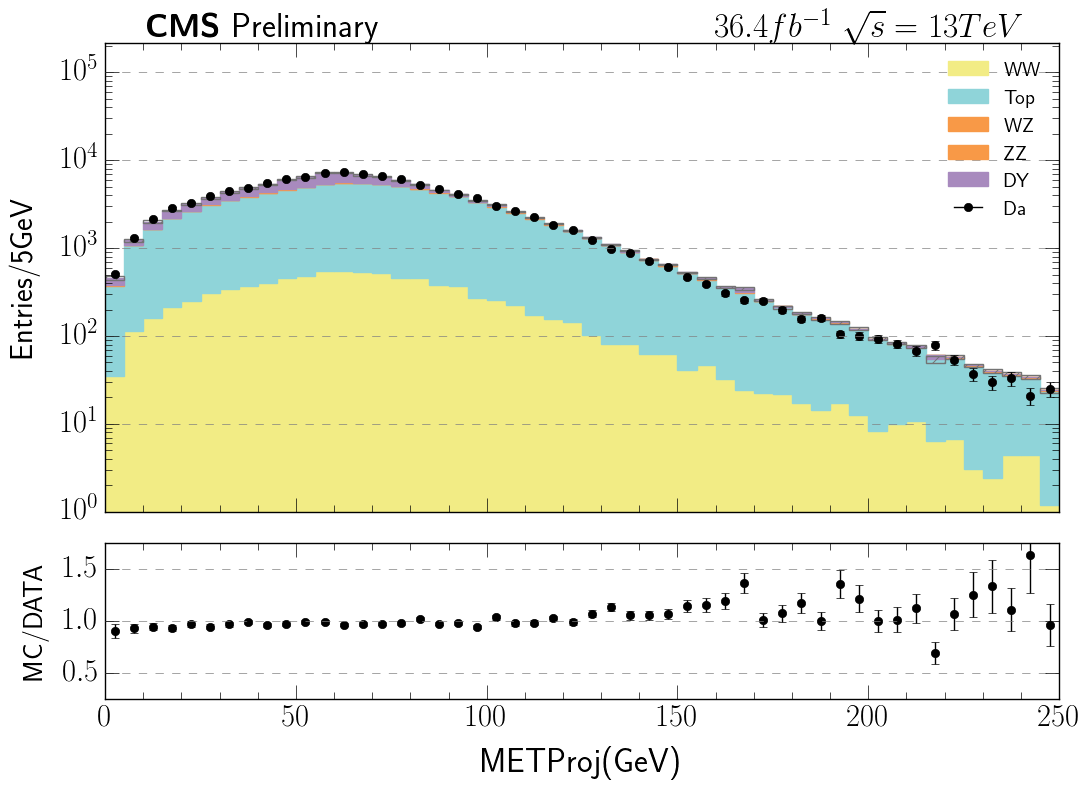

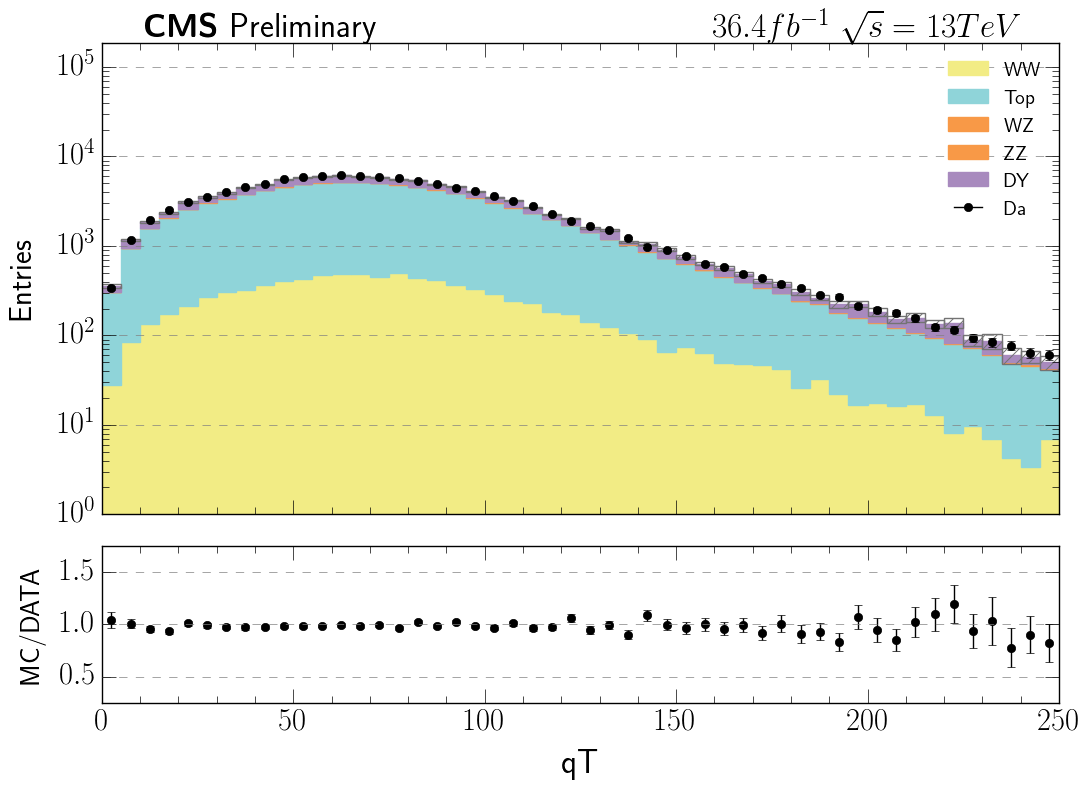

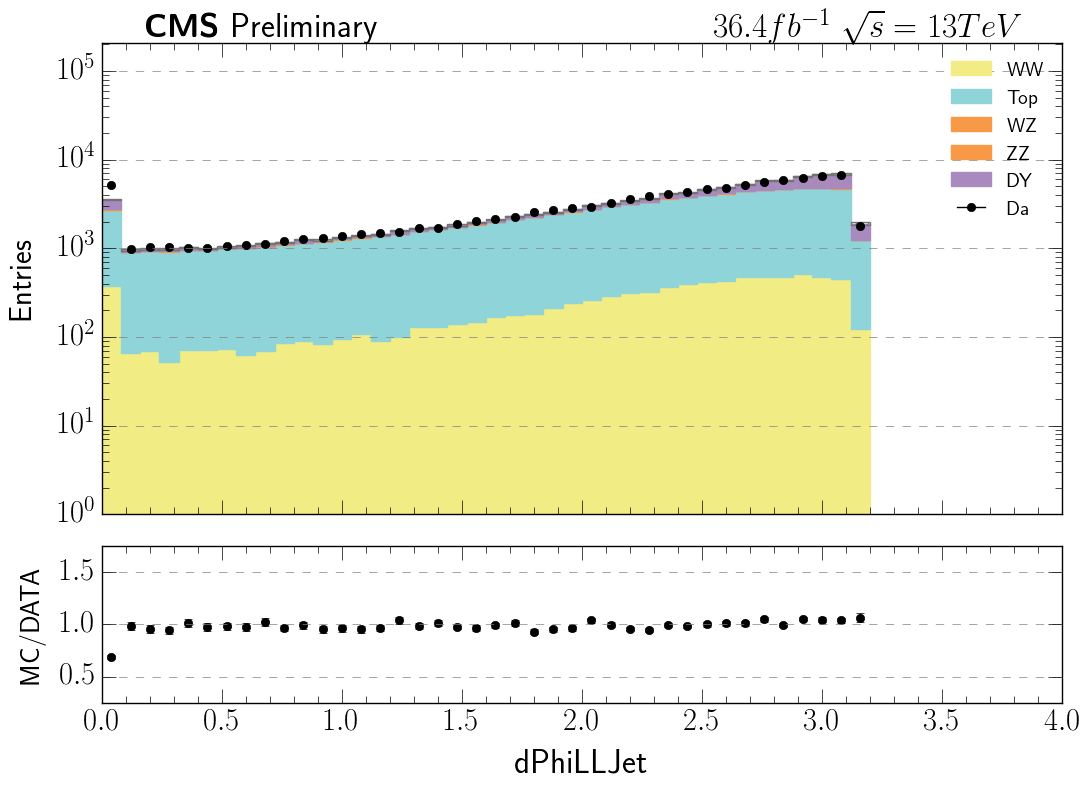

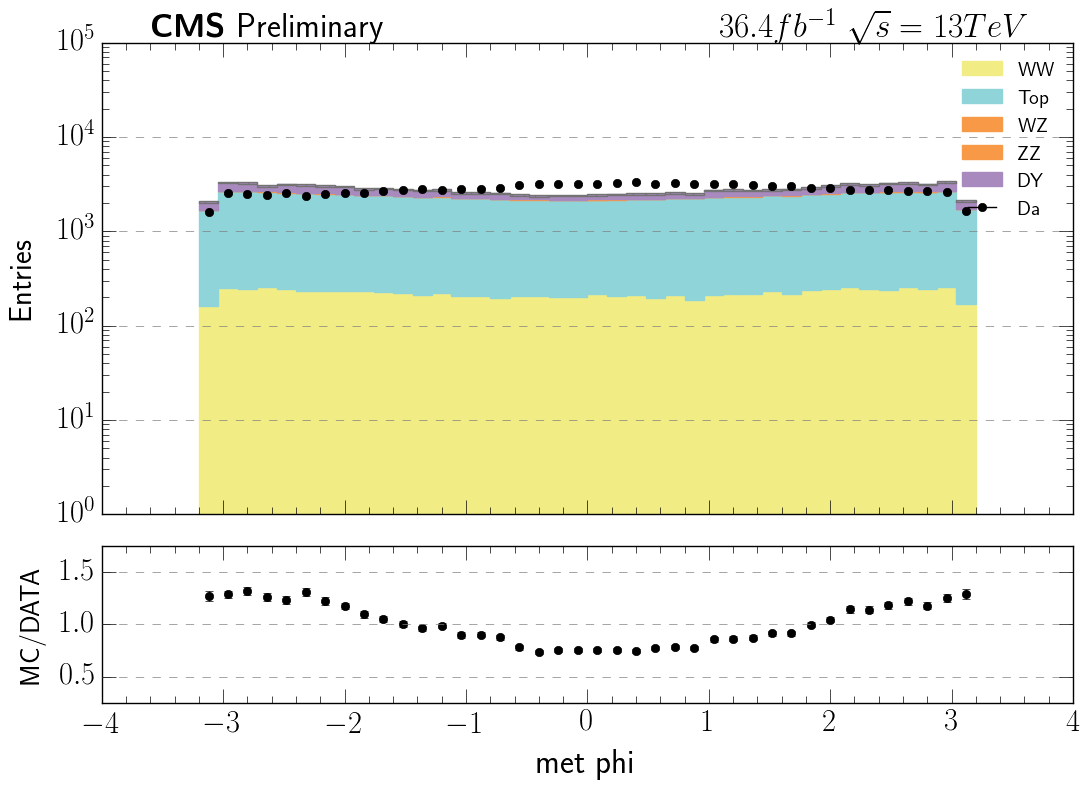

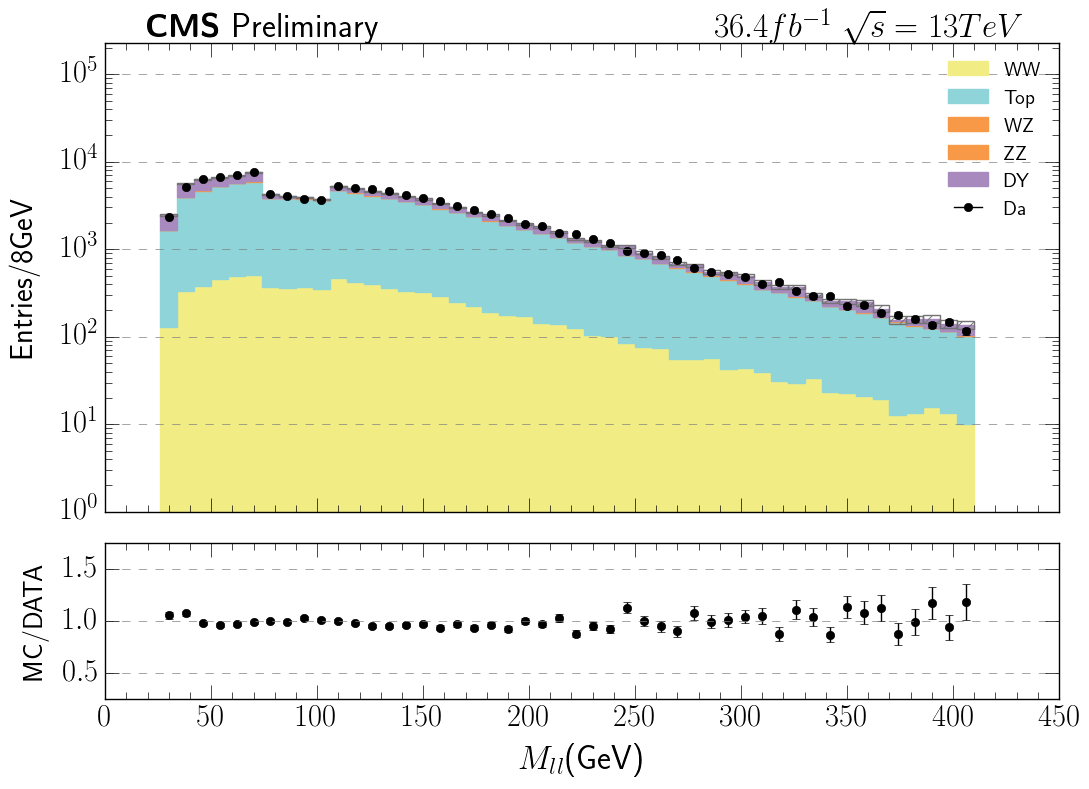

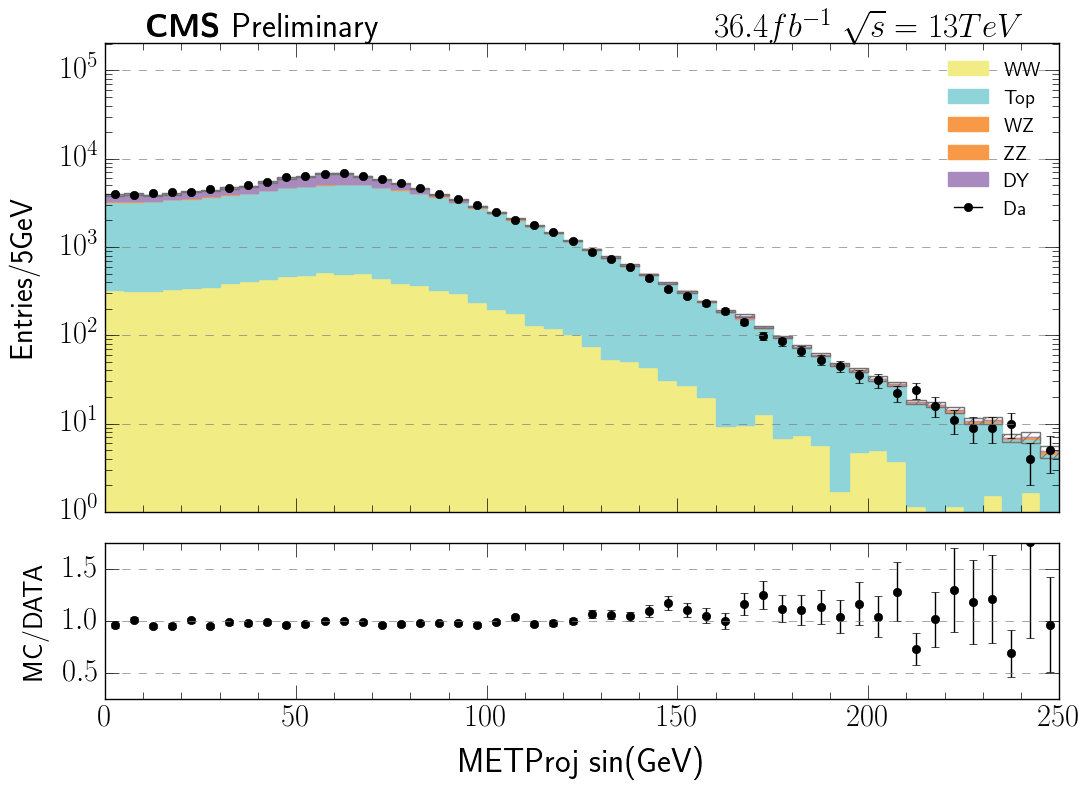

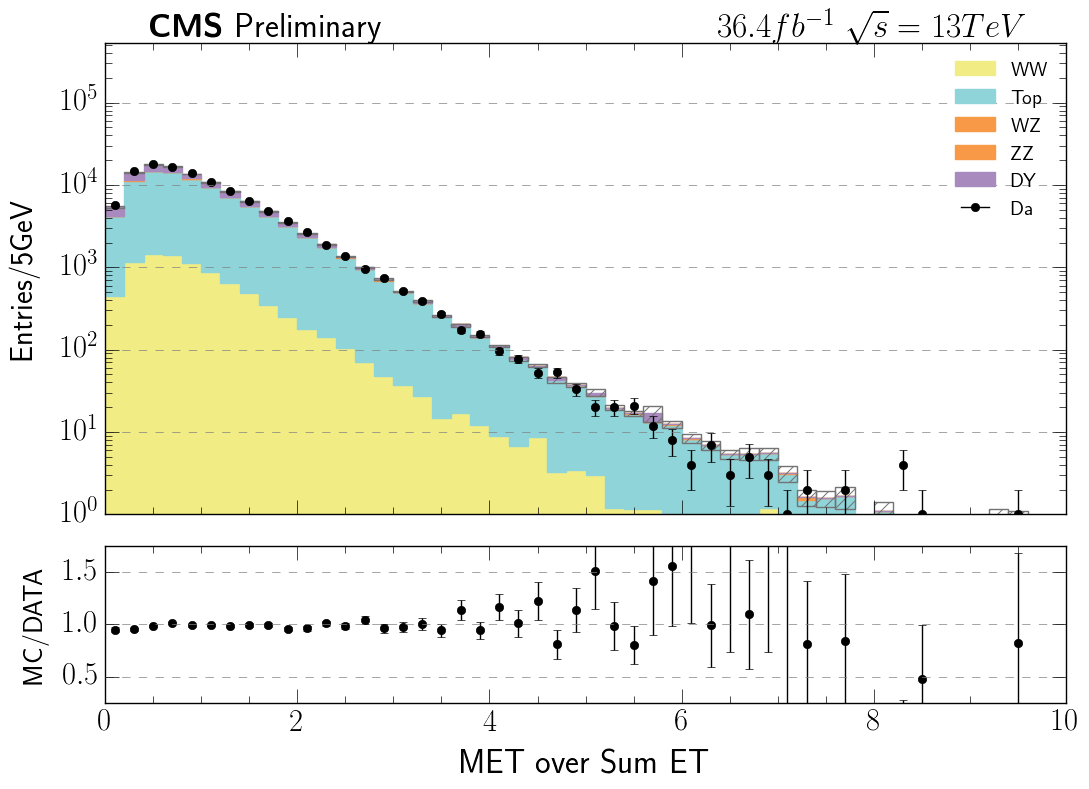

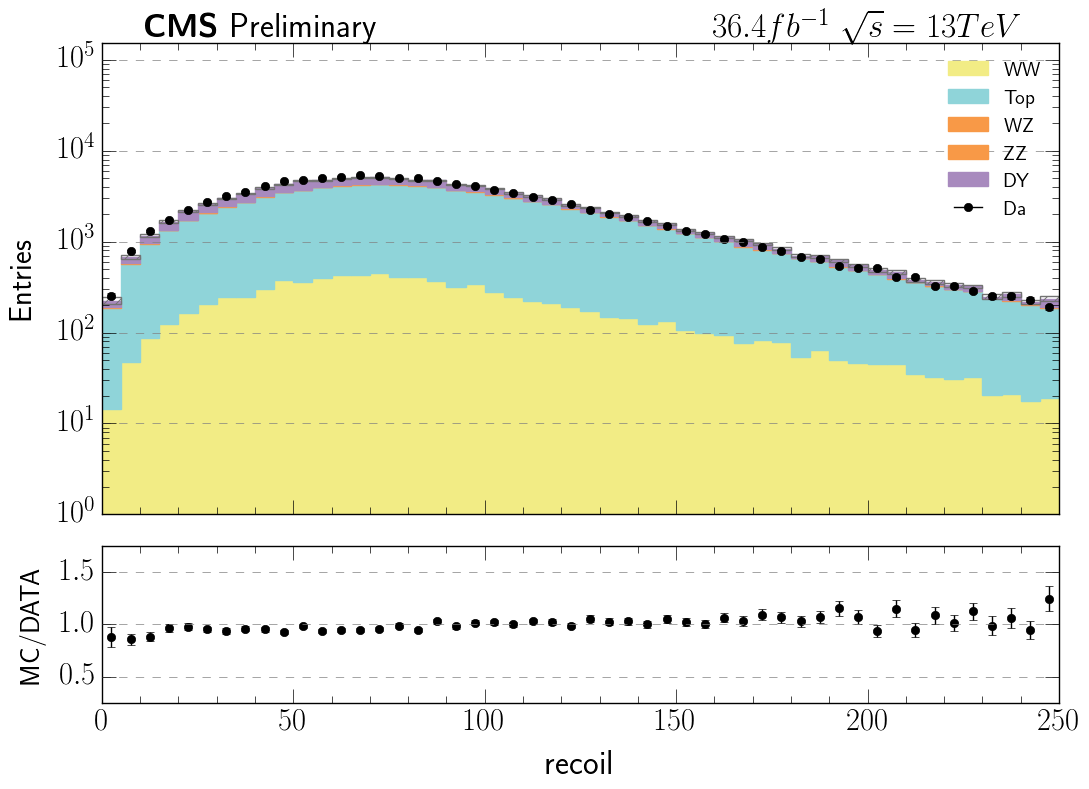

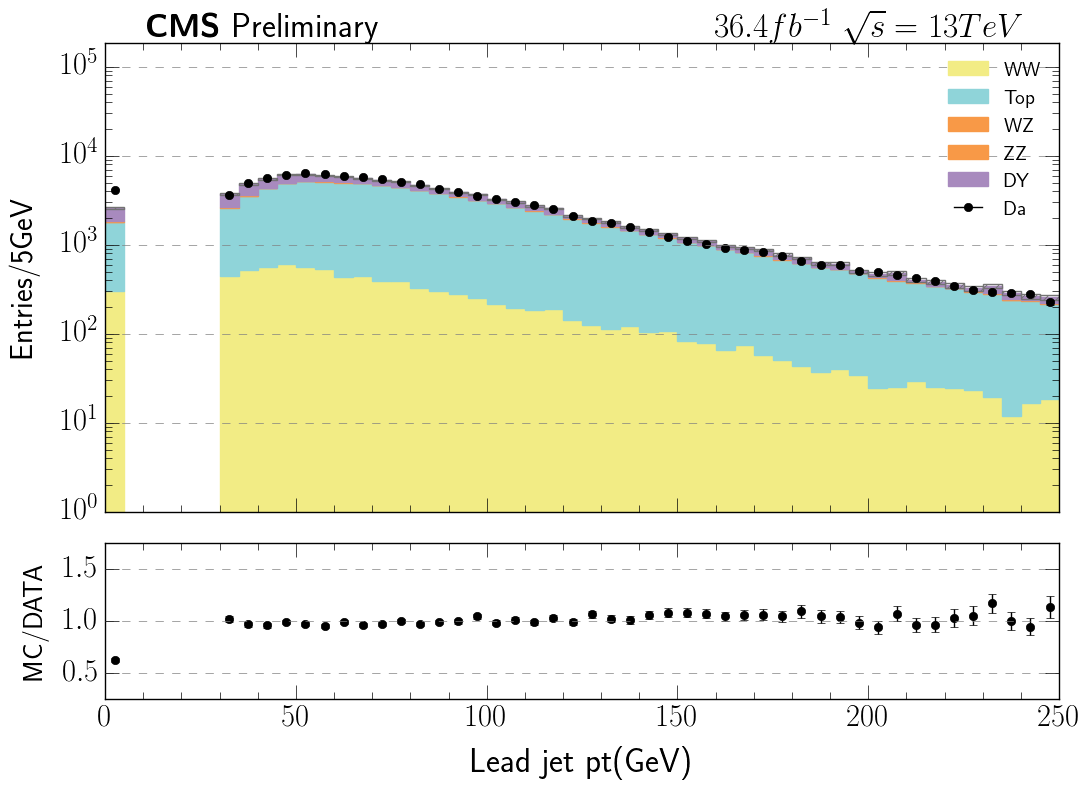

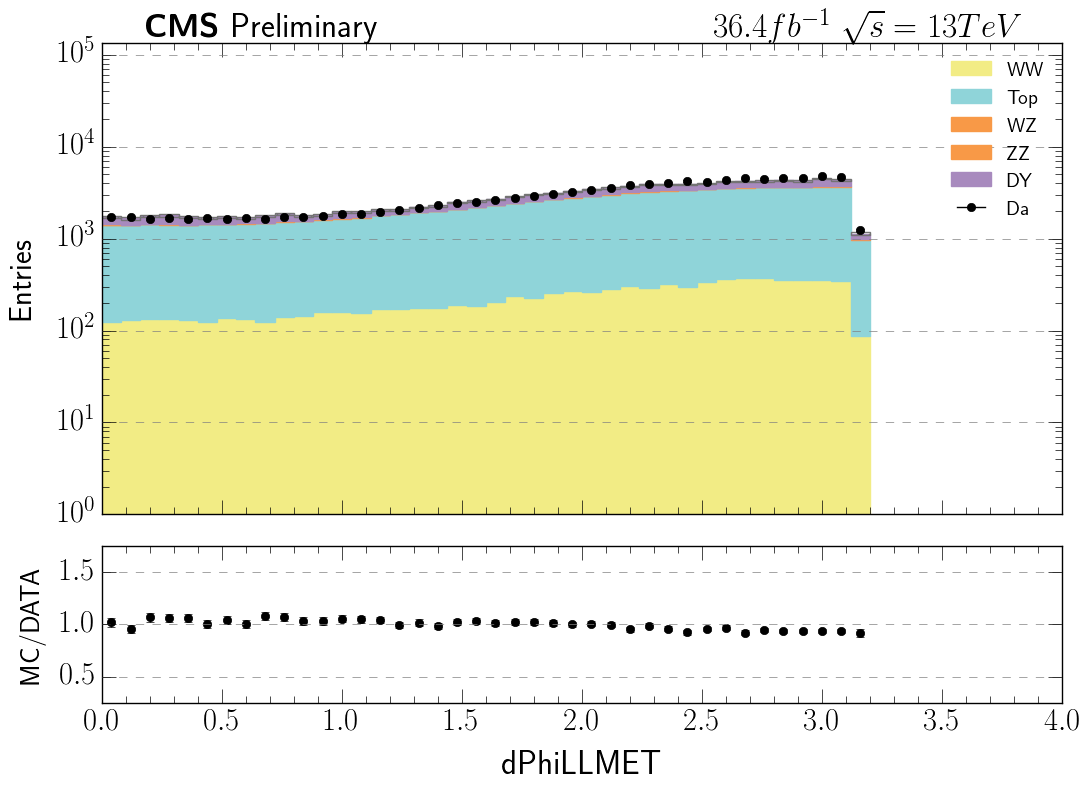

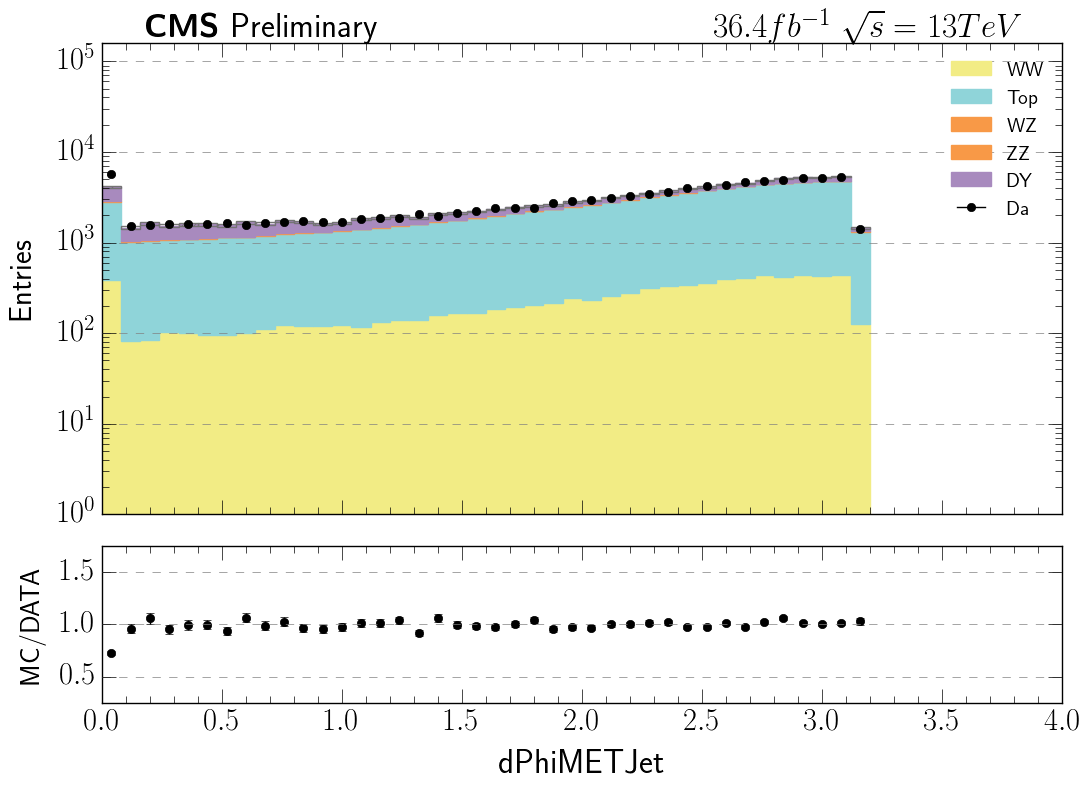

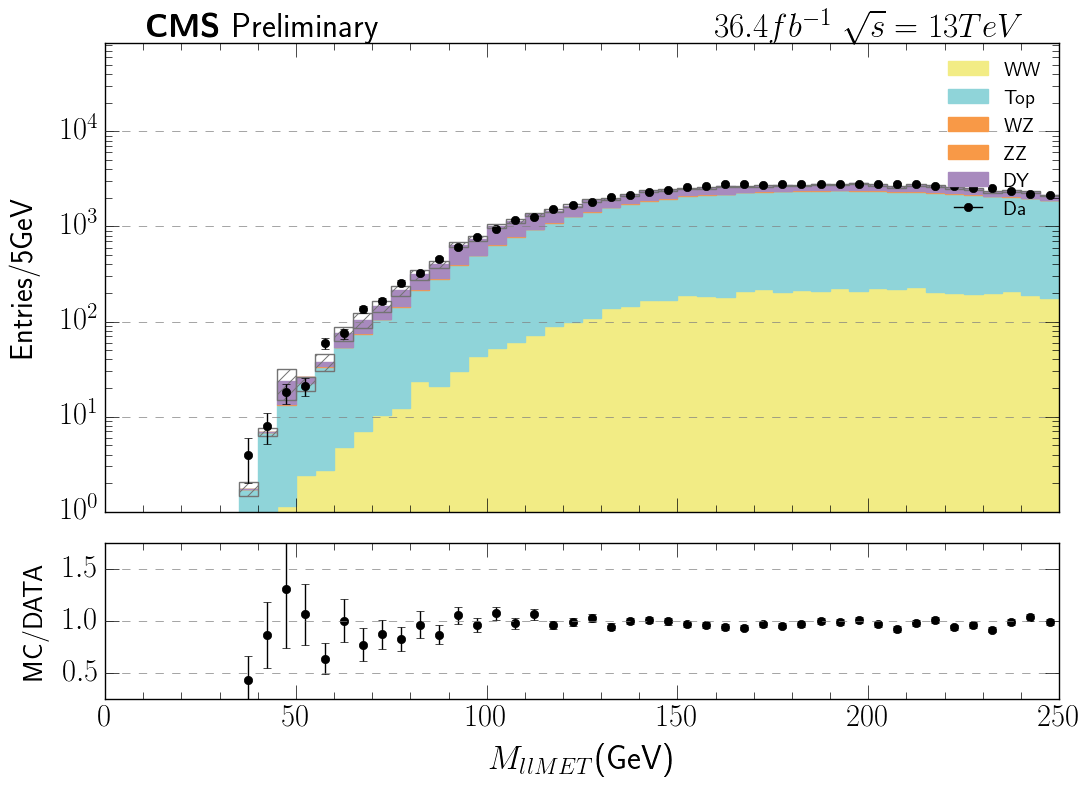

In [79]:
create_kinematic_hist( test[(test.pred_fDY_WW > .5 ) & (test.pred_fTT_WW < .4 ) & (test.lep2_pt > 20)], df_da_pre[(df_da_pre.pred_fDY_WW > .5) & (df_da_pre.pred_fTT_WW < .4) & (df_da_pre.lep2_pt > 20)], prefix="13TeV/rf_plots/bkg_tt_cut", scales=scales_test)


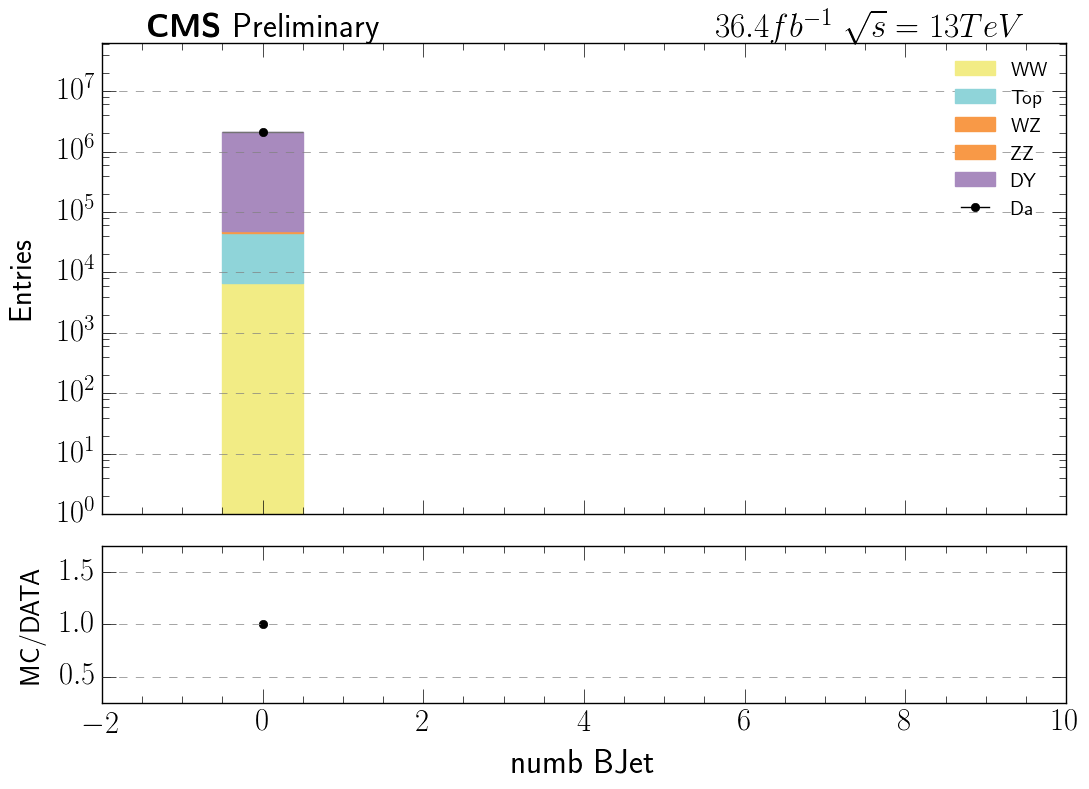

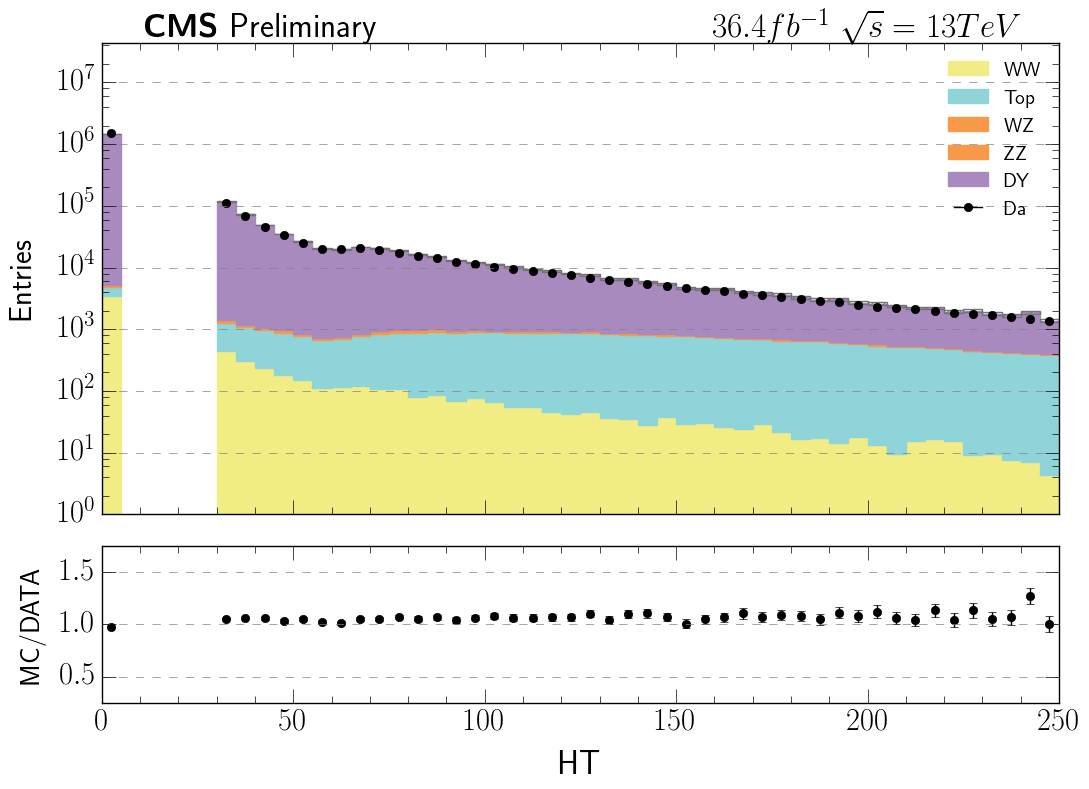

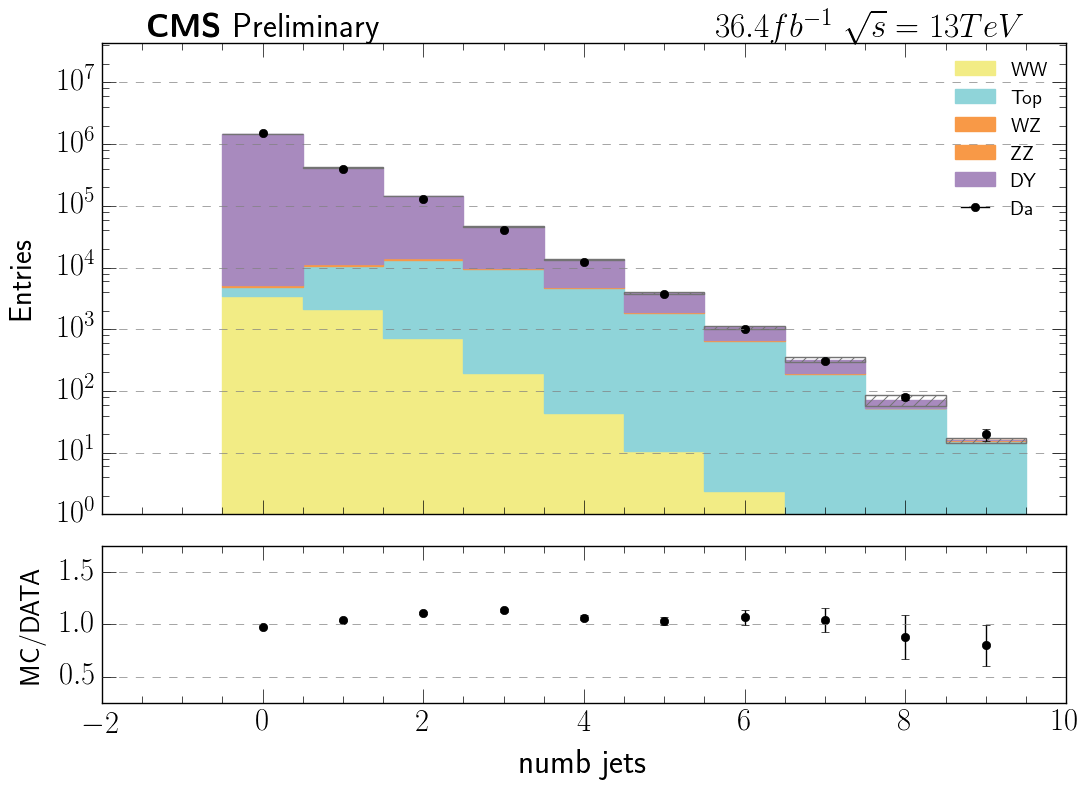

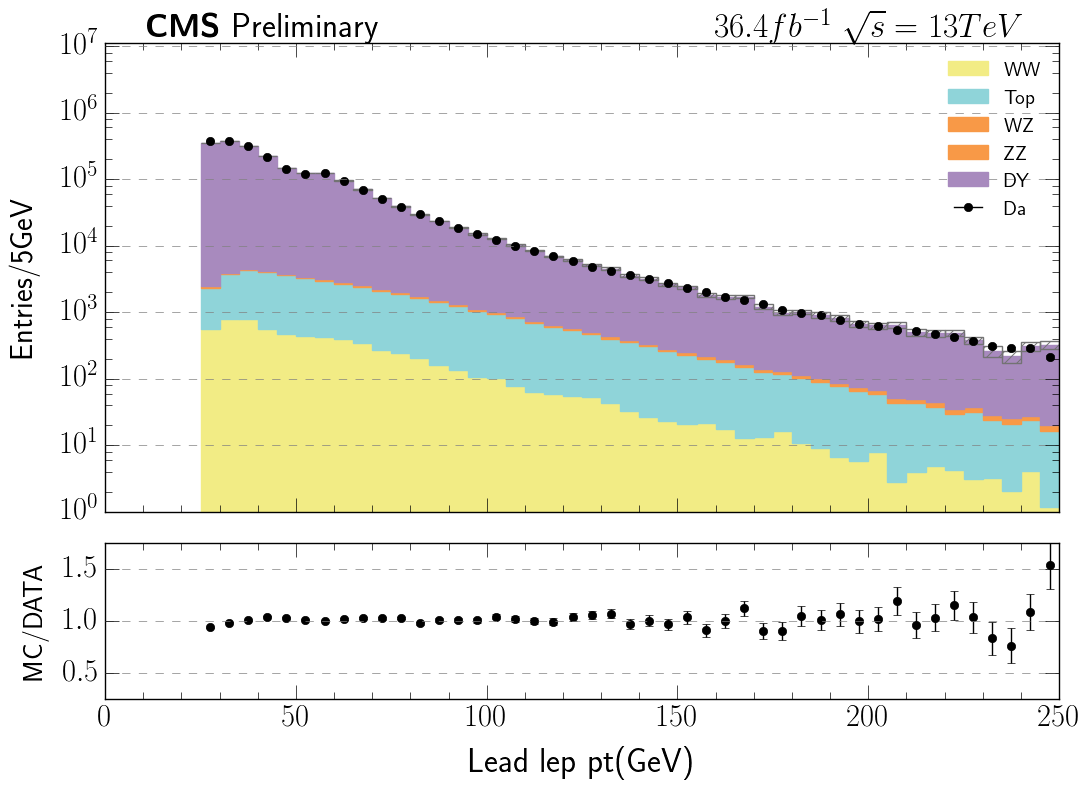

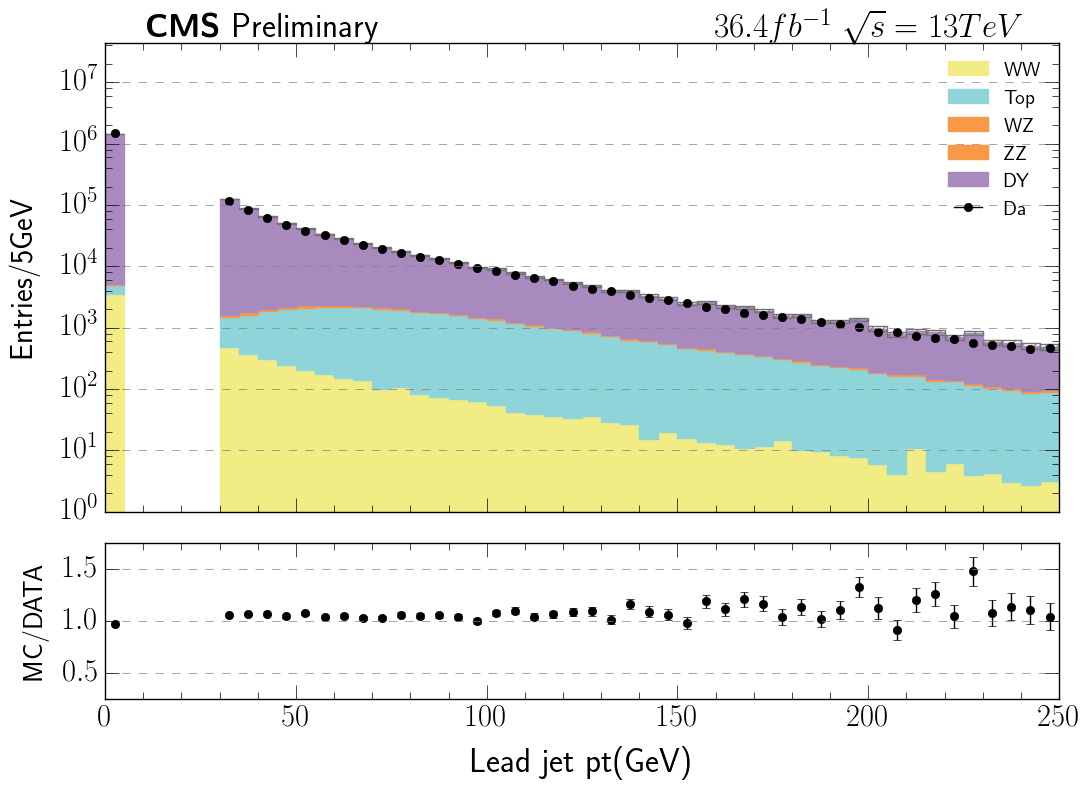

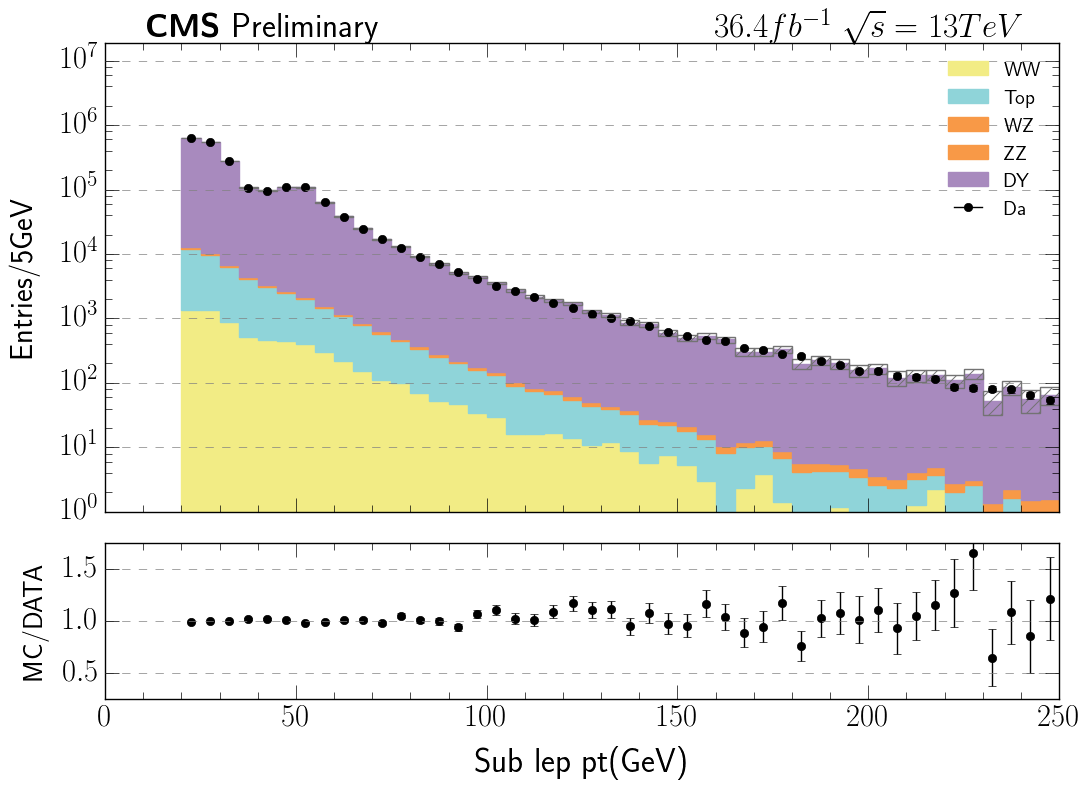

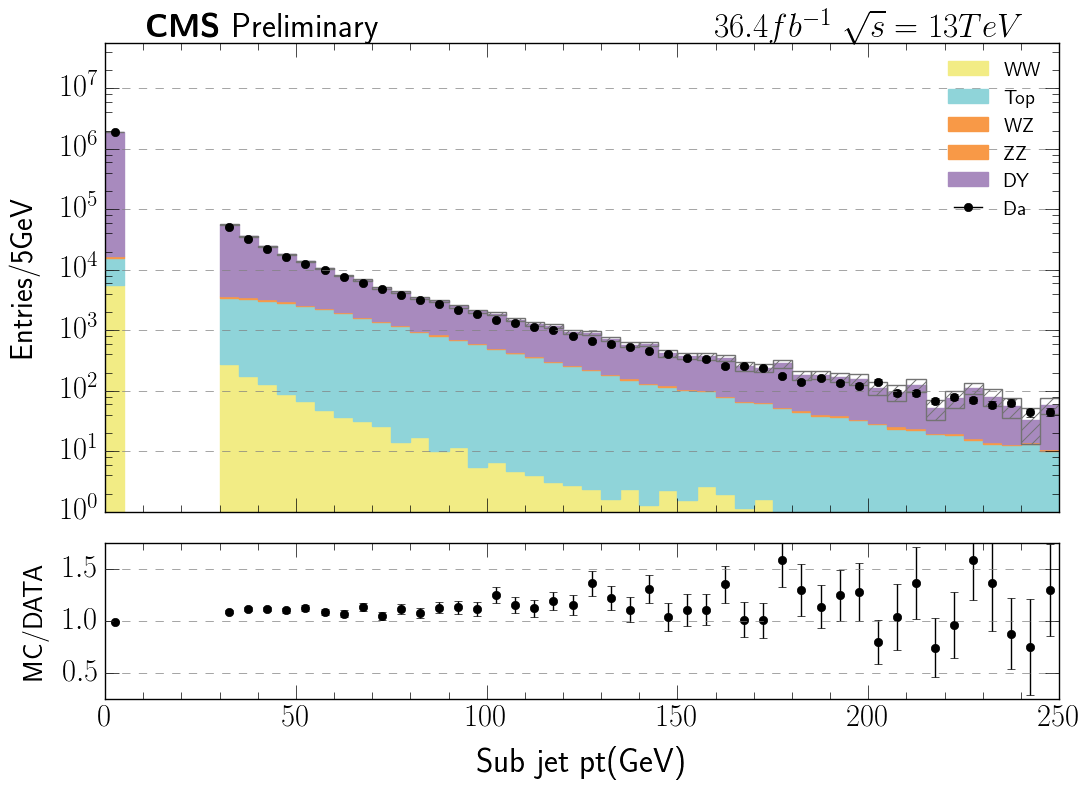

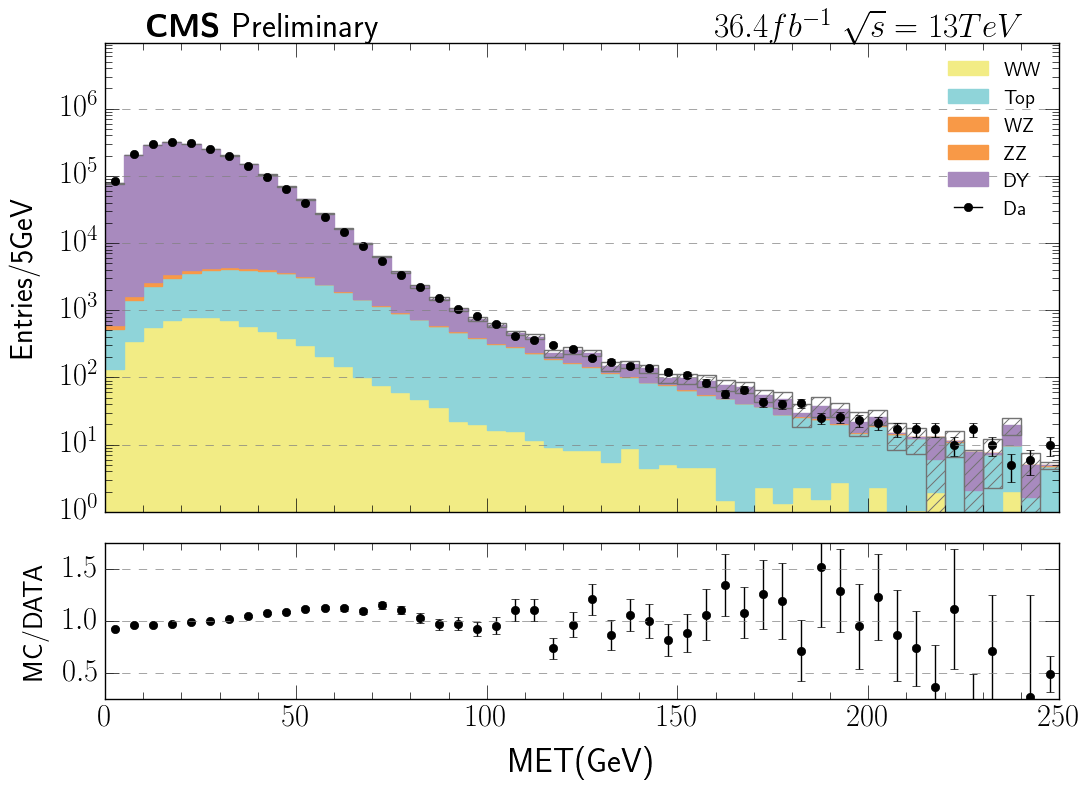

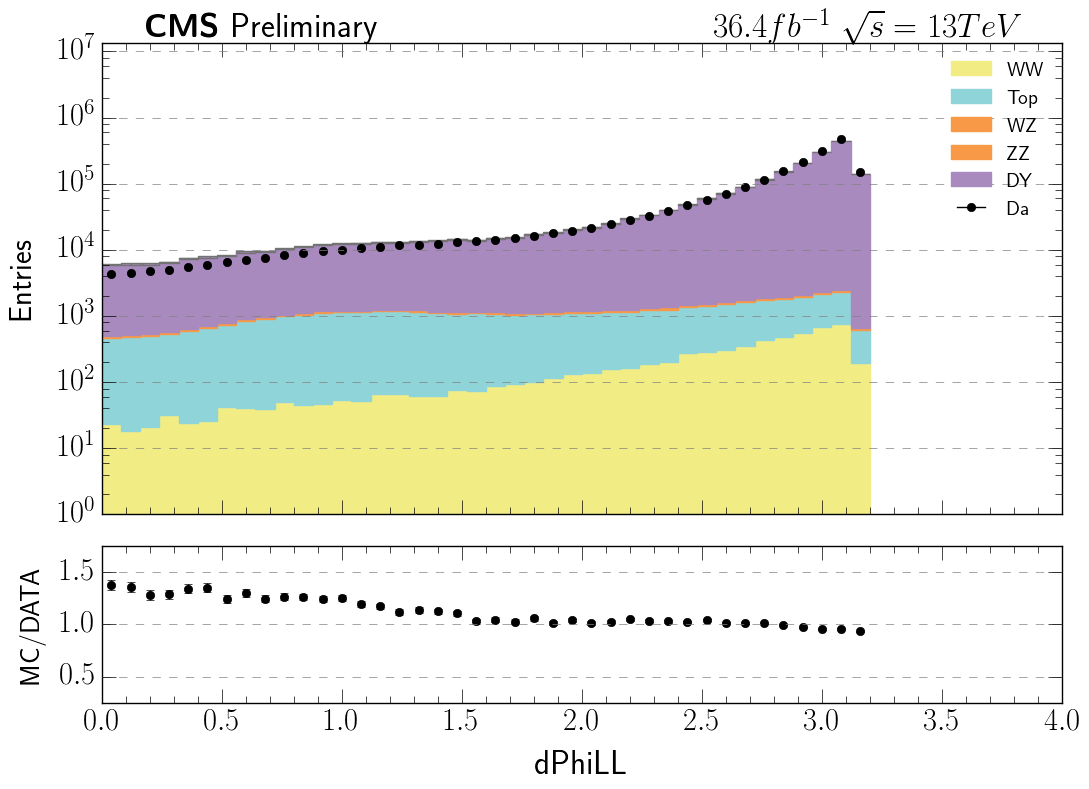

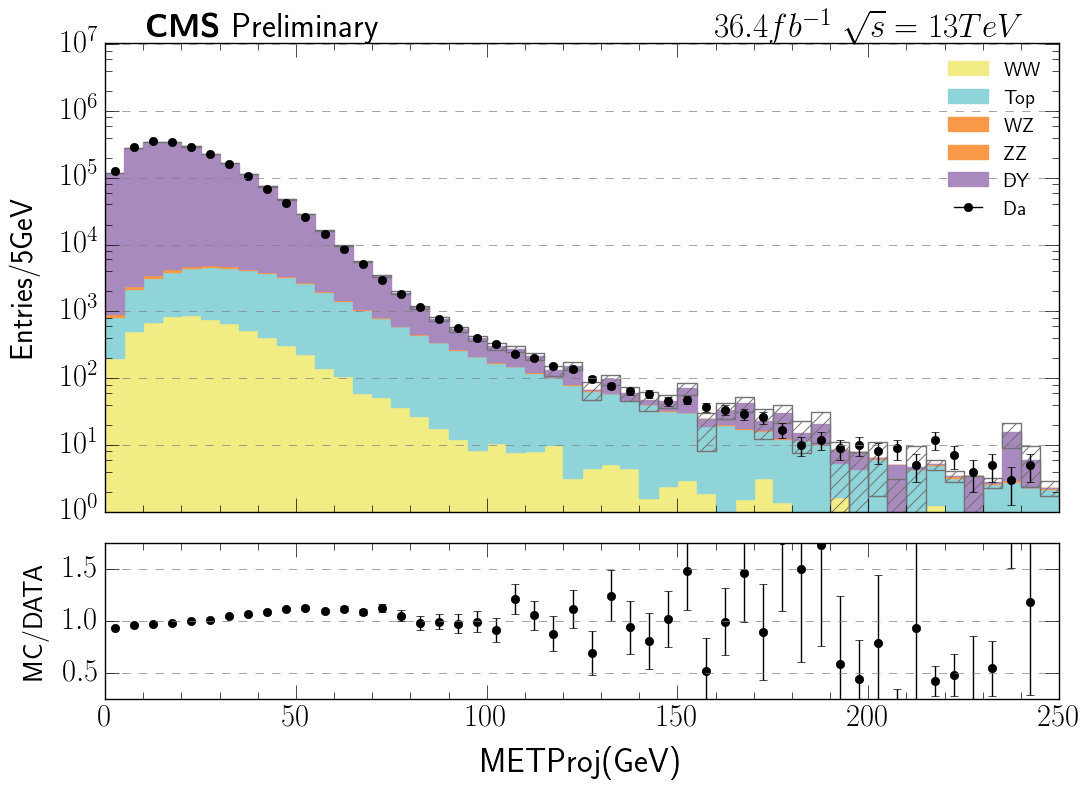

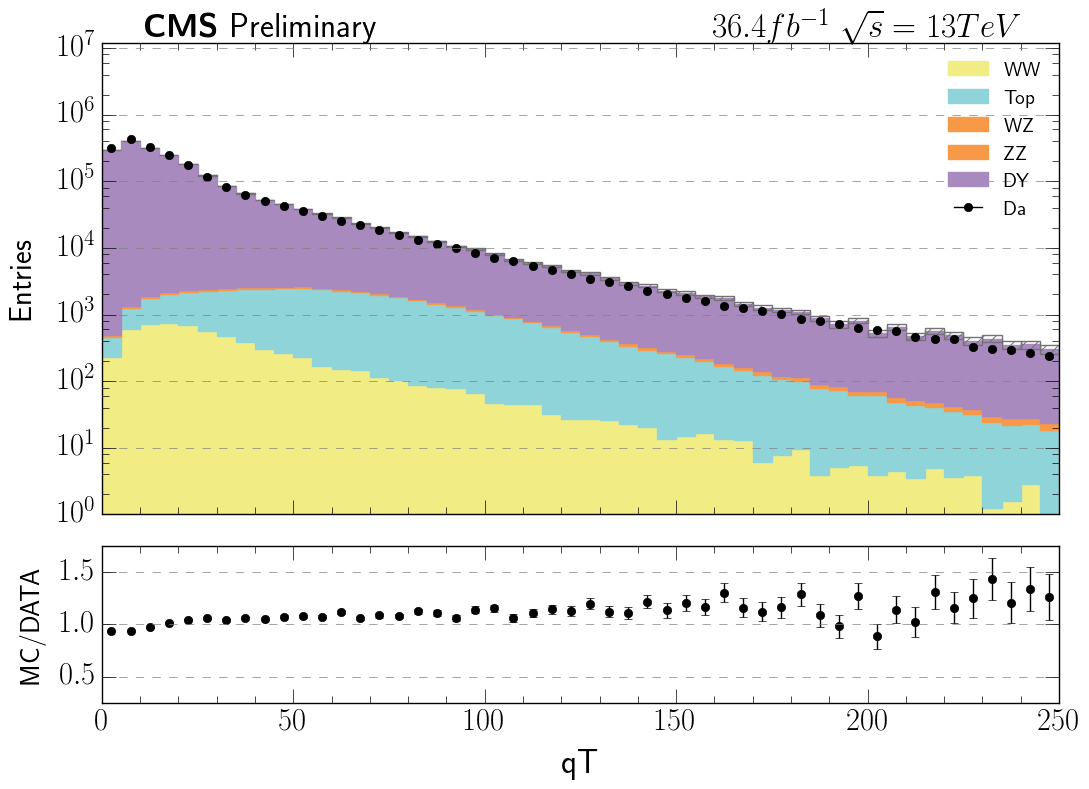

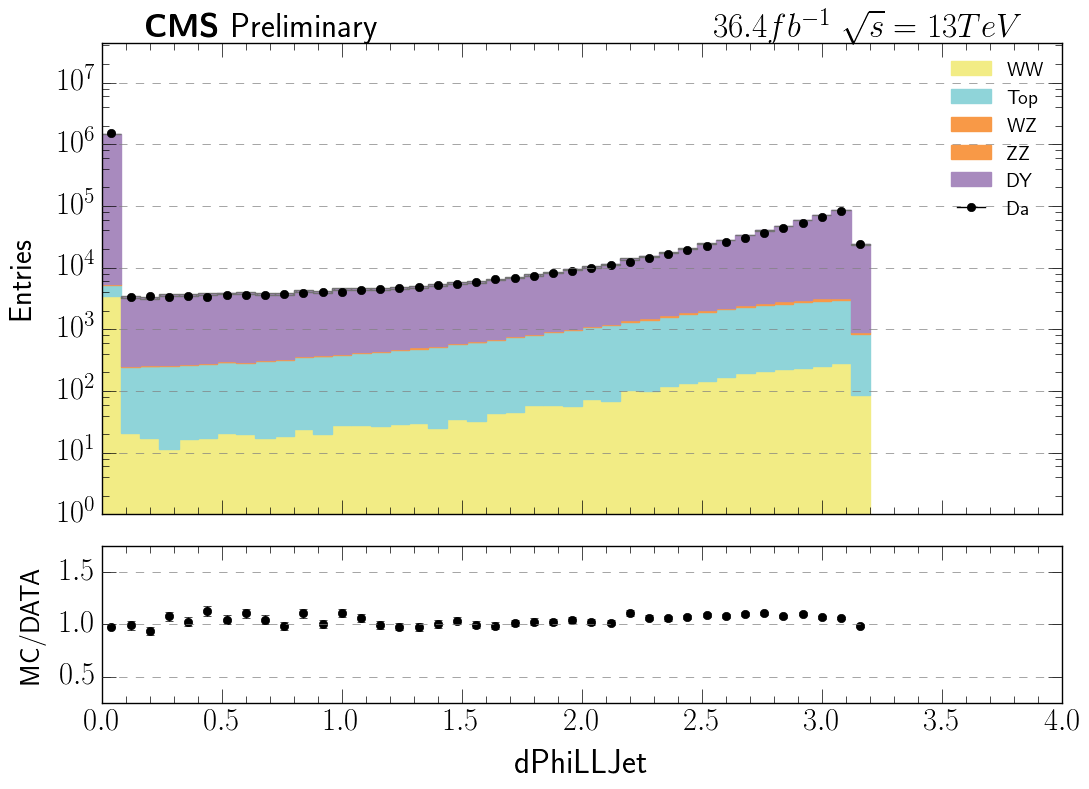

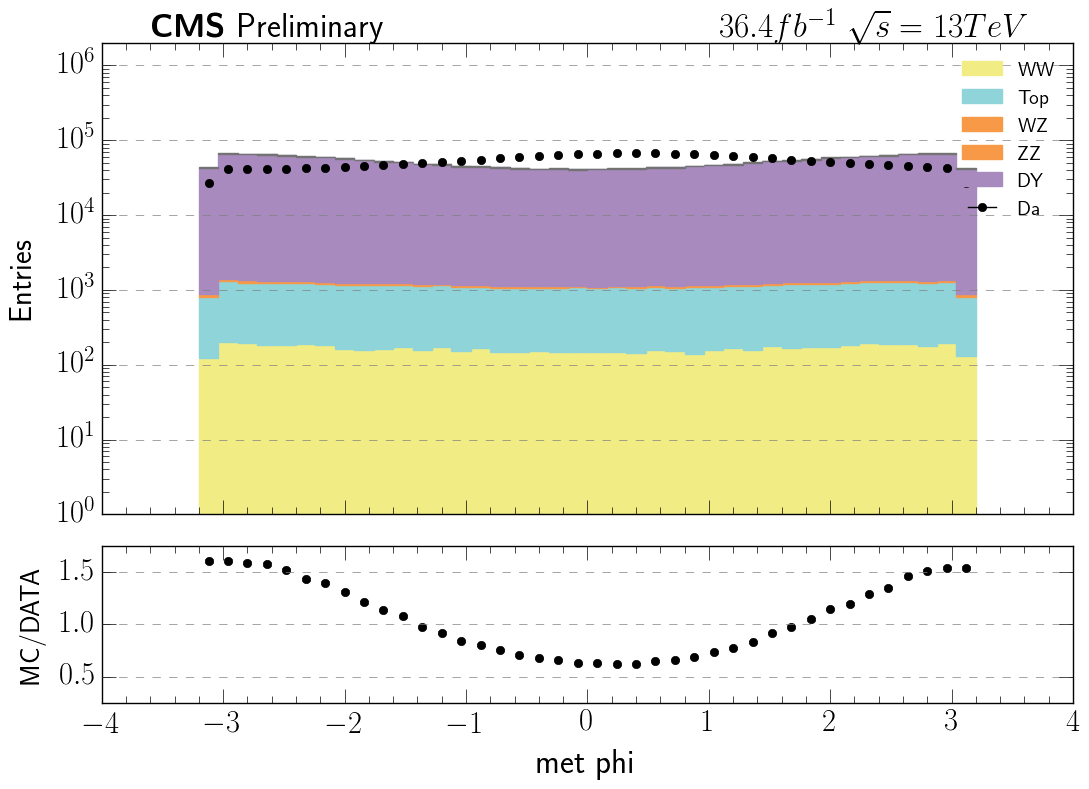

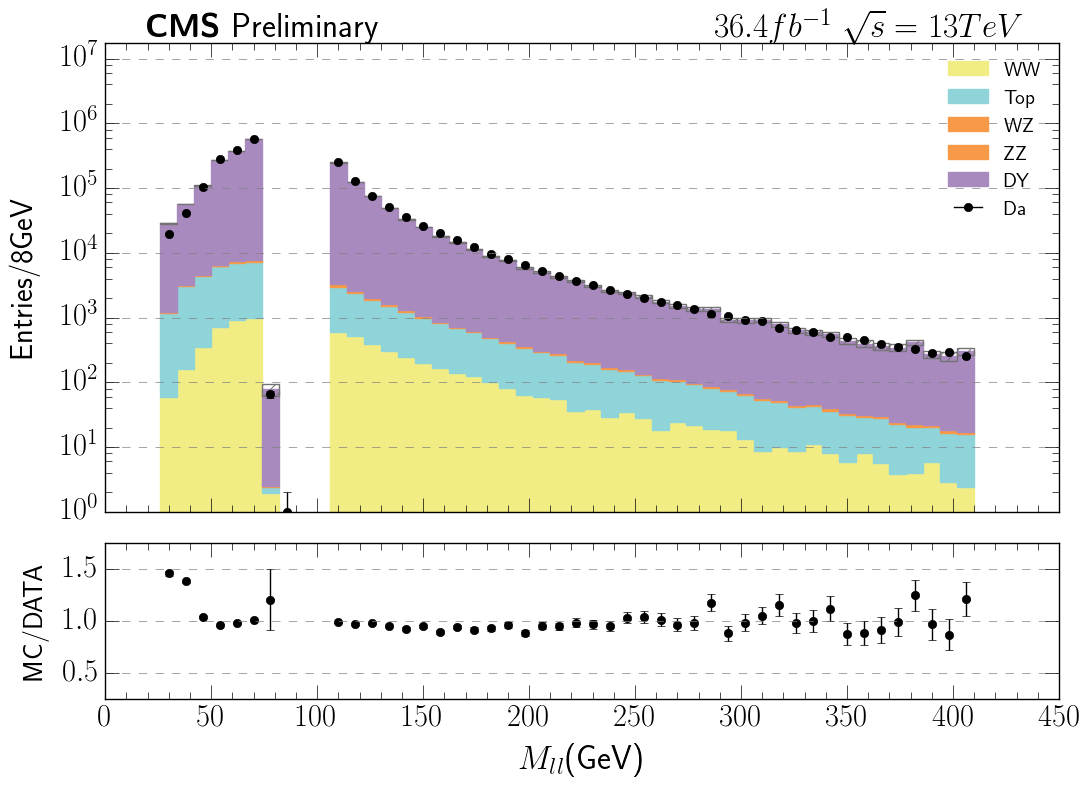

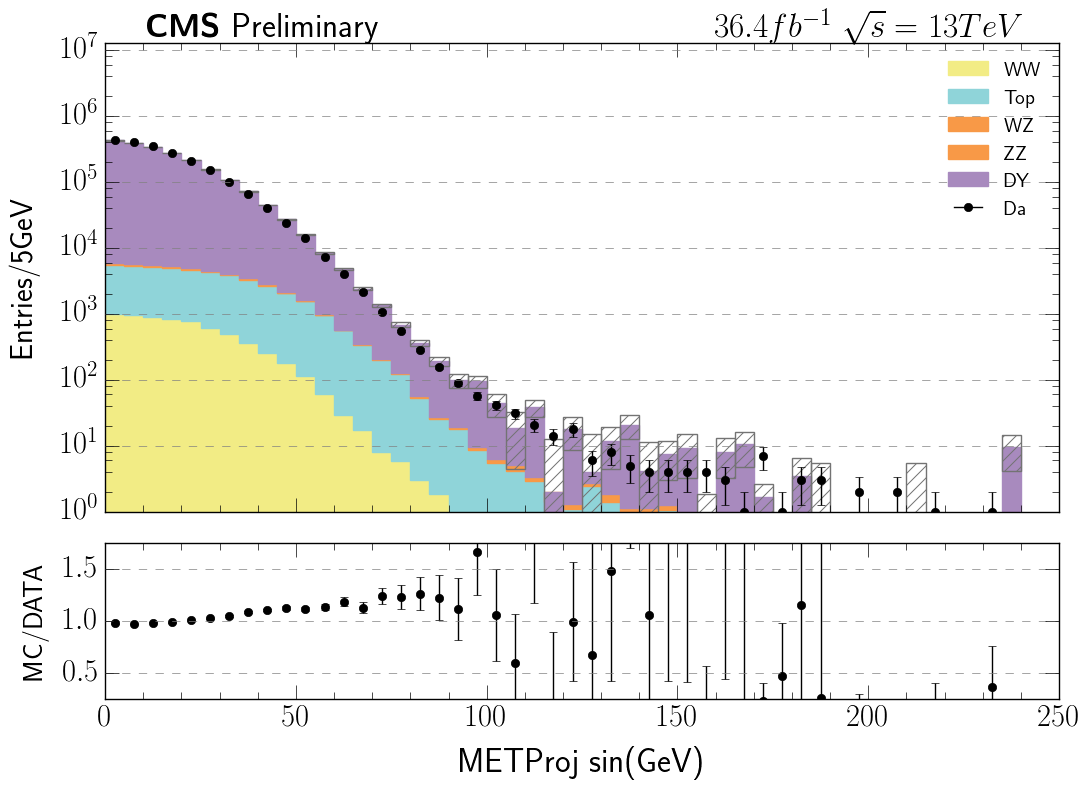

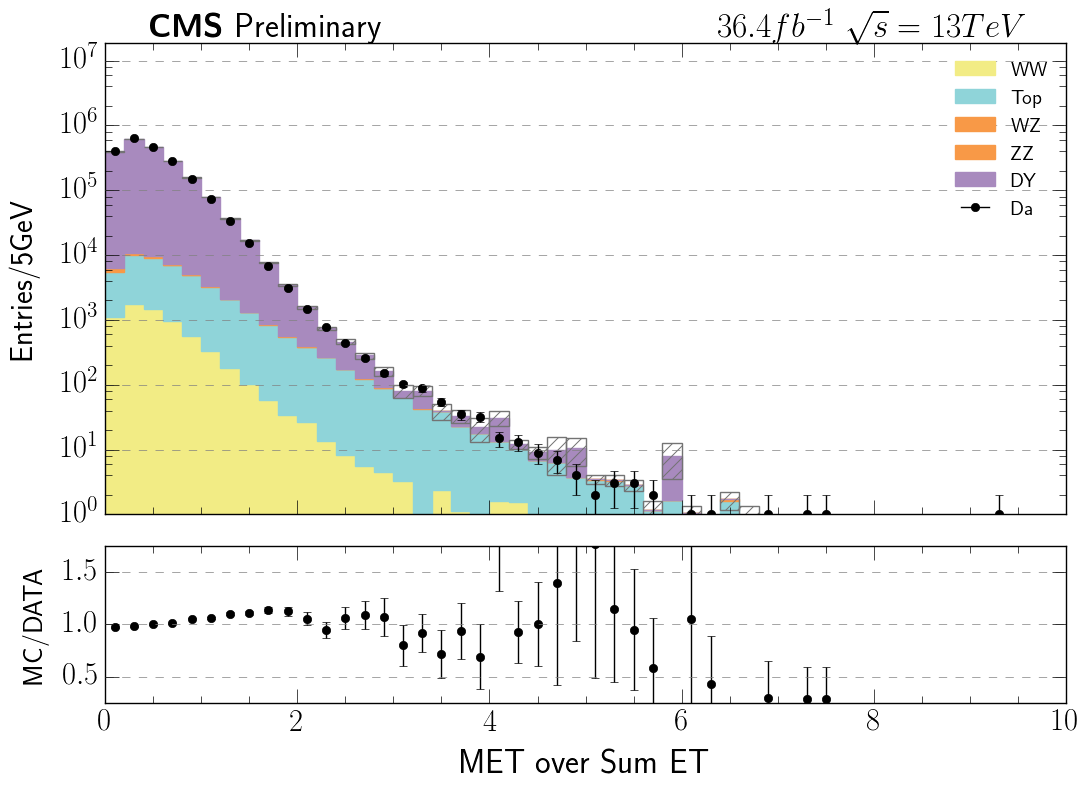

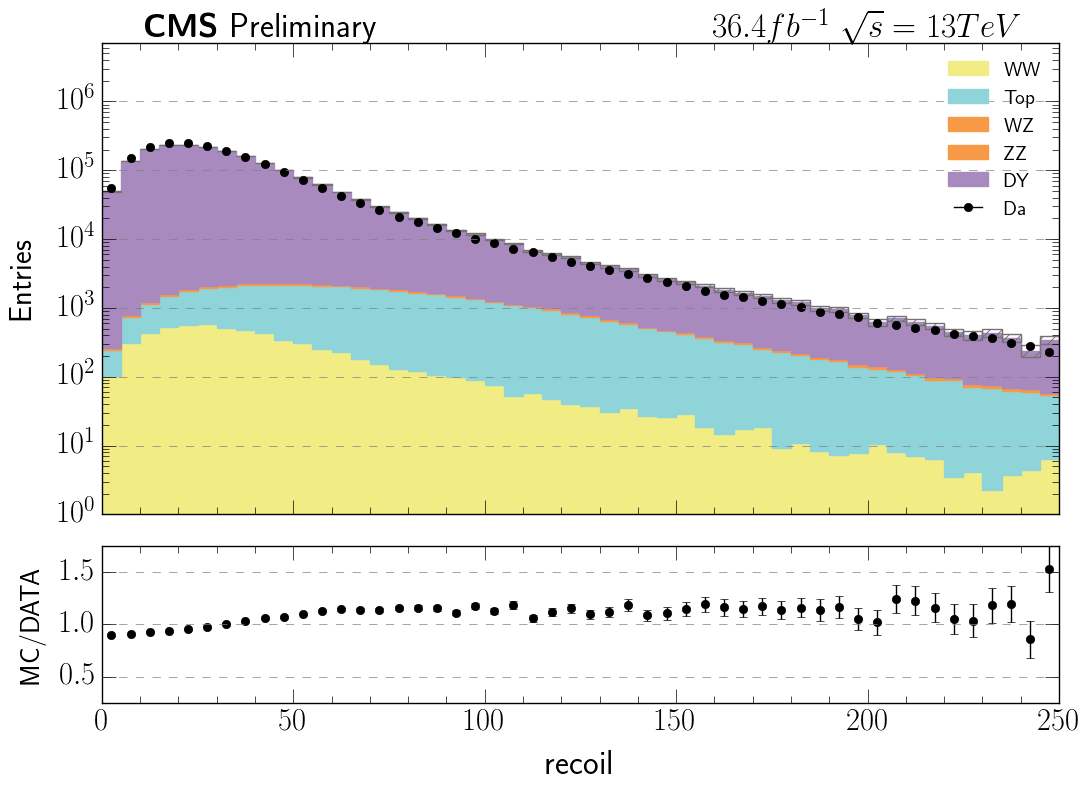

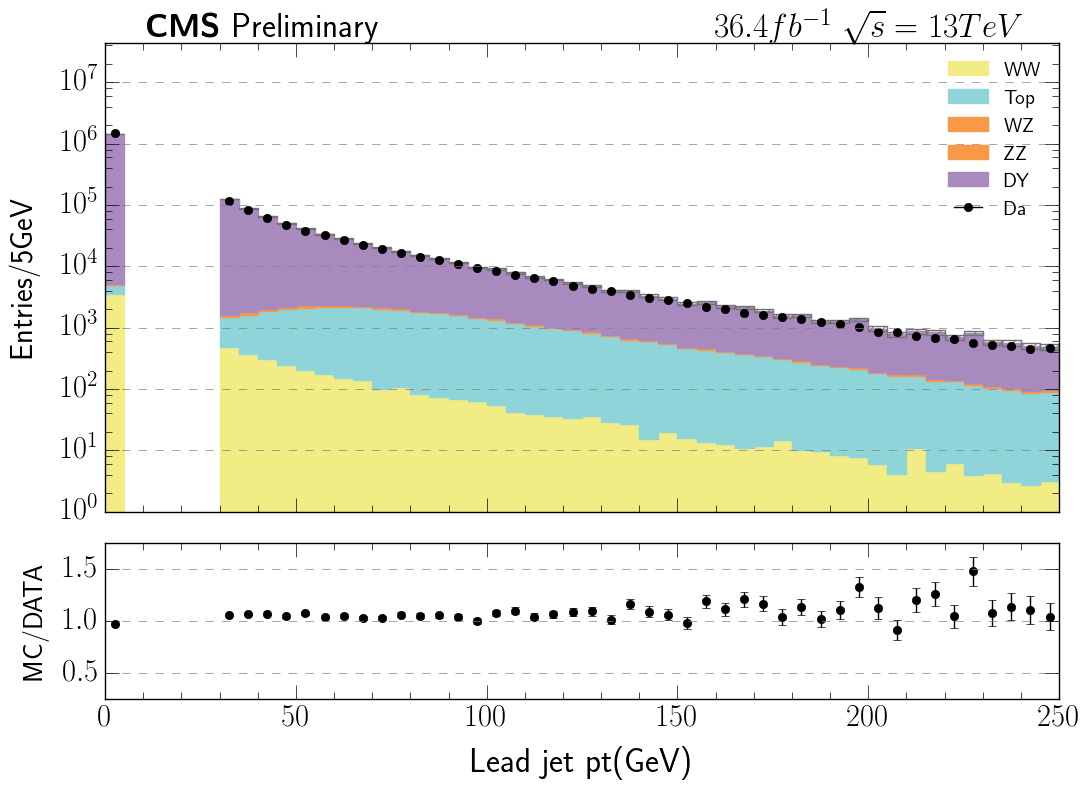

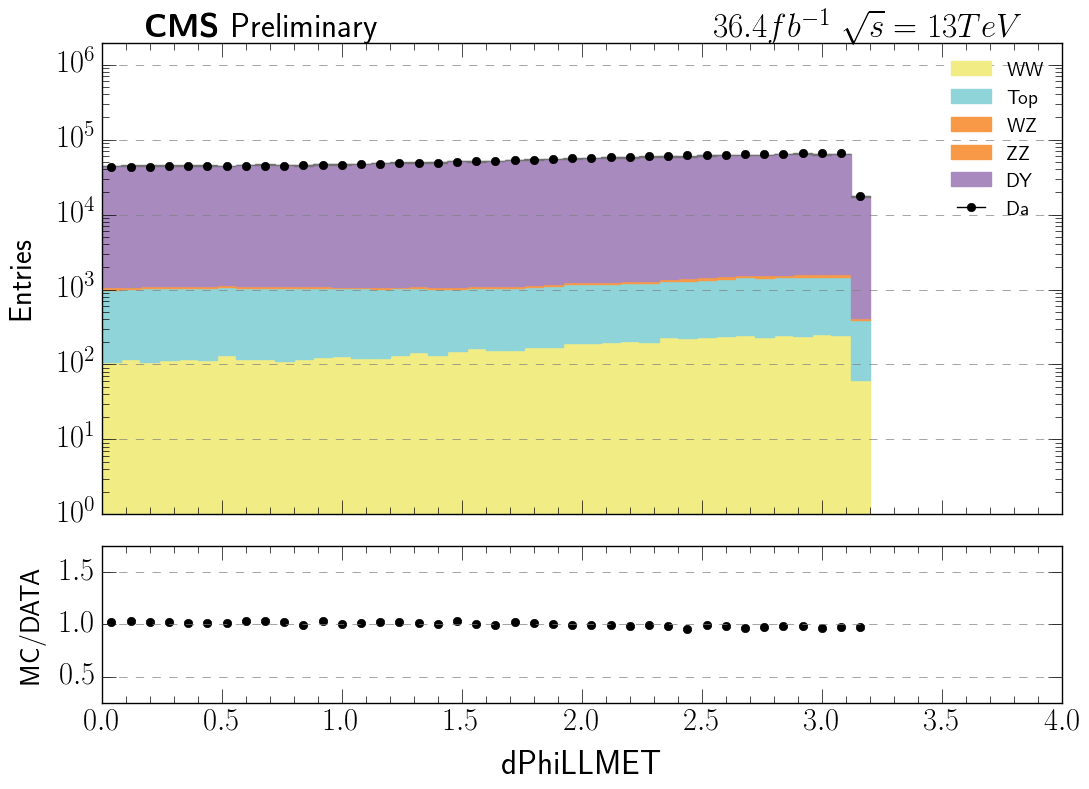

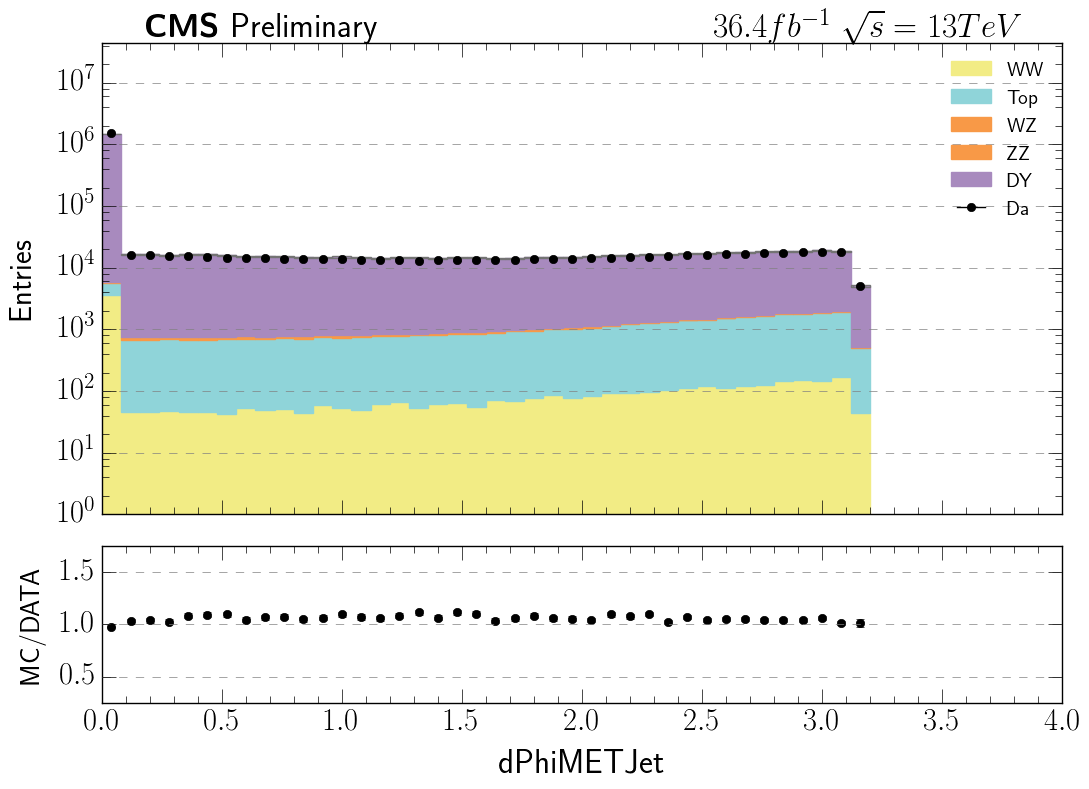

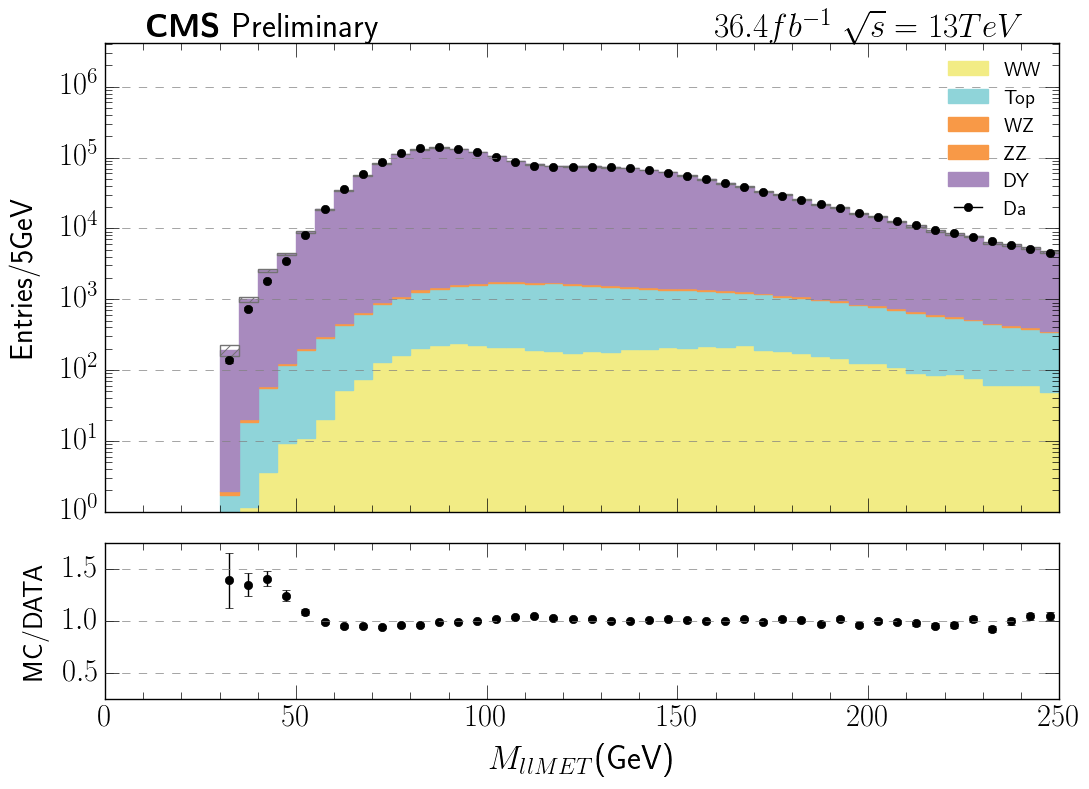

In [80]:
create_kinematic_hist( test[(test.pred_fDY_WW < .4 )  & (test.lep2_pt > 20) ], df_da_pre[(df_da_pre.pred_fDY_WW < .4) & (df_da_pre.lep2_pt > 20) ], prefix="13TeV/rf_plots/bkg_dy_cut", scales=scales_test )


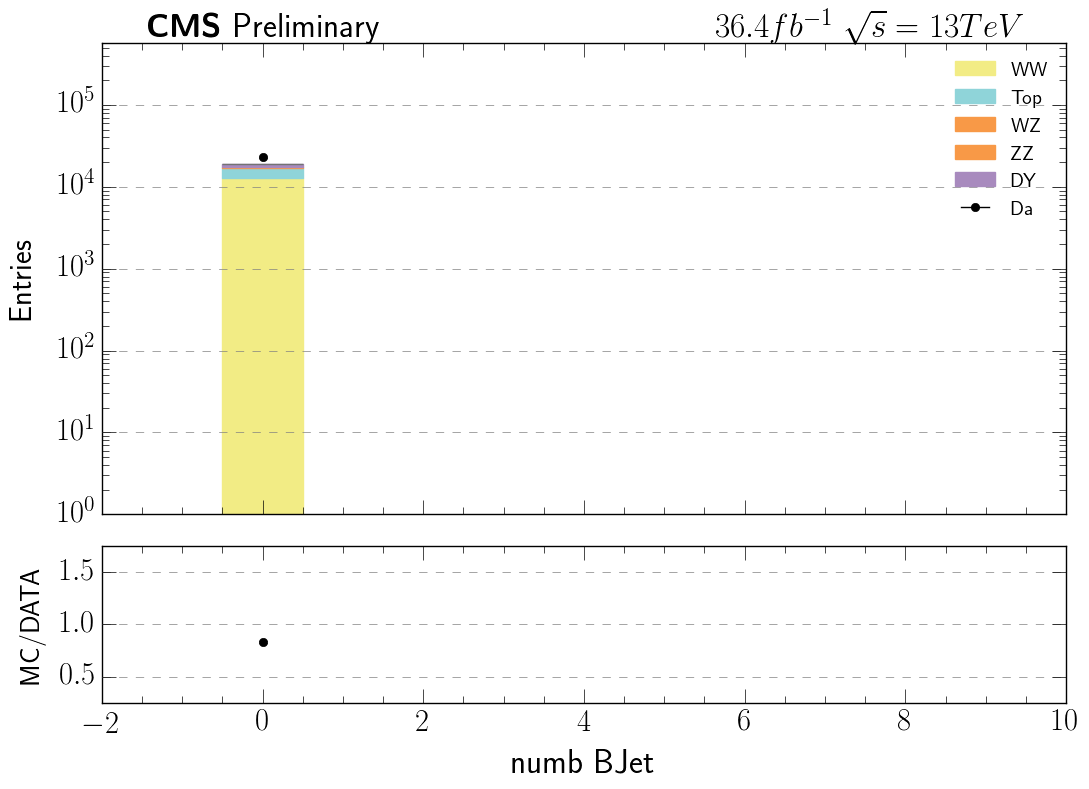

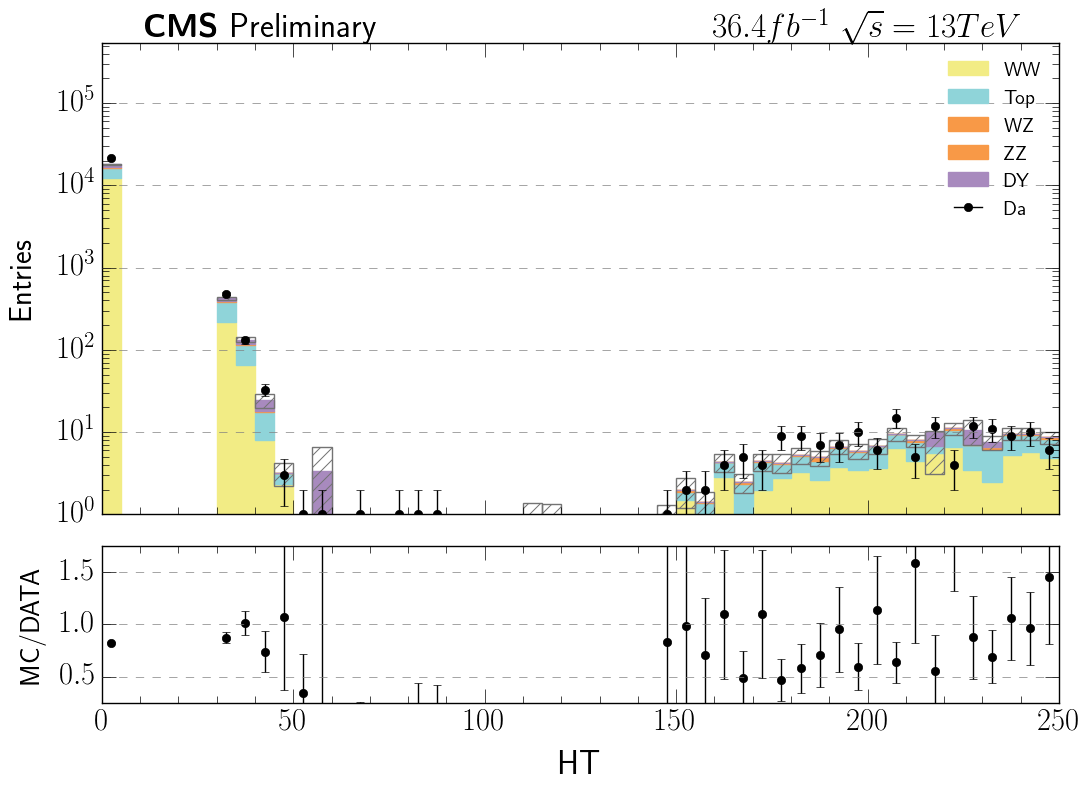

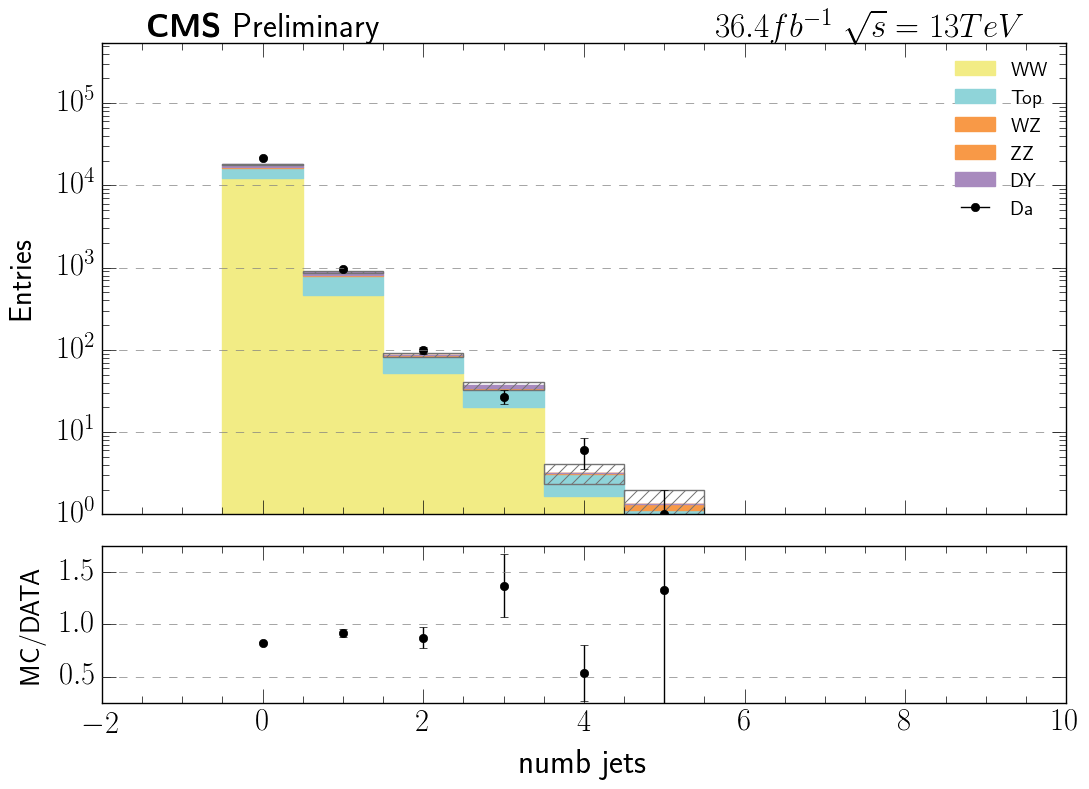

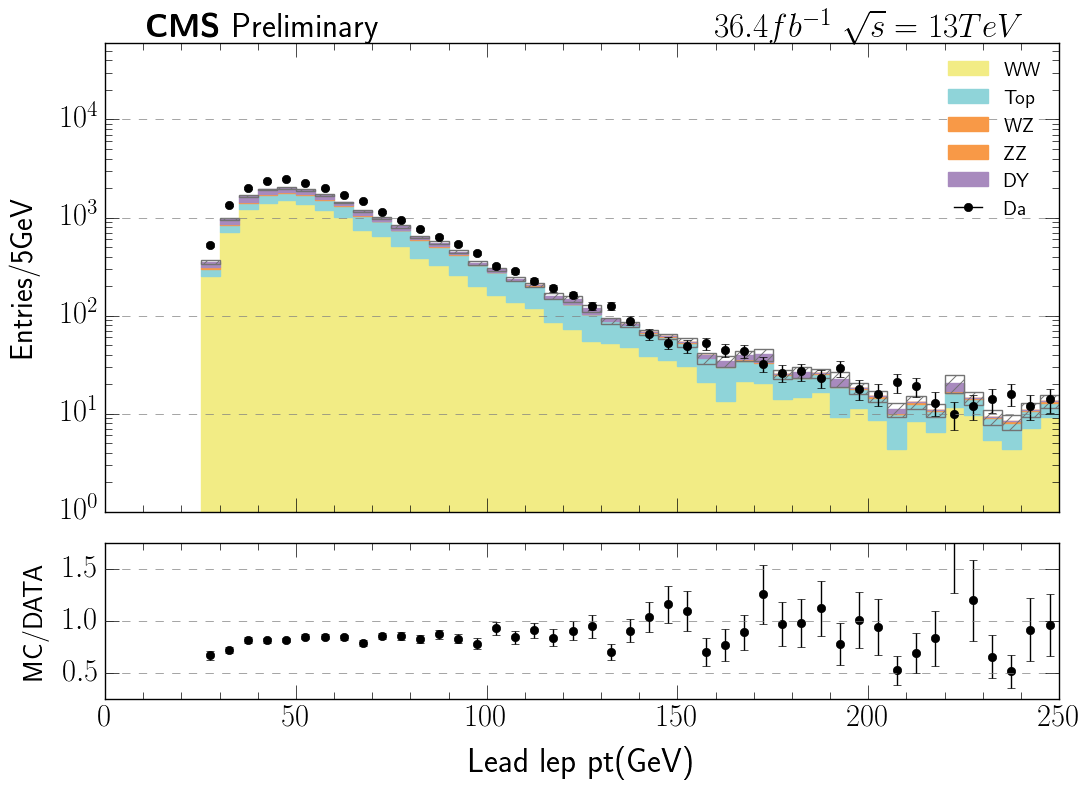

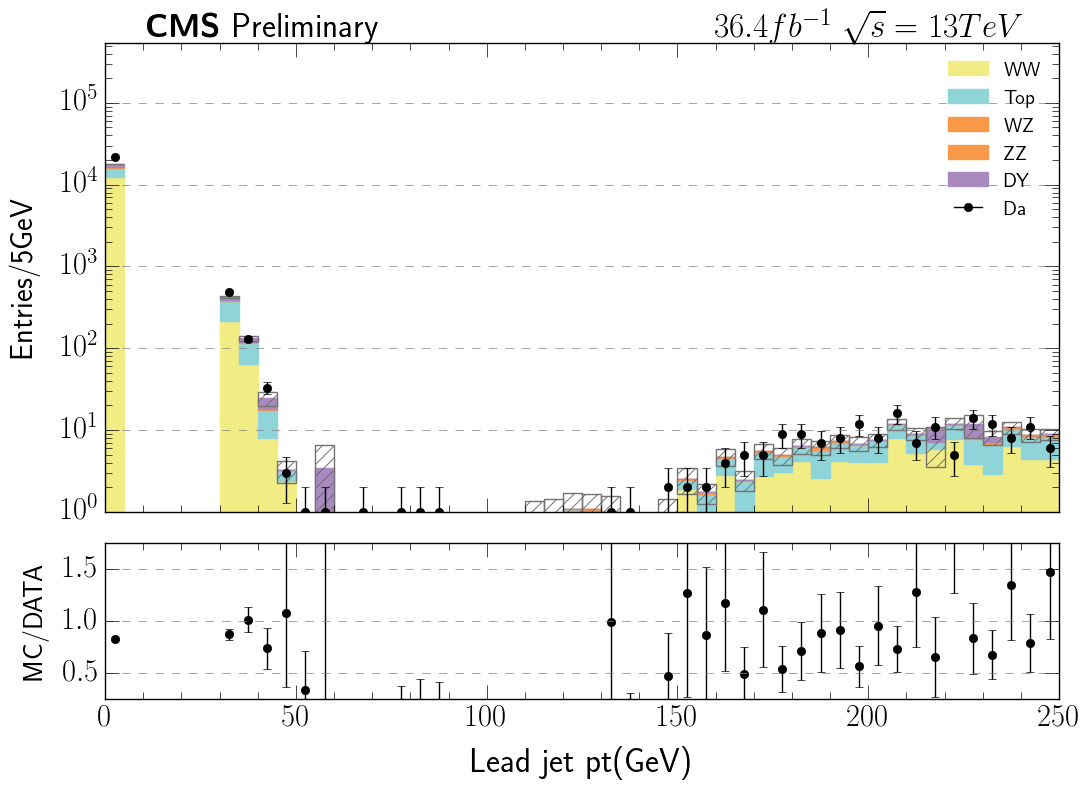

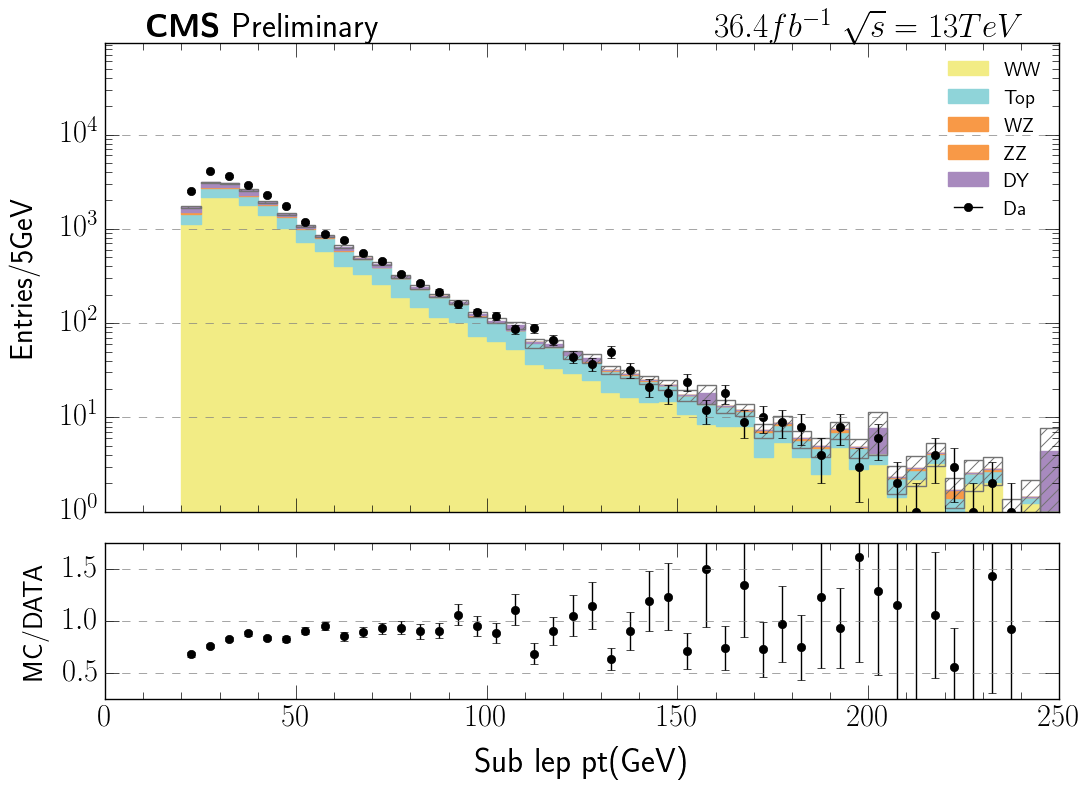

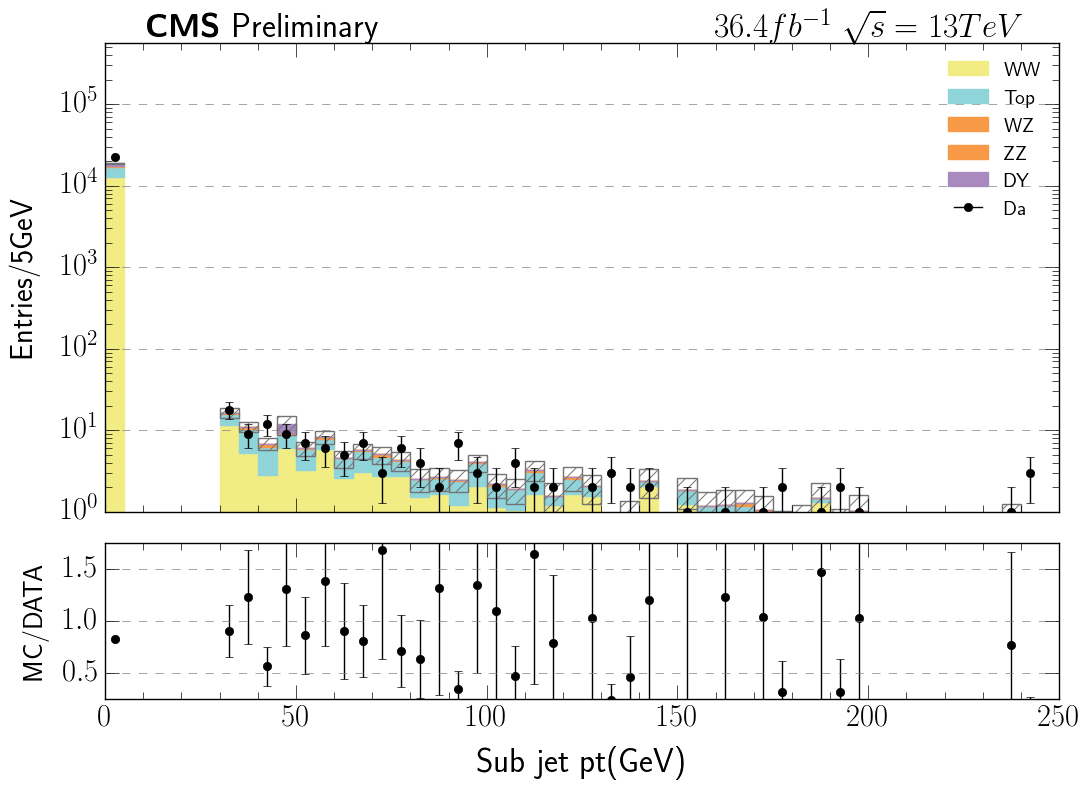

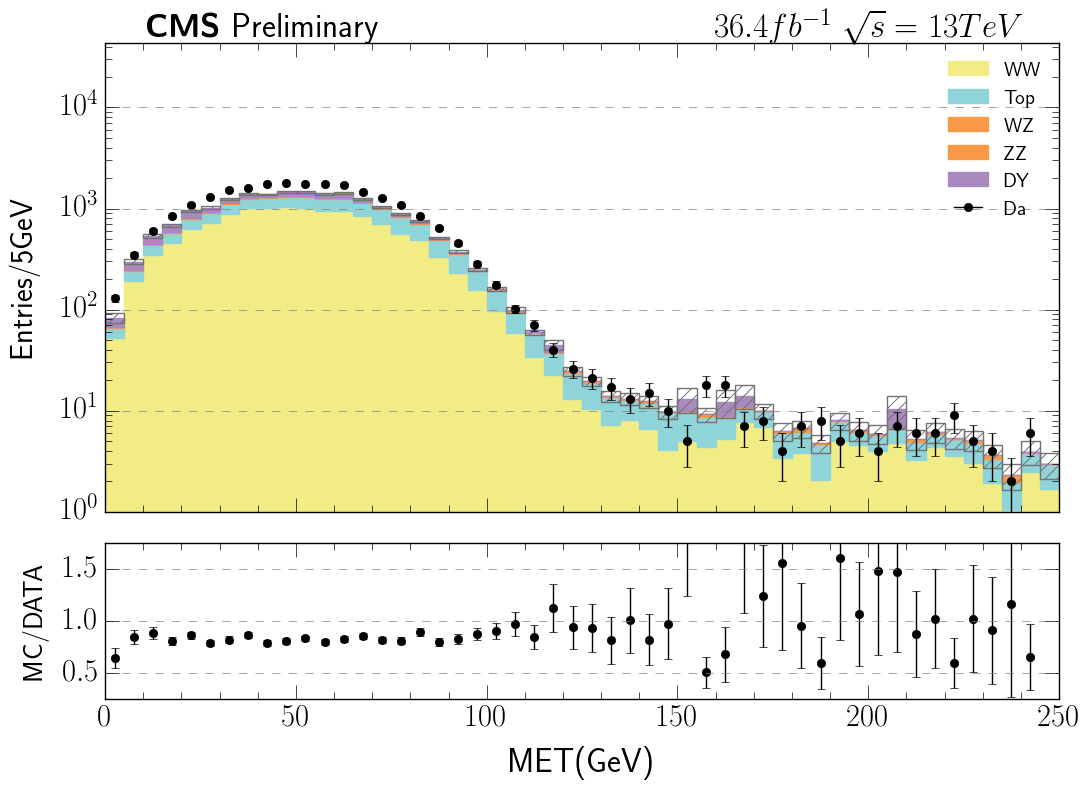

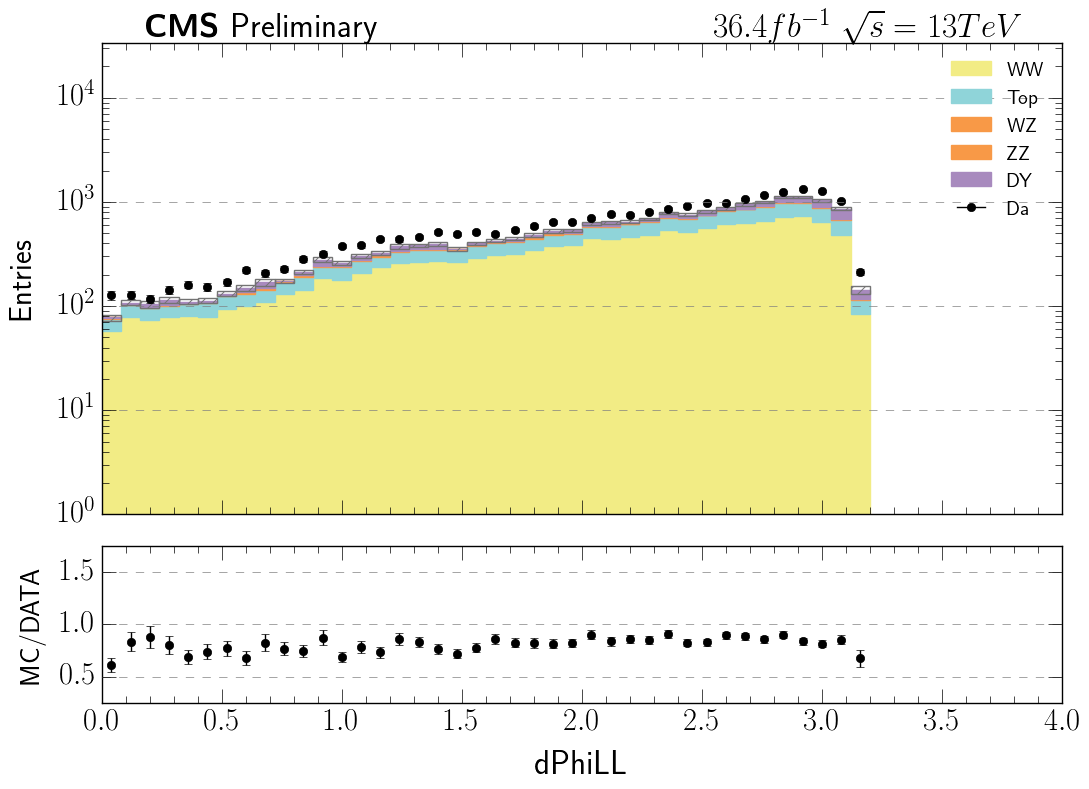

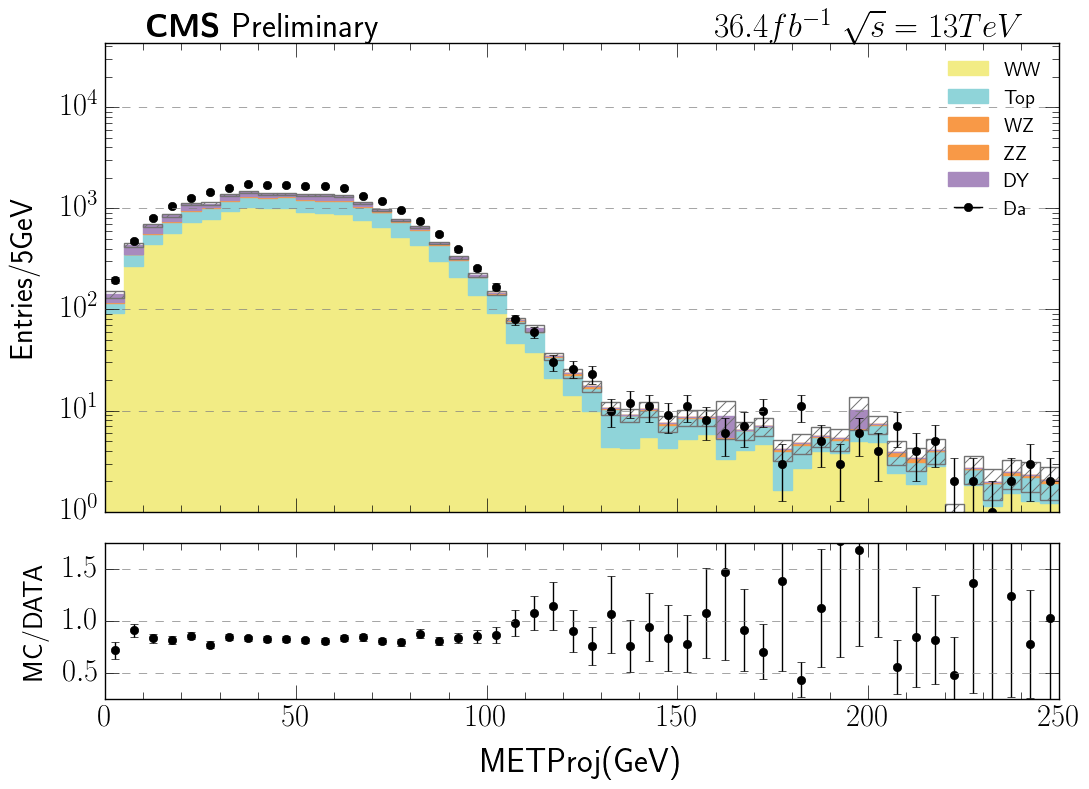

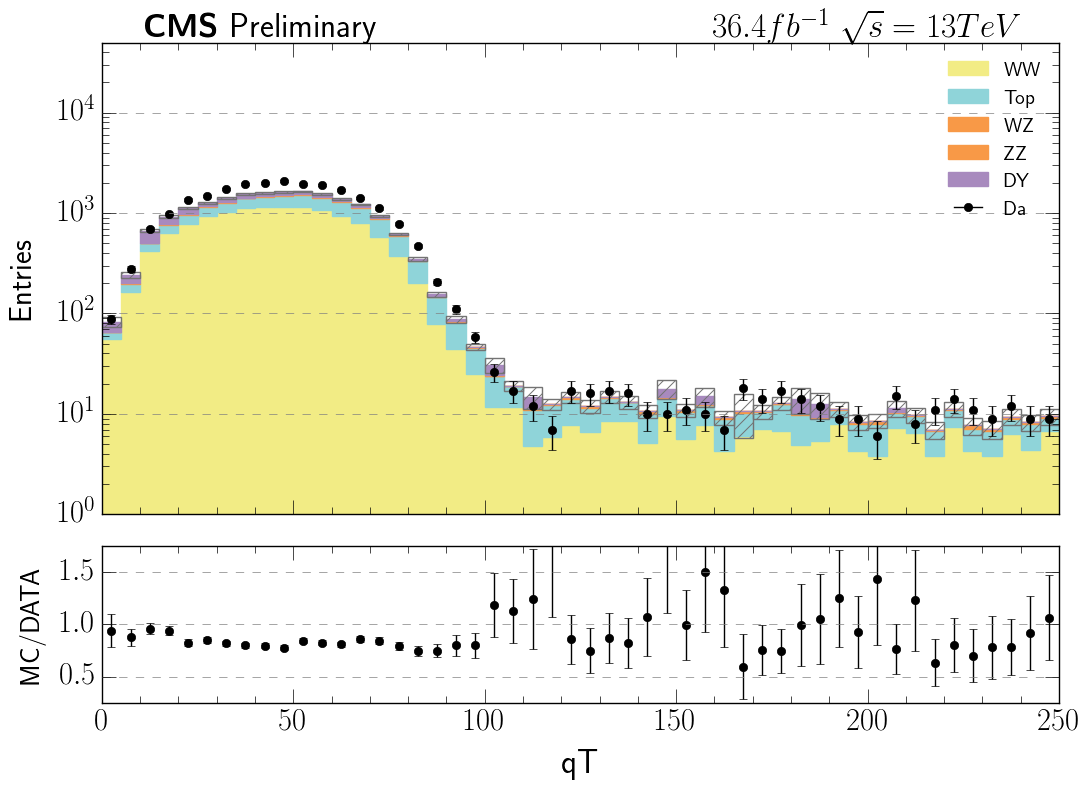

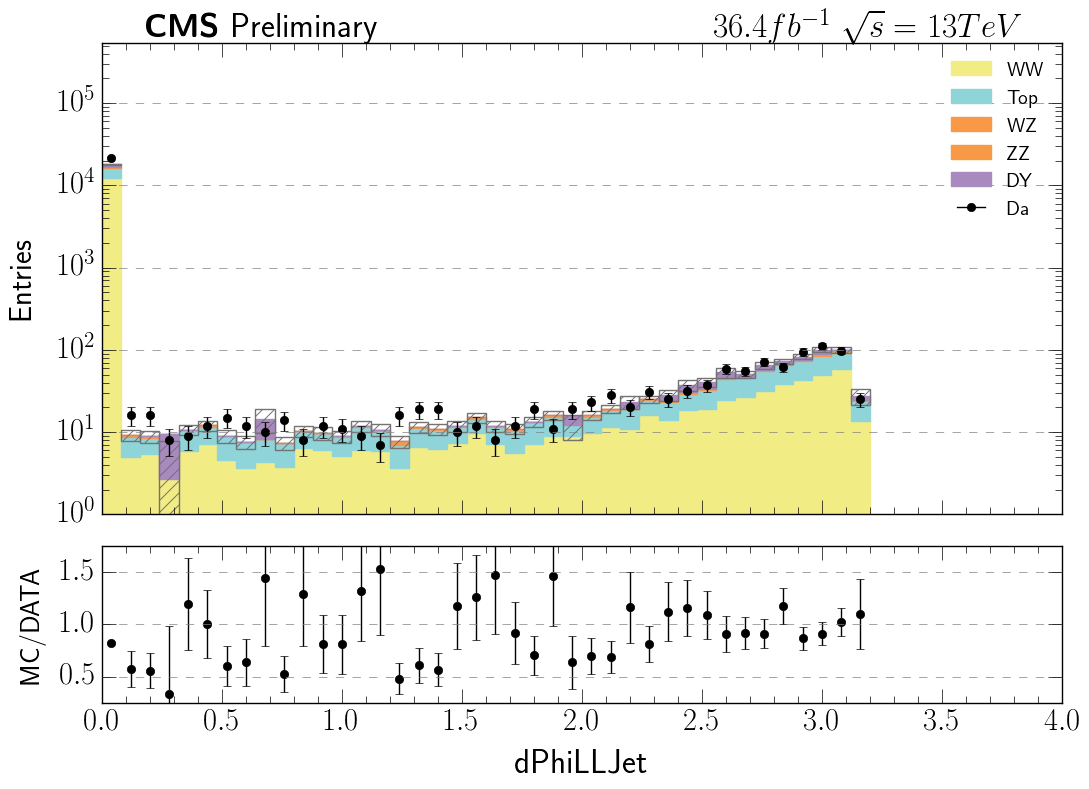

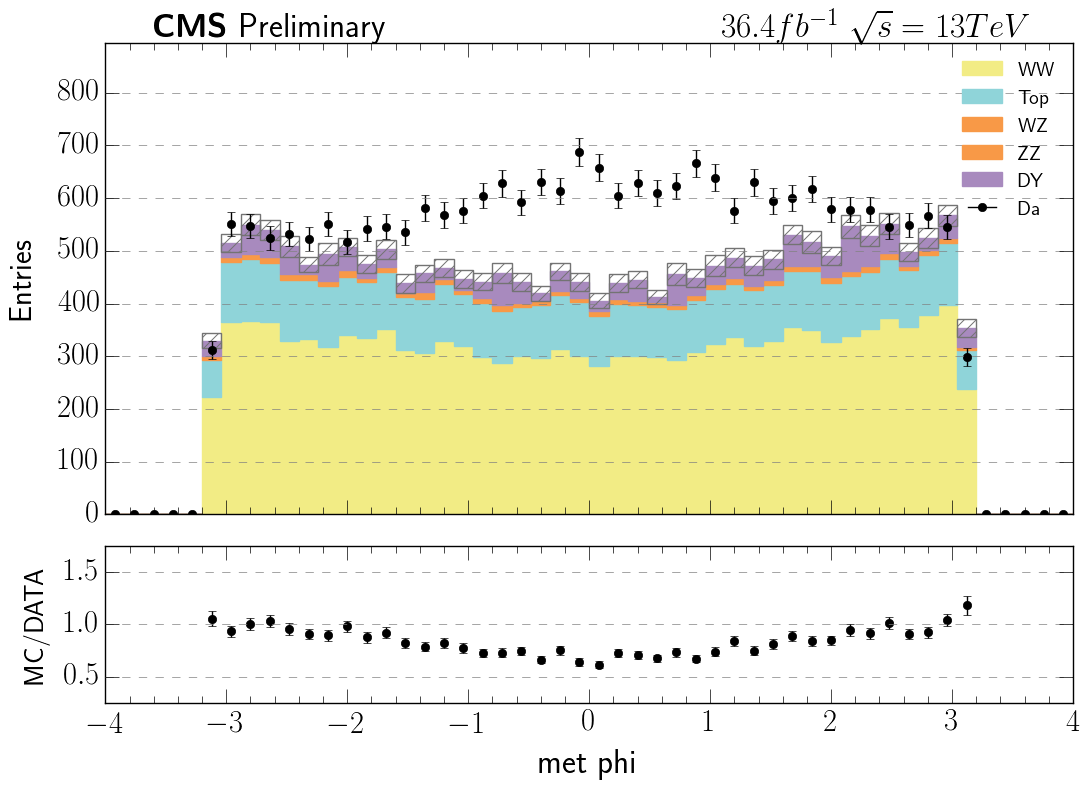

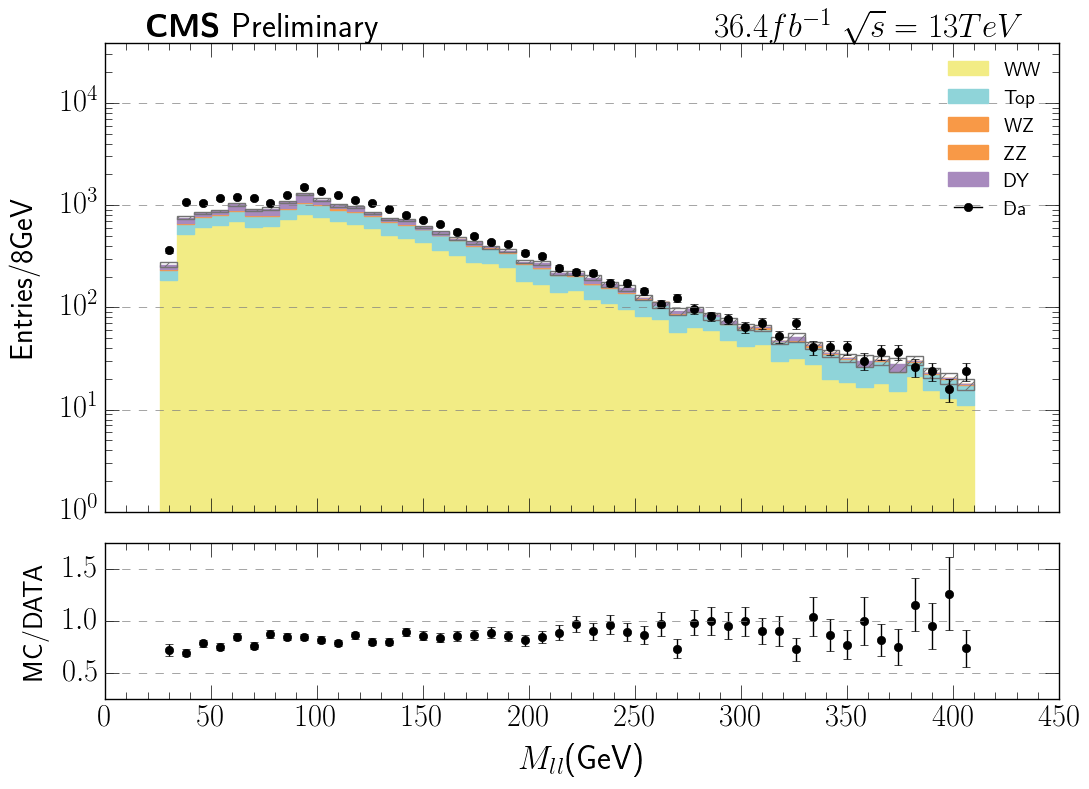

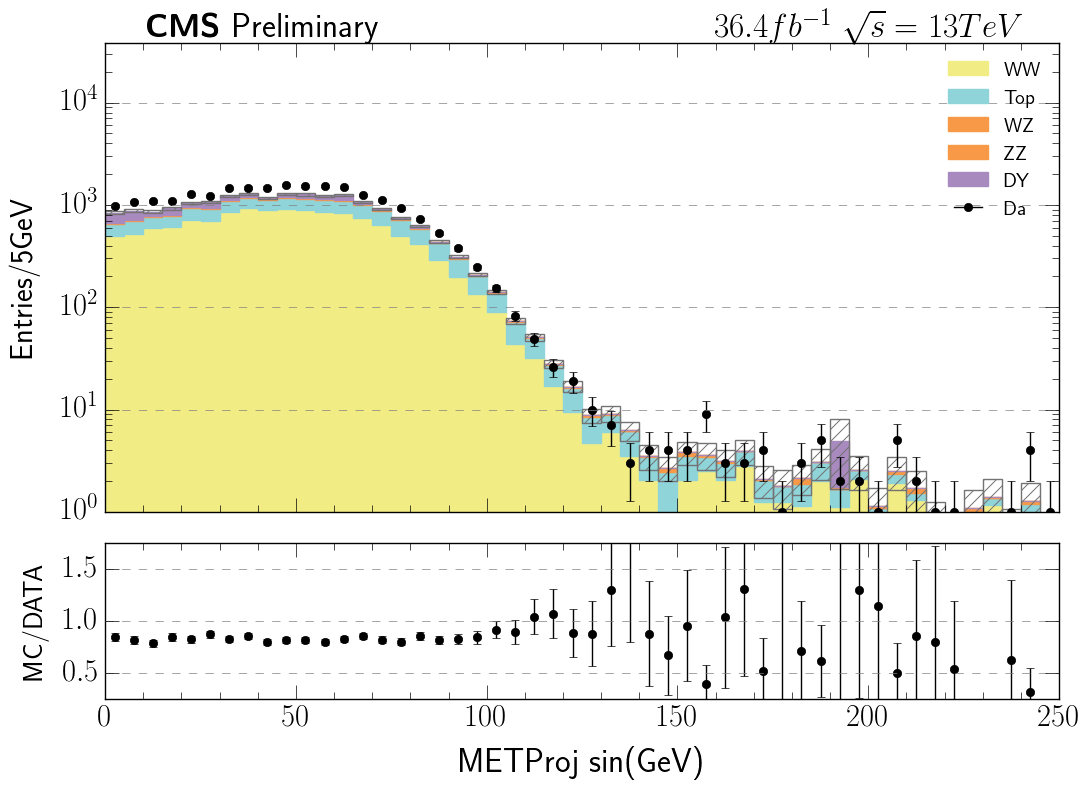

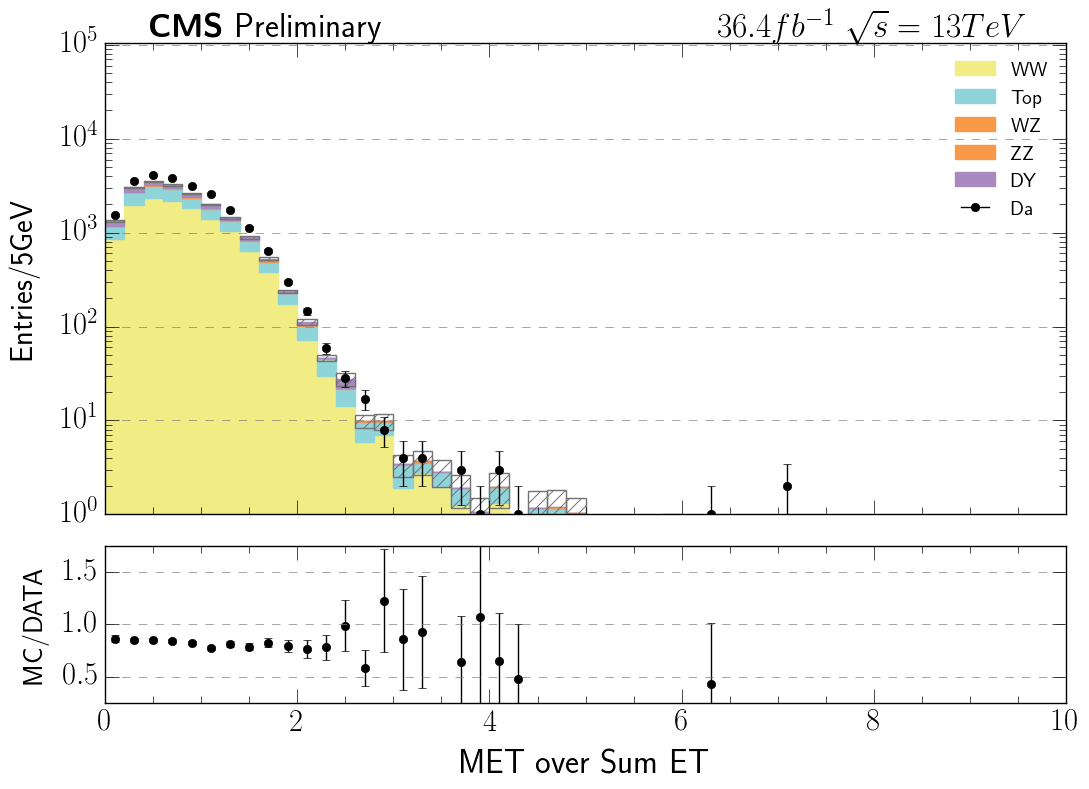

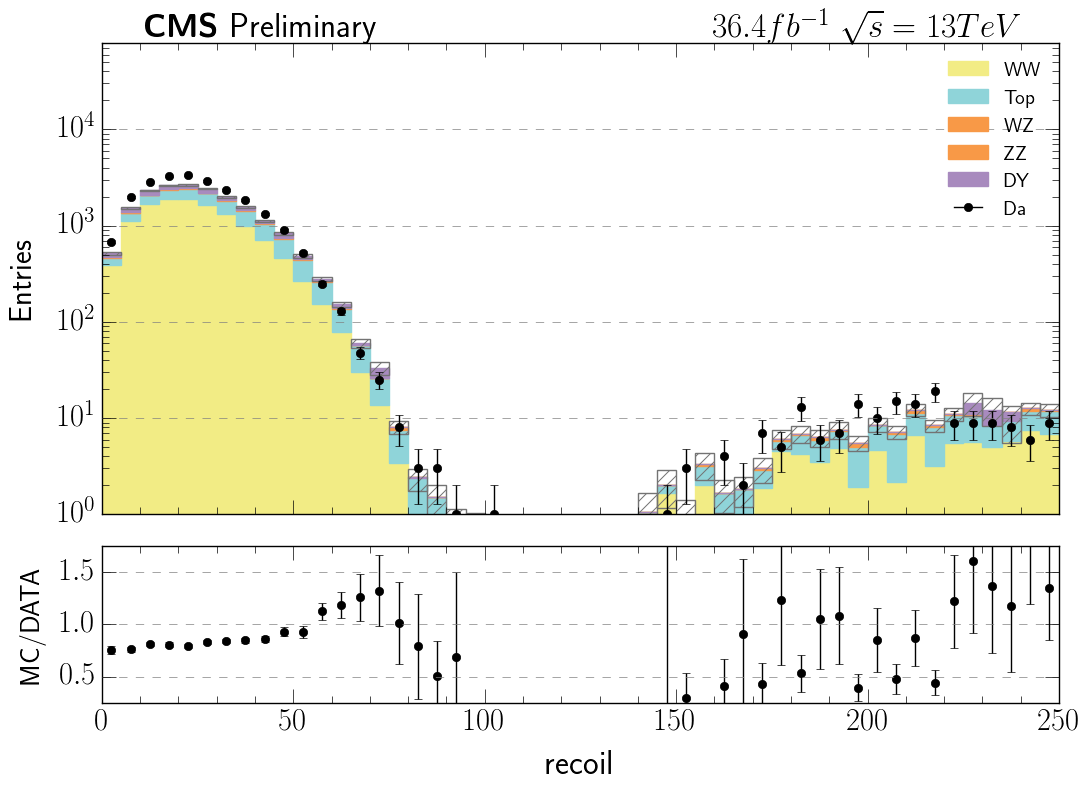

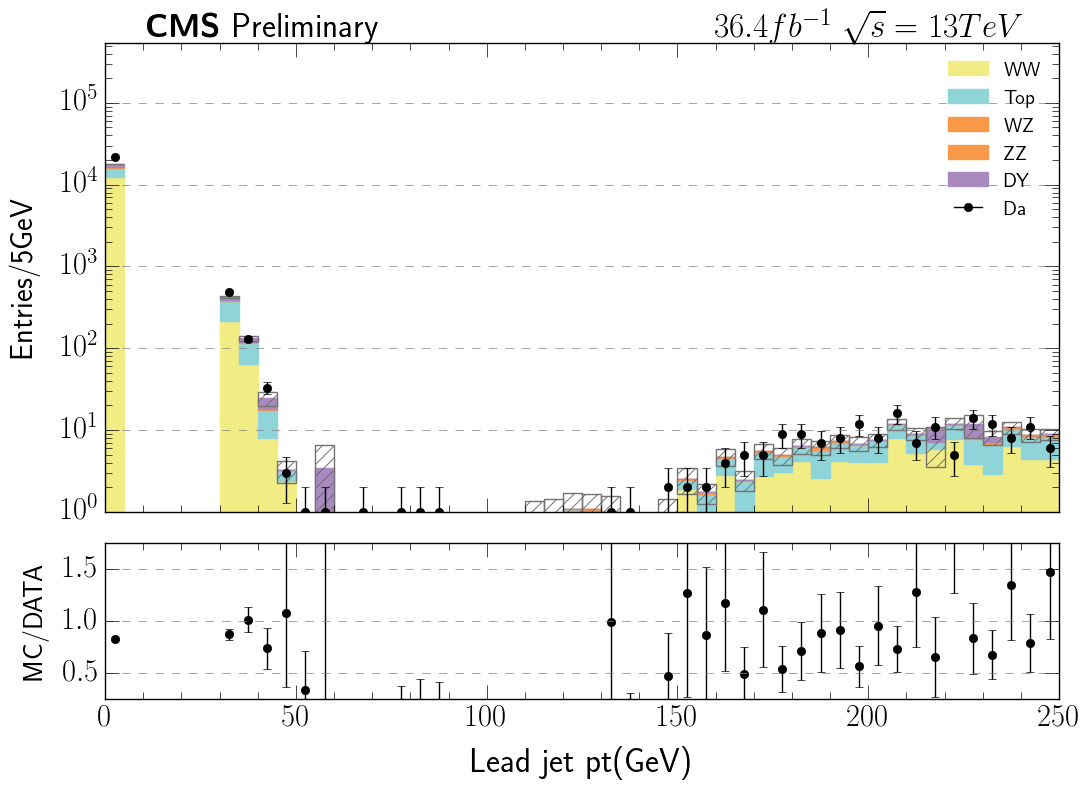

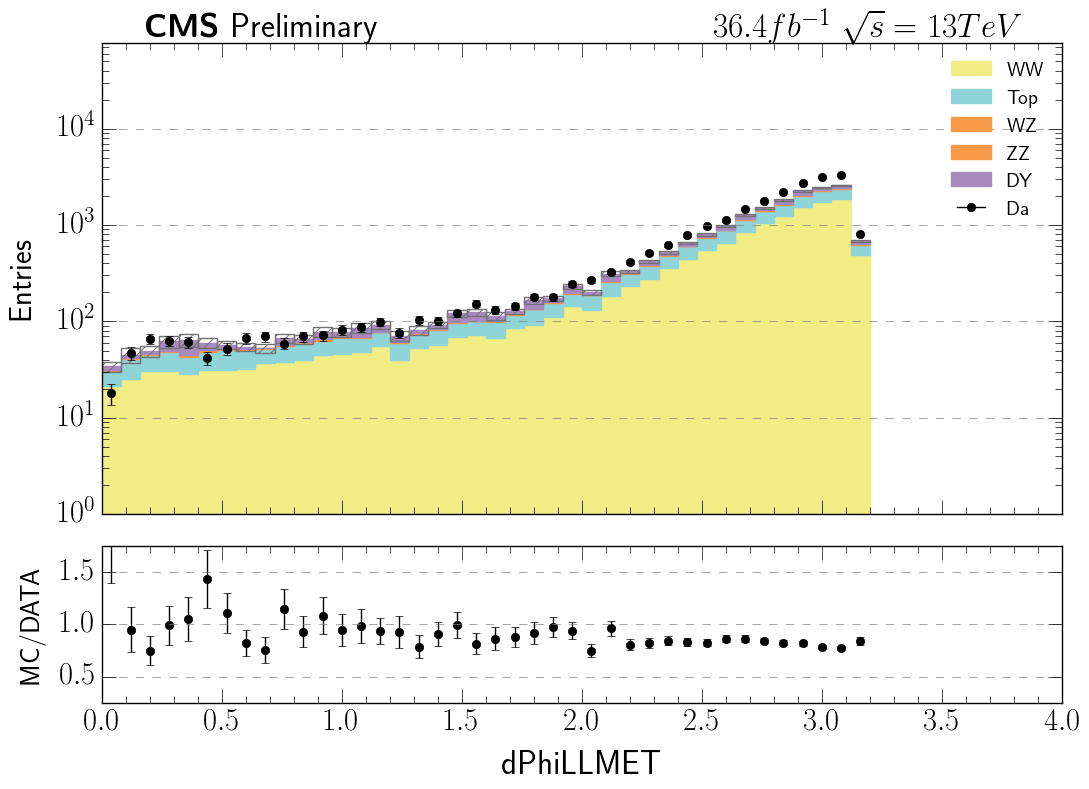

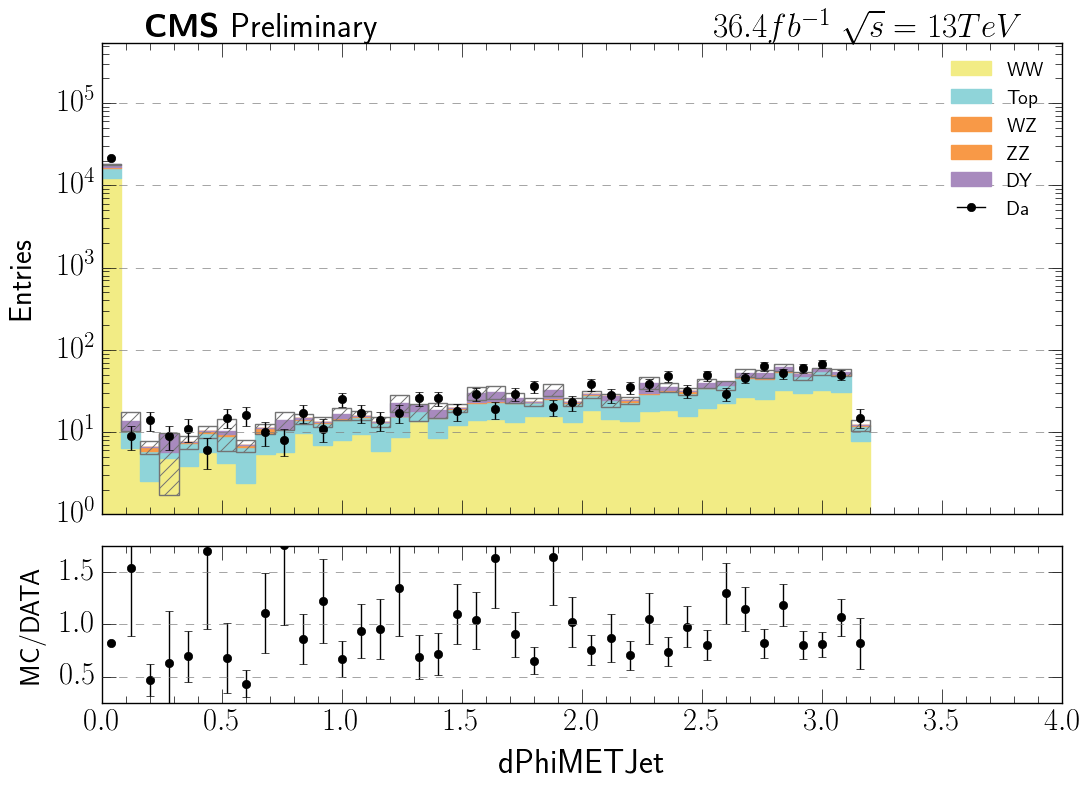

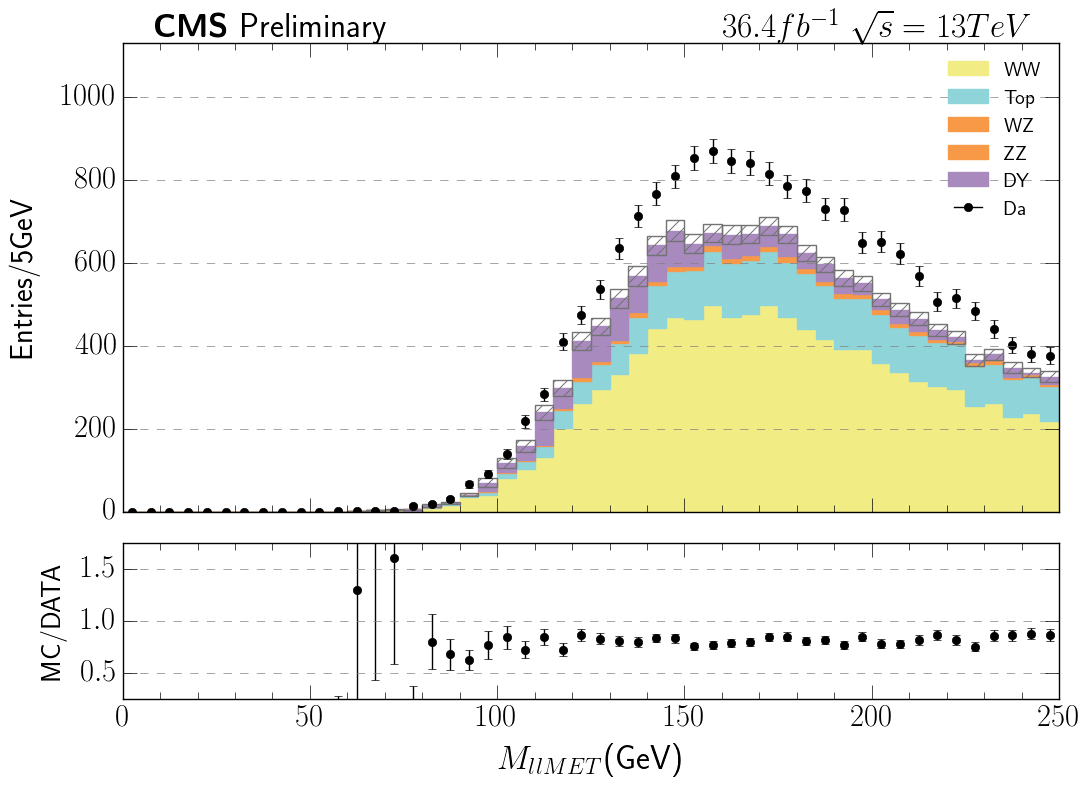

In [81]:
create_kinematic_hist( test[(test.pred_fDY_WW > .97 ) & (test.pred_fTT_WW > .65 )  & (test.lep2_pt > 20)], df_da_pre[(df_da_pre.pred_fTT_WW > .65) & (df_da_pre.pred_fDY_WW > .97) & (df_da_pre.lep2_pt > 20)], prefix="13TeV/rf_plots/sig_cut", scales=scales_test )


In [68]:
mc_ = np.zeros(mc['DYJetsToLL_M-10to50'][0].shape[0])
for k in mc:
    if k != 'plotting':
        mc_ += mc[k][0]
    
mc_ / data['Da'][0]

array([ 0.80072323,  0.88890498,  0.86147701,  0.92826672,  0.8457149 ,
        0.7819199 ,  0.92196177,  0.85296692,  0.72213047,  0.86658865,
        0.84086798,  0.77652481,  0.86208793,  0.8348513 ,  0.90322763,
        0.82583566,  0.81188847,  0.84241921,  0.86591284,  0.84953544,
        0.86098799,  0.85891178,  0.83238678,  0.83369888,  0.86386562,
        0.85345388,  0.83940121,  0.86323195,  0.86184782,  0.87469567,
        0.88090623,  0.86530516,  0.93976082,  0.90440108,  0.86745746,
        0.89301787,  0.86577446,  0.85415695,  0.97240522,  0.92643956,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [69]:
scales_test['ttbar_leptonic'] *= 1.1
scales_test['ttbar_semileptonic'] *= 1.1


In [73]:
scales_test

{'DY1JetsToLL_M-10to50': 0.9381774927395132,
 'DY1JetsToLL_M-50': 0.7874544990747977,
 'DY2JetsToLL_M-10to50': 0.367304160060718,
 'DY2JetsToLL_M-50': 0.3014988543922165,
 'DY3JetsToLL_M-10to50': 1.0877080556201004,
 'DY3JetsToLL_M-50': 0.1688574542381175,
 'DY4JetsToLL_M-10to50': 1.0641560463324038,
 'DY4JetsToLL_M-50': 0.13098214273164027,
 'DYJetsToLL_M-10to50': 5.453336809847404,
 'DYJetsToLL_M-50': 3.0902559462192323,
 'Da': 1,
 'T_s-channel': 0.1212808980884296,
 'T_t-channel': 0.3577685988992116,
 'T_tW-channel': 0.1080472325149733,
 'Tbar_s-channel': 0.64064,
 'Tbar_t-channel': 0.6007924573900625,
 'Tbar_tW-channel': 0.4289835023310115,
 'WW': 0.37816992964175533,
 'WZJetsTo2L2Q': 0.007721331724801543,
 'WZJetsTo3LNu': 0.09660869155117968,
 'ZZJetsTo2L2Nu': 0.0023242849372985598,
 'ZZJetsTo2L2Q': 0.007638108693555493,
 'ttbar_leptonic': 0.04609878311836423,
 'ttbar_semileptonic': 0.16624521700725392}

(<matplotlib.figure.Figure at 0x7f74fbf92490>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f754a2ea510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f748cb9b2d0>], dtype=object))

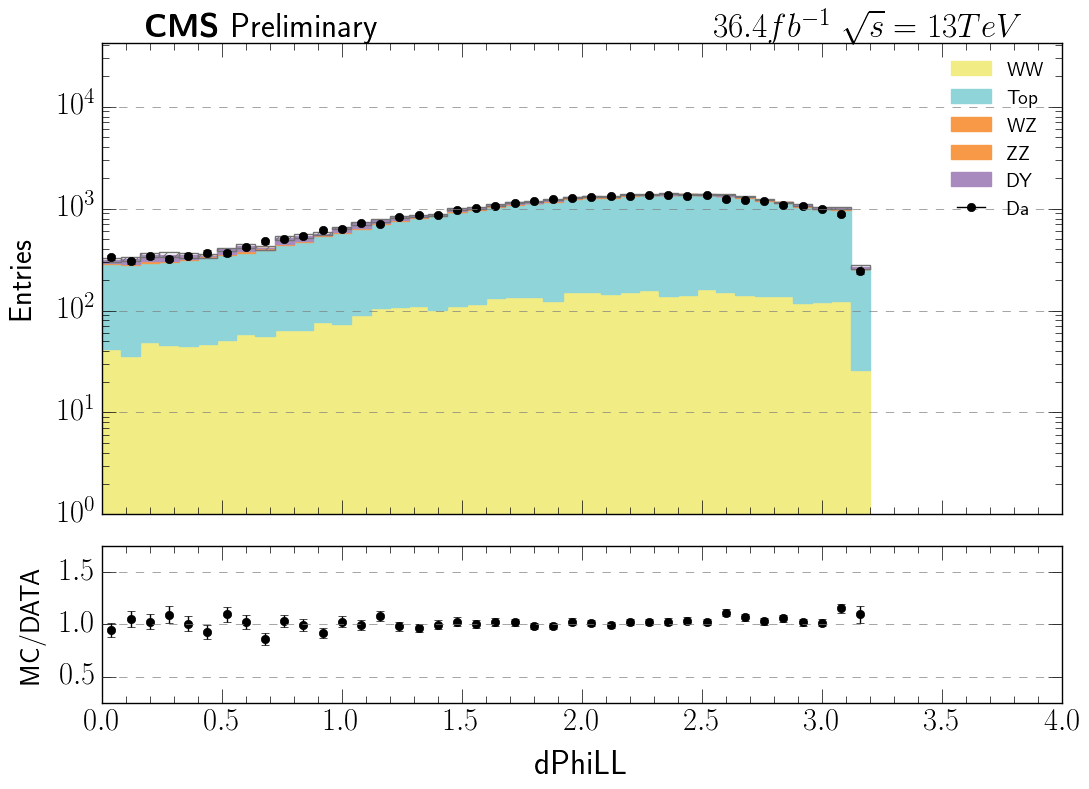

In [71]:
mc = bin_df( TT_ana(test[ (test.lep2_pt > 20)]), "dPhiLL", scales=scales_test )
data = bin_df( TT_ana(df_da_pre[ df_da_pre.lep2_pt > 20] ), "dPhiLL", scales=scales_test)

full_plot(mc, data, color="color_1")

In [ ]:
cut = 0.35
feature_cuts =  (test.pred_fTT_WW > cut) & (test.numbExtraLep == 0) & (test.numb_jets < 2)
feature_cuts_diff =( test.lep_Type > 0 ) & feature_cuts
feature_cuts_same = (test.lep_Type < 0) & feature_cuts #& (test.METProj_trk_sin > 30)
print "\tdiff", "\tsame"
for process in scales.keys():
    if process in test.process_decay.unique():
        print process, test[ (test.process_decay == process) & feature_cuts_diff].shape[0] * scales_test[process],\
    test[ (test.process_decay == process) & feature_cuts_same].shape[0] *scales_test[process]

In [ ]:
cut = 0.8
feature_cuts =  (test.pred_fDY_WW > cut) & (test.numbExtraLep == 0) & (test.numb_jets < 2)
feature_cuts_diff =( test.lep_Type > 0 ) & feature_cuts
feature_cuts_same = (test.lep_Type < 0) & feature_cuts #& (test.METProj_trk_sin > 30)
print "\tdiff", "\tsame"
for process in scales.keys():
    if process in test.process_decay.unique():
        print process, test[ (test.process_decay == process) & feature_cuts_diff].shape[0] * scales_test[process],\
    test[ (test.process_decay == process) & feature_cuts_same].shape[0] *scales_test[process]

In [ ]:
cut_tt = 0.65
cut_dy = .972
feature_cuts =  (test.pred_fTT_WW > cut_tt) & (test.pred_fDY_WW > cut_dy) & (test.numbExtraLep == 0) & (test.mll > 50)
feature_cuts_diff =( test.lep_Type > 0 ) & feature_cuts
feature_cuts_same = (test.lep_Type < 0) & feature_cuts #& (test.METProj_trk_sin > 30)
print "\tdiff", "\tsame"
same_yields = 0
diff_yields = 0
for process in scales.keys():
    if process in test.process_decay.unique():
        diff_yields_ = test[ (test.process_decay == process) & feature_cuts_diff].shape[0] * scales_test[process]
        same_yields_ = test[ (test.process_decay == process) & feature_cuts_same].shape[0] *scales_test[process]
        print process, diff_yields_, same_yields_
        diff_yields += diff_yields_
        same_yields += same_yields_

In [ ]:
feature_cuts =  (df_da_pre.pred_fTT_WW > cut_tt) & (df_da_pre.pred_fDY_WW > cut_dy) & (df_da_pre.numbExtraLep == 0) & (df_da_pre.mll > 30)
feature_cuts_diff =( df_da_pre.lep_Type > 0 ) & feature_cuts
feature_cuts_same = (df_da_pre.lep_Type < 0) & feature_cuts

print "Same:", df_da_pre[ feature_cuts_same ].shape
print "Diff:", df_da_pre[ feature_cuts_diff ].shape

In [ ]:
print "Same", 1953 - same_yields , same_yields
print "Diff", 6345 - diff_yields - (54+54+189+81+125+75+63+114+36+18+28+33+220), diff_yields
472. / 3900.

# DiForest analysis

We wish to formulize our search through the 2 tree phase space. We develope a statistic, yield asymetry, to quantize how the trees perform under a specific combination of cuts. We define this yield as (WW - BKG) / (WW + BKG).  We can compute the CMS yield asymetry from quoted yields as .346. We also define a seperate statistic the normalized uncertainty, defined by  UNC / min_UNC. 

WW : 4629+1776

DY : 206 + 174 

TT : 1920 + 810
     

In [ ]:
def two_tree_process_map( df, pred_names, bins=10, scales=scales):
    bins_i = bins
    bins_j = bins
    if type(bins) == tuple:
        bins_i = bins[0]
        bins_j = bins[1]
    results = {}

    for decay in df.process_decay.unique():
        ax_i = np.array([ float(i) / float(bins_i) for i in xrange(bins_i)])
        ax_j = np.array([ float(j) / float(bins_j) for j in xrange(bins_j)])
        a= df[df.process_decay == decay][pred_names[0]].values.reshape( (df[df.process_decay == decay].shape[0], 1) ) > ax_i
        b= df[df.process_decay == decay][pred_names[1]].values.reshape( (df[df.process_decay == decay].shape[0], 1) ) > ax_j
        ones = np.ones((ax_i.shape[0],df[df.process_decay == decay].shape[0],1), dtype=np.bool)
        a_ = ones == a
        results_ = a_ & (b.transpose().reshape((ax_i.shape[0],df[df.process_decay == decay].shape[0],1)) == np.ones((df[df.process_decay == decay].shape[0],ax_i.shape[0])))
        if decay in scales.keys():
            if process in results.keys(): 
                print "if ", process,  decay
                results[decay] += results_.sum(axis=1) * scales[decay]
            else:
                print decay
                results[decay] = results_.sum(axis=1) * scales[decay]
    return results, [ax_i,ax_j]

In [ ]:
def yield_asymetry( process_map, df):
    results = {}
    process_names = ["WW", "DY", "Top"]
    for process in process_names:
        for decay in process_map[0].keys():
            if process in df[ df.process_decay == decay].process.unique():
                if process not in results:
                    results[process] = process_map[0][decay]
                else:
                    results[process] += process_map[0][decay]
    #results = (process_map[0]["WW"] - (process_map[0]["DY"] + process_map[0]["Top"])) / (process_map[0]["WW"] + process_map[0]["DY"] + process_map[0]["Top"])
    results_Numerator = results["WW"] - ( results["DY"] + results["Top"])
    results_Denominator = results["WW"] + results["DY"] + results["Top"]
    return results_Numerator / results_Denominator, process_map[1]

In [ ]:
two_tree_map =two_tree_process_map( test, ["pred_fTT_WW", "pred_fDY_WW"], bins=50, scales=scales_test)
two_tree_yield = yield_asymetry( two_tree_map, test )

In [ ]:
fig, ax = plt.subplots(figsize=(11,9))
yield_map = ax.pcolor(two_tree_yield[0])#[35:,10:])
plt.colorbar(yield_map)
plt.xticks([i for i in range( len(two_tree_yield[1][0])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][0]) if e%10==0])
plt.yticks([i for i in range( len(two_tree_yield[1][1])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][1]) if e%10==0])
plt.xlabel("TT RF")
plt.ylabel("DY RF")


In [ ]:
unc_mc_process = {}#{ "WW": .05, "DY": .03, "TT": 0.05, "ZZ": 0.1, "WZ":.1 }
for key in plotting_options.process_decay.unique():
  unc_mc_process[key] = plotting_options[plotting_options.process_decay == key]["unc"].values[0]

In [ ]:
def calc_norm_unc( data ):
    coeff = 1./(19.4e3*.15*(3*.108)**2*(data["WW"] /  np.max(data["WW"])))
    norm = [ unc_mc_process[process]*(data[process])**0.5 for process in data.keys() if "WW" not in process]
    sum_norm = np.zeros(data[process].shape)
    for ele in norm:
        sum_norm += ele**2
    return coeff*(sum_norm + unc_mc_process["WW"]/data["WW"])**.5

In [ ]:
def calc_stat_unc( data ):
    coeff = 1./(19.4e3*.15*(3*.108)**2*(data["WW"] /  np.max(data["WW"])))
    norm = [ scales[process]*(data[process]/scales[process])**0.5 for process in data.keys() if "WW" not in process]
    
    sum_norm = np.zeros(data[process].shape)
    for ele in norm:
        sum_norm += ele**2 
    return coeff*(sum_norm + scales["WW"]/data["WW"] )**.5

In [ ]:
def full_stat( data ):
    coeff = 1./(19.7e3*.15*(3*.108)**2*(data["WW"] /  np.max(data["WW"])))
    stat = np.zeros(data["WW"].shape)
    for i in data.keys():
        stat += data[i]
        
    return coeff*(stat)**.5

In [ ]:
def unc_map( process_map ):

    ax_i = process_map[1][0]
    ax_j = process_map[1][1]
    
    unc_sum = np.power(calc_norm_unc( process_map[0] )**2 + calc_stat_unc( process_map[0] )**2,.5 )#+ full_stat( process_map[0] )**2,.5)
    print unc_sum.min()
    unc_sum = unc_sum / unc_sum.min()
    return unc_sum, [ax_i,ax_j]

In [ ]:
scales_ = scales
scales_["DY"] = .5
two_tree_unc = unc_map(two_tree_map)

In [ ]:
fig, ax = plt.subplots(figsize=(11,9))
b = ax.pcolor(two_tree_unc[0], cmap=matplotlib.cm.jet_r )#5:,:45
plt.colorbar(b, )#cmap=matplotlib.cm.jet_r)
plt.xticks([i for i in range( len(two_tree_unc[1][0])) if i%10==0], [i for e, i in enumerate(two_tree_unc[1][0]) if e%10==0])
plt.yticks([i for i in range( len(two_tree_unc[1][1])) if i%10==0], [i for e, i in enumerate(two_tree_unc[1][1]) if e%10==0])
plt.xlabel("TT RF")
plt.ylabel("DY RF")

In [ ]:
two_tree_unc =  unc_map(two_tree_map_)#unc_two_tree_heat_map(test, ["pred_fTT_WW", "pred_fDY_WW"], bins=50, scales={process:scales[process] * float(df[df.process == process].shape[0])/float(test[test.process == process].shape[0]) for process in df.process.unique()})

In [ ]:
#adsfasdf 
yield_selection = np.where( (two_tree_yield[0] > .326) & (two_tree_yield[0] < .366))

unc_copy = np.copy(two_tree_unc[0])

cut_1 = (two_tree_yield[0] < .326) | (two_tree_yield[0] > .366)
cut_2 = (two_tree_yield[0] < .28) | (two_tree_yield[0] > .3)
cut_3 = (two_tree_yield[0] < .4) | (two_tree_yield[0] > .43)

unc_copy[ cut_1 & cut_2 & cut_3 ] = np.nan

fig, ax = plt.subplots(figsize=(11,9))
cmap = matplotlib.cm.jet_r
cmap.set_bad('white', 1.)



masked_array = np.ma.array (unc_copy, mask=np.isnan(unc_copy))

f_bar = ax.pcolormesh(masked_array, cmap=cmap, vmax=1.8)


plt.xticks([i for i in range( len(two_tree_yield[1][0])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][0]) if e%10==0])
plt.yticks([i for i in range( len(two_tree_yield[1][1])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][1]) if e%10==0])
plt.xlabel("TT RF")
plt.ylabel("DY RF")
plt.colorbar(f_bar)

In [ ]:
selection = (unc_copy != np.nan) & (unc_copy <= b_[np.invert(np.isnan(unc_copy))].min()+.02)

In [ ]:
unc_copy[selection]

In [ ]:
a[0][selection]

In [ ]:
y_max_cms = 1.95
y_max_f = 1#1.376
y_max = max(y_max_cms, y_max_f)+.01

plt.plot( a[0][asdf], unc_copy[selection], 'o' )
plt.plot( [.34], [y_max_cms], 'ro')#needs to be varified
plt.plot([0.34, 0.34], [0.995, y_max], 'r')
#plt.plot( [.64], [y_max_f], '*')
plt.plot([0.64, 0.64], [0.995, y_max], 'g')

plt.ylim([0.995, y_max])

In [ ]:
print two_tree_map[0]["DY"][selection]
print two_tree_map[0]["TT"][selection]

In [ ]:
#CMS
ww = 1776 + 4629.
dy = 206 + 174.
tt = 810 + 1920.

scales_={process:scales[process] * float(df[df.process == process].shape[0])/float(test[test.process == process].shape[0]) for process in df.process.unique()}

ceoff = 1./(19.7e3*.15*(3*.108)**2*(ww /  13531.))
cms_unc = ceoff * pow( scales_["DY"]**2 * dy/scales_["DY"] + scales_["TT"]**2 * tt/scales_["TT"]  +\
unc_mc_process["DY"]**2 * dy + unc_mc_process["TT"]**2 * tt, .5)

cms_unc/ 0.0717293596874

In [ ]:
#DiFlavor
ww = 1357 + 4588.
dy = 285 + 376.
tt = 216 + 454.

ceoff = 1./(19.7e3*.15*(3*.108)**2*(ww /  13531.))
cms_unc = ceoff * pow( scales_["DY"]**2 * dy/scales_["DY"] + scales_["TT"]**2 * tt/scales_["TT"]  +\
unc_mc_process["DY"]**2 * dy + unc_mc_process["TT"]**2 * tt, .5)

cms_unc/ 0.253882340528

In [ ]:
print two_tree_map[0]['WW'][selection], ww
print two_tree_map[0]['DY'][selection], dy
print two_tree_map[0]['TT'][selection], tt

In [ ]:
test[ (test.pred_fDY_WW >= .98) & (test.pred_fTT_WW >= .14)].numb_jets.hist()

# Feature distributions post rf cuts

Checking things post rf cuts

In [ ]:
def post_cuts( df ):
    f_cuts = (df.pred_fTT_WW > cut_tt) & (df.pred_fDY_WW > cut_dy) & (df.numbExtraLep == 0) & (df.mll > 30)
    return df[ f_cuts ]

In [82]:
yields_baby = process_yields(test[(test.pred_fDY_WW > .97 ) & (test.pred_fTT_WW > .65 )  & (test.lep2_pt > 20)], df_da=df_da_pre[(df_da_pre.pred_fDY_WW > .97 ) & (df_da_pre.pred_fTT_WW > .65 )  & (df_da_pre.lep2_pt > 20)], scales=scales_test)

In [52]:
yields_baby.to_csv("yields.csv")

In [83]:
yields_baby

Diff Flavor Process  Same Flavor
0        11783      WW         1158
1        11783      WW         1158
2         1148      DY          358
3         3698     Top          471
4          315      WZ           47
5            3      ZZ           14
6         2275      WJ          149
7        19224   Total         2197
8        20274    DATA         2576

In [89]:
yields_baby = process_yields(test[(test.numb_jets <= 1 ) & (test.metMod > 60 )  & (test.lep2_pt > 20)], df_da=df_da_pre[(df_da_pre.numb_jets <= 1 ) & (df_da_pre.metMod > 60 )  & (df_da_pre.lep2_pt > 20)], scales=scales_test)

In [90]:
yields_baby

Diff Flavor Process  Same Flavor
0         7560      WW         4400
1         7560      WW         4400
2         2280      DY        37238
3        14106     Top        11795
4          290      WZ          290
5            6      ZZ          122
6         1353      WJ         5972
7        25595   Total        59817
8        24862    DATA        54496

In [86]:
test.numb_BJet.max()

0

# END


In [ ]:
joblib.dump( {"clf_fDY":clf_fDY, "features_fDY":features_fDY,\
              "clf_fTT":clf_fTT, "features_fTT":features_fTT}, "../RF/Jan_22_fDY_fTT.jbl", compress=3)

In [ ]:
df.keys()

# END EDNFAF

In [ ]:
random_forest = {"clf_fDY":clf_fDY, "features_fDY":features_fDY,\
              "clf_fTT":clf_fTT, "features_fTT":features_fTT}

In [ ]:
def rf_ana( df, flavor="both", random_forest=random_forest):
  
  rf_cuts = (df.pred_fTT_WW > .65) & (df.pred_fDY_WW > .972) & (df.mll > 30)
  same_cuts = (df.lep_Type < 0) & rf_cuts 
  diff_cuts =  (df.lep_Type > 0) & rf_cuts


  if flavor=="both": return pd.concat( [df[same_cuts], df[diff_cuts]] )
  elif flavor=="same": return df[same_cuts]
  elif flavor=="diff": return df[diff_cuts]

In [ ]:
def calc_cross_stuff(df_mc, df_data, flavor="both", scales=scales):
    lumi = 19.7e3
    eff  = .1247 #this had to be changed previously
    Br   = (3*.108)**2. 
    
    df_mc_c = df_mc[df_mc.lep1_Charge != df_mc.lep2_Charge]
    df_data_c = df_data[df_data.lep1_Charge != df_data.lep2_Charge]
    
    df_mc_c_s = df_mc[df_mc.lep1_Charge == df_mc.lep2_Charge]
    df_data_c_s = df_data[df_data.lep1_Charge == df_data.lep2_Charge]
    
    N_mc = sum([ rf_ana(df_mc_c[df_mc_c.process_decay == process], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ])
    N_Wjets = rf_ana(df_data_c_s, flavor=flavor).shape[0] -  np.array([ rf_ana(df_mc_c_s[(df_mc_c_s.process_decay == process) ], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in [ 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    N_mc += N_Wjets
    
    N_data = cuts_ana(df_data_c, flavor=flavor).shape[0]
    
    N_ww_select = cuts_ana(df_mc_c[df_mc_c.process_decay == "WW"], flavor=flavor).weight.values.sum()*scales["WW"]
    N_ww_tot = df_mc[df_mc.process_decay == "WW"].weight.values.sum()*scales["WW"]

    ratio_s_t = N_ww_select / N_ww_tot
    #print "MC", N_mc
    #print "DATA", N_data
    #print N_ww_select / N_ww_tot
    #print "WJ", N_Wjets
    return {"lumi": lumi, "eff": eff, "Br": Br, "N_mc": N_mc, "N_data": N_data, "ratio_s_t": ratio_s_t, "N_ww_select":N_ww_select, "N_Wjets": N_Wjets}

In [ ]:
def stat_unc_calc(df_mc, df_data, flavor="both", scales=scales):
    var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    cuts_mc = {process: rf_ana(df_mc[(df_mc.process_decay == process) & (df_mc.lep1_Charge == df_mc.lep2_Charge)], flavor) for process in scales.keys()} 
    process_stat_unc = [ (cuts_mc[process].weight.values * cuts_mc[process].weight.values).sum()  * scales[process]**2 for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']] 
    
    WW_stat_unc = (cuts_mc["WW"].weight.values * cuts_mc["WW"].weight.values).sum() * scales["WW"]**2. * ratio_s_t**2. / N_ww_select**2.
    
    #print "Process stat", process_stat_unc
    #print "WW stat",WW_stat_unc
    return 1. / (lumi * eff * Br * ratio_s_t) * ( N_data + sum(process_stat_unc) + WW_stat_unc + N_Wjets)**.5

In [ ]:
def sys_unc_calc(df_mc, df_data, flavor="both", scales=scales):
    var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    cuts_mc = {process: rf_ana(df_mc[(df_mc.process_decay == process) & (df_mc.lep1_Charge == df_mc.lep2_Charge)], flavor) for process in scales.keys()} 
    process_sys_unc = [ scales[process]**2. * unc_mc_process[process]**2 * cuts_mc[process].weight.sum()**2. for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']] 

    WW_sys_unc = unc_mc_process["WW"]**2 * ratio_s_t**2. / N_ww_select**2.
    Wjets_sys_unc = N_Wjets**2. 
    
    return 1. / (lumi * eff * Br * ratio_s_t)  * ( sum(process_sys_unc) +  WW_sys_unc + Wjets_sys_unc)**.5

In [ ]:
def cross_calc(df_mc, df_data, flavor="both", scales=scales):
    var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    return (N_data - N_mc) / (lumi * eff * Br *ratio_s_t)
    #return N_ww_select / (lumi * eff * Br *ratio_s_t)

In [ ]:
rf_ana(df_da_pre, flavor="both")